# Introduction to Data Science: Exercise

# Exercise Goals:
* Learn a systematic approach to deal with a high level business request
* Learn a data driven approach to ask and answer the correct questions
* Learn a systematic approach to derive a machine learning model

Procedure:
* Exercise 1: Understand the data, visual explanation
* Exercise 1: Define a possible business case

[TO GO TO PART 2 OF EXERCISE, CLICK HERE](#PART2)


Data Set:

Historical of Gasoline Prices in Germany

In [1]:
#importing libraries
import pandas as pd
import missingno as ms
import matplotlib.pyplot as plt
import matplotlib as mplt
import seaborn as sns
import numpy as np
from pandas import Series
import string
from pandas import testing as pdt
import unittest
import math
#configuring output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#reading data from file and defining separator as ;
data_station = pd.read_csv("example_sprit_cut_station.csv", sep =';')
data_prices = pd.read_csv("example_sprit_cut_prices.csv", sep =';')

Part 1: Data Cleansing

In [3]:
data_station.head()

ID  VERSION                VERSION_TIME                                   NAME BRAND                  STREET HOUSE_NUMBER POST_CODE           PLACE PUBLIC_HOLIDAY_IDENTIFIER        LAT       LNG
0  d37bee76-91b6-485a-b974-24f1b0d391fa        4  2015-01-09 10:26:15.000000                        Aral Tankstelle  ARAL         An der Tagweide            2     76139       Karlsruhe                        \N  49.020280  8.459429
1  51d4b652-a095-1aa0-e100-80009459e03a      796  2015-09-28 21:00:13.000000    JET MANNHEIM UNTERMUEHLAUSTRASSE 83   JET  UNTERMUEHLAUSTRASSE 83           \N     68169        MANNHEIM                        \N  49.508962  8.467691
2  c7caf231-0e47-40db-92de-9349a2eb2bef        4  2014-09-26 13:24:57.000000                        Aral Tankstelle  ARAL     Trippstadter Straße           69     67663  Kaiserslautern                        \N  49.433754  7.757465
3  51d4b53b-a095-1aa0-e100-80009459e03a      796  2015-09-28 21:00:13.000000    JET KAISERSLAUTERN PARISER STR. 167   JET        PARISER STR. 167           \N     67655  KAISERSLAUTERN                        \N  49.442200  7.748360
4  51d4b70f-a095-1aa0-e100-80009459e03a      796  2015-09-28 21:00:13.000000  JET GERMERSHEIM MUENCHENER STRASSE 12   JET   MUENCHENER STRASSE 12           \N     76726     GERMERSHEIM                        \N  49.226800  8.374400

after checking the data, 

This confirms that we have duplicated data for each

In [4]:
data_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189526 entries, 0 to 2189525
Data columns (total 6 columns):
STID            object
E5              int64
E10             int64
DIESEL          int64
DATE_CHANGED    object
CHANGED         int64
dtypes: int64(4), object(2)
memory usage: 100.2+ MB


In [5]:
data = pd.merge(data_prices,data_station,left_on='STID',right_on= 'ID',how='inner')

Delete row poluting the data

In [6]:
data.head()

STID    E5   E10  DIESEL                DATE_CHANGED  CHANGED                                    ID  VERSION                VERSION_TIME             NAME BRAND            STREET HOUSE_NUMBER POST_CODE  PLACE PUBLIC_HOLIDAY_IDENTIFIER        LAT       LNG
0  01bf5a06-4248-43a5-9524-56123fa3ab2f  1589  1549    1389  2014-10-02 05:22:01.000000       21  01bf5a06-4248-43a5-9524-56123fa3ab2f       12  2015-04-27 12:00:03.000000  Esso Tankstelle  ESSO  ZELLERTALSTR. 30                  67551  WORMS                        \N  49.633409  8.273847
1  01bf5a06-4248-43a5-9524-56123fa3ab2f  1589  1549    1389  2014-10-02 05:22:01.000000       21  01bf5a06-4248-43a5-9524-56123fa3ab2f       12  2015-04-27 12:00:03.000000  Esso Tankstelle  ESSO  ZELLERTALSTR. 30                  67551  WORMS                        \N  49.633409  8.273847
2  01bf5a06-4248-43a5-9524-56123fa3ab2f  1569  1529    1369  2014-10-02 05:26:01.000000       21  01bf5a06-4248-43a5-9524-56123fa3ab2f       12  2015-04-27 12:00:03.000000  Esso Tankstelle  ESSO  ZELLERTALSTR. 30                  67551  WORMS                        \N  49.633409  8.273847
3  01bf5a06-4248-43a5-9524-56123fa3ab2f  1569  1529    1369  2014-10-02 05:26:01.000000       21  01bf5a06-4248-43a5-9524-56123fa3ab2f       12  2015-04-27 12:00:03.000000  Esso Tankstelle  ESSO  ZELLERTALSTR. 30                  67551  WORMS                        \N  49.633409  8.273847
4  01bf5a06-4248-43a5-9524-56123fa3ab2f  1569  1529    1359  2014-10-02 09:06:01.000000        1  01bf5a06-4248-43a5-9524-56123fa3ab2f       12  2015-04-27 12:00:03.000000  Esso Tankstelle  ESSO  ZELLERTALSTR. 30                  67551  WORMS                        \N  49.633409  8.273847

Now the pivot_table function is going to be used to confirm the hypothesis that the cells are duplicate.

In [7]:
pd.pivot_table(data_prices,index=["STID","DATE_CHANGED"],aggfunc=[len]).head()

len              
                                                                CHANGED DIESEL E10 E5
STID                                 DATE_CHANGED                                    
00060062-0001-4444-8888-acdc00000001 2014-06-09 00:02:01.000000       2      2   2  2
                                     2014-06-10 01:54:01.000000       2      2   2  2
                                     2014-06-10 07:14:01.000000       2      2   2  2
                                     2014-06-10 09:06:01.000000       2      2   2  2
                                     2014-06-10 10:46:01.000000       2      2   2  2

By this result, we conclude that for every ID and DATE, there are 2 prices, which is clearly duplicated data. We are going to use the function drop_duplicates do solve this issue.

In [8]:
data = pd.DataFrame.drop_duplicates(data)

In [9]:
data.head() 

STID    E5   E10  DIESEL                DATE_CHANGED  CHANGED                                    ID  VERSION                VERSION_TIME             NAME BRAND            STREET HOUSE_NUMBER POST_CODE  PLACE PUBLIC_HOLIDAY_IDENTIFIER        LAT       LNG
0  01bf5a06-4248-43a5-9524-56123fa3ab2f  1589  1549    1389  2014-10-02 05:22:01.000000       21  01bf5a06-4248-43a5-9524-56123fa3ab2f       12  2015-04-27 12:00:03.000000  Esso Tankstelle  ESSO  ZELLERTALSTR. 30                  67551  WORMS                        \N  49.633409  8.273847
2  01bf5a06-4248-43a5-9524-56123fa3ab2f  1569  1529    1369  2014-10-02 05:26:01.000000       21  01bf5a06-4248-43a5-9524-56123fa3ab2f       12  2015-04-27 12:00:03.000000  Esso Tankstelle  ESSO  ZELLERTALSTR. 30                  67551  WORMS                        \N  49.633409  8.273847
4  01bf5a06-4248-43a5-9524-56123fa3ab2f  1569  1529    1359  2014-10-02 09:06:01.000000        1  01bf5a06-4248-43a5-9524-56123fa3ab2f       12  2015-04-27 12:00:03.000000  Esso Tankstelle  ESSO  ZELLERTALSTR. 30                  67551  WORMS                        \N  49.633409  8.273847
6  01bf5a06-4248-43a5-9524-56123fa3ab2f  1539  1499    1339  2014-10-03 12:14:01.000000       21  01bf5a06-4248-43a5-9524-56123fa3ab2f       12  2015-04-27 12:00:03.000000  Esso Tankstelle  ESSO  ZELLERTALSTR. 30                  67551  WORMS                        \N  49.633409  8.273847
8  01bf5a06-4248-43a5-9524-56123fa3ab2f  1529  1489    1329  2014-10-03 14:14:01.000000       21  01bf5a06-4248-43a5-9524-56123fa3ab2f       12  2015-04-27 12:00:03.000000  Esso Tankstelle  ESSO  ZELLERTALSTR. 30                  67551  WORMS                        \N  49.633409  8.273847

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094763 entries, 0 to 4377604
Data columns (total 18 columns):
STID                         1094763 non-null object
E5                           1094763 non-null int64
E10                          1094763 non-null int64
DIESEL                       1094763 non-null int64
DATE_CHANGED                 1094763 non-null object
CHANGED                      1094763 non-null int64
ID                           1094763 non-null object
VERSION                      1094763 non-null int64
VERSION_TIME                 1094763 non-null object
NAME                         1094763 non-null object
BRAND                        1079533 non-null object
STREET                       1091842 non-null object
HOUSE_NUMBER                 862629 non-null object
POST_CODE                    1091842 non-null object
PLACE                        1091842 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    1094763 non-null object
LAT                          1094763 non-null

With the duplicates removed, now we have a half sized data frame to work

Converting the DATE_CHANGED column into optimized pandas datetime function, so later we can extract information from it in easier ways

In [11]:
data['DATE_CHANGED'] =pd.to_datetime(data.DATE_CHANGED)

In [12]:
data.drop(columns=['ID'], inplace= True)

In the following code, columns with useful extracted information are being created, in order to make the following work easier.

In [13]:
data['YEAR'] = data.DATE_CHANGED.dt.year #This all could be a function
data['DAY'] =data.DATE_CHANGED.dt.dayofyear
data['DATE'] =data.DATE_CHANGED.dt.date
data['WEEK'] =data.DATE_CHANGED.dt.weekofyear
data['MONTH'] =data.DATE_CHANGED.dt.month
data['HOUR'] =data.DATE_CHANGED.dt.hour
data['WEEKDAY'] =data.DATE_CHANGED.dt.dayofweek
data['WEEKDAYSTR']= data.DATE_CHANGED.dt.dayofweek
data['WEEKDAYSTR'] = data['WEEKDAYSTR'].apply(lambda sym: {0:'SUN',1:'MON','2':'TUE',3:'WED',4:'THU',5:'FRI',6:'SAT'}.get(sym, ' '))


data.head()

STID    E5   E10  DIESEL        DATE_CHANGED  CHANGED  VERSION                VERSION_TIME             NAME BRAND            STREET HOUSE_NUMBER POST_CODE  PLACE PUBLIC_HOLIDAY_IDENTIFIER        LAT       LNG  YEAR  DAY        DATE  WEEK  MONTH  HOUR  WEEKDAY WEEKDAYSTR
0  01bf5a06-4248-43a5-9524-56123fa3ab2f  1589  1549    1389 2014-10-02 05:22:01       21       12  2015-04-27 12:00:03.000000  Esso Tankstelle  ESSO  ZELLERTALSTR. 30                  67551  WORMS                        \N  49.633409  8.273847  2014  275  2014-10-02    40     10     5        3        WED
2  01bf5a06-4248-43a5-9524-56123fa3ab2f  1569  1529    1369 2014-10-02 05:26:01       21       12  2015-04-27 12:00:03.000000  Esso Tankstelle  ESSO  ZELLERTALSTR. 30                  67551  WORMS                        \N  49.633409  8.273847  2014  275  2014-10-02    40     10     5        3        WED
4  01bf5a06-4248-43a5-9524-56123fa3ab2f  1569  1529    1359 2014-10-02 09:06:01        1       12  2015-04-27 12:00:03.000000  Esso Tankstelle  ESSO  ZELLERTALSTR. 30                  67551  WORMS                        \N  49.633409  8.273847  2014  275  2014-10-02    40     10     9        3        WED
6  01bf5a06-4248-43a5-9524-56123fa3ab2f  1539  1499    1339 2014-10-03 12:14:01       21       12  2015-04-27 12:00:03.000000  Esso Tankstelle  ESSO  ZELLERTALSTR. 30                  67551  WORMS                        \N  49.633409  8.273847  2014  276  2014-10-03    40     10    12        4        THU
8  01bf5a06-4248-43a5-9524-56123fa3ab2f  1529  1489    1329 2014-10-03 14:14:01       21       12  2015-04-27 12:00:03.000000  Esso Tankstelle  ESSO  ZELLERTALSTR. 30                  67551  WORMS                        \N  49.633409  8.273847  2014  276  2014-10-03    40     10    14        4        THU

First we must clean the data

In [14]:
#filling in empty cells in 'BRAND'
data.loc[data.BRAND.isna(), 'BRAND'] = data['NAME']
data.loc[data.BRAND == '\\N','BRAND'] = data['NAME']

In [15]:
pd.pivot_table(data,index=["BRAND","YEAR"],values = ['E10','E5','DIESEL'],aggfunc=[np.mean,len])

mean                               len                
                                                              DIESEL          E10           E5  DIESEL     E10      E5
BRAND                                              YEAR                                                               
ARAL                                               2014  1344.051037  1489.586138  1529.544080   67049   67049   67049
                                                   2015  1201.564607  1408.863141  1428.854481  114198  114198  114198
AUTO ZOTZ Herxheim b.LD.       Tanken an L.493     2014  1302.728507  1450.441931  1490.215686     663     663     663
                                                   2015  1169.751501  1365.506603  1385.848739     833     833     833
AUTO ZOTZ Landau in der Pfalz   Tanken und waschen 2014  1312.127517  1457.718121  1496.681208     596     596     596
                                                   2015  1166.558504  1359.220748  1379.651387     829     829     829
AVIA                                               2014  1342.348688  1488.223327  1528.215743   44567   44567   44567
                                                   2015  1196.311227  1398.810403  1419.325933   69769   69769   69769
Agip                                               2014  1325.577954  1475.416807  1515.301941   14887   14887   14887
                                                   2015  1184.098088  1386.509510  1406.561516   20767   20767   20767
Autohaus Holz GmbH Landau                          2014  1308.300184    -0.327808   506.745856     543     543     543
                                                   2015  1160.341823     0.000000     0.000000     746     746     746
Autohaus Holz GmbH Neustadt                        2014  1287.592068    -0.303116   468.337110     353     353     353
                                                   2015  1145.859189     0.000000     0.000000     419     419     419
BFT                                                2014  1317.650172  1376.485803  1451.335788   16025   16025   16025
                                                   2015  1177.348709  1219.203113  1237.619885   21333   21333   21333
Bft                                                2014  1326.343750  1476.065972  1516.048611     576     576     576
                                                   2015  1192.503165  1395.141350  1415.636076     948     948     948
CLASSIC                                            2014  1305.099291  1456.872340  1496.943262    1128    1128    1128
                                                   2015  1161.968198  1371.720848  1392.103651    1698    1698    1698
Dudenhöffer & Rung GmbH                            2014  1318.972789  1462.387755  1502.400000     735     735     735
                                                   2015  1189.537543  1391.337884  1411.383959    1172    1172    1172
E Center                                           2014  1308.311835  1456.077793  1496.077793    1504    1504    1504
                                                   2015  1169.246085  1374.194631  1394.248322    2235    2235    2235
ED                                                 2014  1301.222524  1457.843852  1497.479325    3676    3676    3676
                                                   2015  1155.870504  1367.589302  1387.700344    6394    6394    6394
ELAN                                               2014  1307.374165  1454.623608  1494.623608     898     898     898
                                                   2015  1164.294324  1371.466713  1392.055361    1427    1427    1427
ESSO                                               2014  1345.230502  1455.515043  1507.744516   51518   51518   51518
                                                   2015  1195.563848  1364.899816  1385.379941   70590   70590   70590
Eberhardt Hardeckstraße Karlsruhe                  2014  1313.233859  1463.326399  1503.477044    1394    1394    1394
                  

According to this Pivot, we realized that our data needs more cleansing before we work with it

First we're going to start with setting values of the 'NAMES' column for the Empty values of 'BRANDS' colum, and then standardizing the names of known brands and setting values of the names for

In [16]:
#standardizing brand names
data['BRAND'] = data['BRAND'].apply(lambda x: 'AUTO ZOTZ' if('AUTO ZOTZ' in str(x)) else x)
data['BRAND'] = data['BRAND'].apply(lambda x: 'BFT' if(('Bft'in str(x))or ('bft'in str(x))) else x)
data['BRAND'] = data['BRAND'].apply(lambda x: 'Freie Tankstelle' if('frei' in str(x)) else x)
data['BRAND'] = data['BRAND'].apply(lambda x: 'TOTAL' if('Total' in str(x)) else x)
data['BRAND'] = data['BRAND'].apply(lambda x: 'Eberhardt' if('Eberhardt' in str(x)) else x)
data['BRAND'] = data['BRAND'].apply(lambda x: 'Globus' if('Globus' in str(x)) else x)
data['BRAND'] = data['BRAND'].apply(lambda x: 'SBK' if('SBK' in str(x)) else x)
data['BRAND'] = data['BRAND'].apply(lambda x: 'SB' if('SB' in str(x)and 'K'not in str(x)) else x)
data['BRAND'] = data['BRAND'].apply(lambda x: 'Supermarkt' if('Supermarkt' in str(x)) else x)






In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094763 entries, 0 to 4377604
Data columns (total 25 columns):
STID                         1094763 non-null object
E5                           1094763 non-null int64
E10                          1094763 non-null int64
DIESEL                       1094763 non-null int64
DATE_CHANGED                 1094763 non-null datetime64[ns]
CHANGED                      1094763 non-null int64
VERSION                      1094763 non-null int64
VERSION_TIME                 1094763 non-null object
NAME                         1094763 non-null object
BRAND                        1094763 non-null object
STREET                       1091842 non-null object
HOUSE_NUMBER                 862629 non-null object
POST_CODE                    1091842 non-null object
PLACE                        1091842 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    1094763 non-null object
LAT                          1094763 non-null float64
LNG                          1094763

A quick look in the data and in the matrix above, shows that there are some clear inconsistencies in the data. As examples, we could list:
* Prices with values 0 or -1
* HOUSENUMBER, STREET, POSTCODE can all be found, if necessary, using LAT and LON coordinates and reverse geocoding, we are going to join the main information in NAME to avoid double names
* Stations which are no more active
* Version and Version_Time columns which have no meaning description on the source and changed doesn't match the source description
* Public Holiday Identifier also has no use since it's defined by station

These inconsistencies will be treated on the next lines

In [18]:
#condensing information to make name unique
data['NAME'] = data['NAME'] + " "+ data['PLACE'] + "" + data['STREET'] + " " + data["HOUSE_NUMBER"]


#dropping non unsed columns
data.drop(columns=['POST_CODE','PUBLIC_HOLIDAY_IDENTIFIER','VERSION','VERSION_TIME','CHANGED','HOUSE_NUMBER','STREET'], inplace= True)

In [19]:
data.head()

STID    E5   E10  DIESEL        DATE_CHANGED                                     NAME BRAND  PLACE        LAT       LNG  YEAR  DAY        DATE  WEEK  MONTH  HOUR  WEEKDAY WEEKDAYSTR
0  01bf5a06-4248-43a5-9524-56123fa3ab2f  1589  1549    1389 2014-10-02 05:22:01  Esso Tankstelle WORMSZELLERTALSTR. 30    ESSO  WORMS  49.633409  8.273847  2014  275  2014-10-02    40     10     5        3        WED
2  01bf5a06-4248-43a5-9524-56123fa3ab2f  1569  1529    1369 2014-10-02 05:26:01  Esso Tankstelle WORMSZELLERTALSTR. 30    ESSO  WORMS  49.633409  8.273847  2014  275  2014-10-02    40     10     5        3        WED
4  01bf5a06-4248-43a5-9524-56123fa3ab2f  1569  1529    1359 2014-10-02 09:06:01  Esso Tankstelle WORMSZELLERTALSTR. 30    ESSO  WORMS  49.633409  8.273847  2014  275  2014-10-02    40     10     9        3        WED
6  01bf5a06-4248-43a5-9524-56123fa3ab2f  1539  1499    1339 2014-10-03 12:14:01  Esso Tankstelle WORMSZELLERTALSTR. 30    ESSO  WORMS  49.633409  8.273847  2014  276  2014-10-03    40     10    12        4        THU
8  01bf5a06-4248-43a5-9524-56123fa3ab2f  1529  1489    1329 2014-10-03 14:14:01  Esso Tankstelle WORMSZELLERTALSTR. 30    ESSO  WORMS  49.633409  8.273847  2014  276  2014-10-03    40     10    14        4        THU

In [20]:
#dropping price inconsistency lines
data.drop(data[(data.E10<800)|(data.E10>1800)|(data.E5<800)|(data.E5>1800)|\
               (data.DIESEL<800)|(data.DIESEL>1800)].index, inplace=True)
data['E10'] = data['E10'].apply(lambda x:  x/1000)
data['E5'] = data['E5'].apply(lambda x:  x/1000)
data['DIESEL'] = data['DIESEL'].apply(lambda x:  x/1000)

In [21]:
#dropping no more active stations
data.drop(data[data.NAME == 'nicht mehr aktiv'].index, inplace=True)

In [22]:
#correcting wrong date of year assignments
data.loc[(data.DAY >= 360) & (data.WEEK==1), 'WEEK'] = '53'

Checking the Standardized names of the Brands

In [23]:
pd.pivot_table(data,index=["BRAND","YEAR"],values = ['E10','E5','DIESEL'],aggfunc=[np.mean,len])

mean                           len                    
                                     DIESEL       E10        E5    DIESEL       E10        E5
BRAND                        YEAR                                                            
ARAL                         2014  1.344170  1.489786  1.529749   67040.0   67040.0   67040.0
                             2015  1.201699  1.409093  1.429088  114175.0  114175.0  114175.0
AUTO ZOTZ                    2014  1.309259  1.456201  1.495654    1257.0    1257.0    1257.0
                             2015  1.168159  1.362371  1.382758    1662.0    1662.0    1662.0
AVIA                         2014  1.342349  1.488223  1.528216   44567.0   44567.0   44567.0
                             2015  1.196311  1.398810  1.419326   69769.0   69769.0   69769.0
Agip                         2014  1.325930  1.475430  1.515422   14882.0   14882.0   14882.0
                             2015  1.184275  1.386489  1.406570   20763.0   20763.0   20763.0
BFT                          2014  1.317974  1.466066  1.506057   20783.0   20783.0   20783.0
                             2015  1.176571  1.379994  1.400738   27531.0   27531.0   27531.0
CLASSIC                      2014  1.305099  1.456872  1.496943    1128.0    1128.0    1128.0
                             2015  1.161968  1.371721  1.392104    1698.0    1698.0    1698.0
Dudenhöffer & Rung GmbH      2014  1.318973  1.462388  1.502400     735.0     735.0     735.0
                             2015  1.189538  1.391338  1.411384    1172.0    1172.0    1172.0
E Center                     2014  1.308312  1.456078  1.496078    1504.0    1504.0    1504.0
                             2015  1.169246  1.374195  1.394248    2235.0    2235.0    2235.0
ED                           2014  1.301223  1.457844  1.497479    3676.0    3676.0    3676.0
                             2015  1.155868  1.367594  1.387918    6393.0    6393.0    6393.0
ELAN                         2014  1.307374  1.454624  1.494624     898.0     898.0     898.0
                             2015  1.164294  1.371467  1.392055    1427.0    1427.0    1427.0
ESSO                         2014  1.344817  1.489584  1.529603   50340.0   50340.0   50340.0
                             2015  1.194848  1.395333  1.415803   69008.0   69008.0   69008.0
Eberhardt                    2014  1.321057  1.469812  1.509953    3251.0    3251.0    3251.0
                             2015  1.194535  1.390535  1.410835    3549.0    3549.0    3549.0
Freie                        2014  1.326095  1.476510  1.515661    1297.0    1297.0    1297.0
                             2015  1.188224  1.389318  1.409131    1728.0    1728.0    1728.0
Freie Tankstelle             2014  1.321224  1.469096  1.509062    4169.0    4169.0    4169.0
                             2015  1.175593  1.375236  1.395714    6159.0    6159.0    6159.0
Fritz Walter GmbH            2014  1.305817  1.451720  1.491613     930.0     930.0     930.0
                             2015  1.174190  1.360315  1.381152    1208.0    1208.0    1208.0
Frühmesser GmbH              2014  1.317152  1.463382  1.503394    2392.0    2392.0    2392.0
                             2015  1.176425  1.379936  1.400430    4802.0    4802.0    4802.0
Globus                       2014  1.299098  1.447596  1.487540    2561.0    2561.0    2561.0
                             2015  1.156512  1.355875  1.376487    4078.0    4078.0    4078.0
HEM                          2014  1.297796  1.442746  1.482866    3911.0    3911.0    3911.0
                             2015  1.172845  1.377227  1.397797   10375.0   10375.0   10375.0
JET                          2014  1.311127  1.459727  1.499727   26371.0   26371.0   26371.0
                             2015  1.170658  1.374316  1.394750   42954.0   42954.0   42954.0
Markant                      2014  1.312371  1.464801  1.504801    1255.0    1255.0    1255.0
                             2015  1.175469  1.382985  1.403327    1872.0    1872.0    1872

Now we can check how the data looks and observe that some BRANDS and, as consequence, STATIONS, have a really small amount of data (By checking the columns len), we can filter this

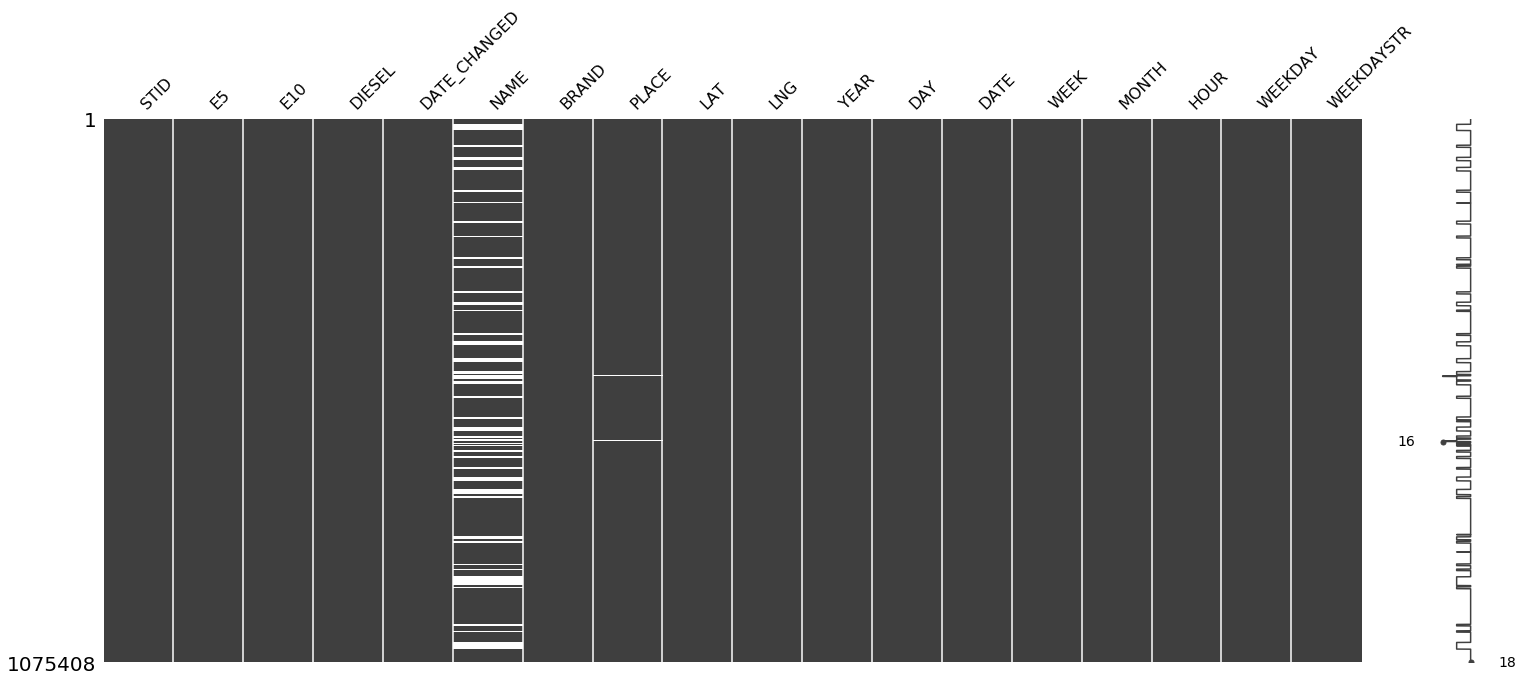

In [24]:
#checking the null data
ms.matrix(data)

In [25]:
#checking the remaining null lines
null_data = data[data.isnull().any(axis=1)]

In [26]:
null_data.head()

STID     E5    E10  DIESEL        DATE_CHANGED NAME  BRAND     PLACE        LAT       LNG  YEAR  DAY        DATE WEEK  MONTH  HOUR  WEEKDAY WEEKDAYSTR
44852  eb39e146-8263-4093-835d-30c8073e2eb2  1.399  1.379   1.139 2015-08-13 14:50:01  NaN  Shell  RAMSTEIN  49.440489  7.555197  2015  225  2015-08-13   33      8    14        3        WED
44854  eb39e146-8263-4093-835d-30c8073e2eb2  1.379  1.359   1.139 2015-08-13 15:18:01  NaN  Shell  RAMSTEIN  49.440489  7.555197  2015  225  2015-08-13   33      8    15        3        WED
44856  eb39e146-8263-4093-835d-30c8073e2eb2  1.409  1.389   1.139 2015-08-14 13:14:01  NaN  Shell  RAMSTEIN  49.440489  7.555197  2015  226  2015-08-14   33      8    13        4        THU
44858  eb39e146-8263-4093-835d-30c8073e2eb2  1.399  1.379   1.139 2015-08-14 13:30:01  NaN  Shell  RAMSTEIN  49.440489  7.555197  2015  226  2015-08-14   33      8    13        4        THU
44860  eb39e146-8263-4093-835d-30c8073e2eb2  1.419  1.399   1.169 2015-08-15 12:02:01  NaN  Shell  RAMSTEIN  49.440489  7.555197  2015  227  2015-08-15   33      8    12        5        FRI

Now we apply a rule to fill the empty place names and check if there are any other empty rows

In [27]:
#treating the Stations with null name
data['PLACE'] = data['NAME'].apply(lambda x: 'Landau' if('Landau' in str(x)) else x)

In [28]:
#checking null data again
null_data = data[data.isnull().any(axis=1)]
null_data.head()

STID     E5    E10  DIESEL        DATE_CHANGED NAME  BRAND PLACE        LAT       LNG  YEAR  DAY        DATE WEEK  MONTH  HOUR  WEEKDAY WEEKDAYSTR
44852  eb39e146-8263-4093-835d-30c8073e2eb2  1.399  1.379   1.139 2015-08-13 14:50:01  NaN  Shell   NaN  49.440489  7.555197  2015  225  2015-08-13   33      8    14        3        WED
44854  eb39e146-8263-4093-835d-30c8073e2eb2  1.379  1.359   1.139 2015-08-13 15:18:01  NaN  Shell   NaN  49.440489  7.555197  2015  225  2015-08-13   33      8    15        3        WED
44856  eb39e146-8263-4093-835d-30c8073e2eb2  1.409  1.389   1.139 2015-08-14 13:14:01  NaN  Shell   NaN  49.440489  7.555197  2015  226  2015-08-14   33      8    13        4        THU
44858  eb39e146-8263-4093-835d-30c8073e2eb2  1.399  1.379   1.139 2015-08-14 13:30:01  NaN  Shell   NaN  49.440489  7.555197  2015  226  2015-08-14   33      8    13        4        THU
44860  eb39e146-8263-4093-835d-30c8073e2eb2  1.419  1.399   1.169 2015-08-15 12:02:01  NaN  Shell   NaN  49.440489  7.555197  2015  227  2015-08-15   33      8    12        5        FRI

In [29]:
grouped = data.groupby(['NAME','YEAR'])['DAY'].nunique()
grouped = grouped.groupby(['NAME']).sum()
print(grouped.count())
grouped_brand = data.groupby(['BRAND','YEAR'])['DAY'].nunique()
grouped_brand = grouped_brand.groupby(['BRAND']).sum()
print(grouped_brand.count())


327
47


In [30]:
grouped.head()

NAME
AKAY Tankstelle LudwigshafenBudapester Str. 3                         474
AVIA Au am Rhein Au am RheinLammstr.  1                               479
AVIA Eppenbrunn EppenbrunnTalstr.  44                                 479
AVIA Karlsruhe-Nordweststadt KarlsruheWilhelm-Hausenstein-Allee 16    479
AVIA Karlsruhe-Waldstadt KarlsruheKönigsberger Str.  5                479
Name: DAY, dtype: int64

In [31]:
data['WEEK'] = data['WEEK'].apply(lambda x: int(x))

In [32]:
def select_most_complete_data(series,number):
    cut_value = series.mean() -series.std()*2
    passed = []
    count = 0
    series = series.sort_values(ascending=False)
    for index,data in series.items():
        if data>cut_value:
            passed.append(index)
            count=count+1
            if count==number:
                return passed
    return passed

def select_least_complete_data(series,number):
    cut_value = series.mean() -series.std()*2
    passed = []
    count = 0
    series = series.sort_values(ascending=True)
    for index,data in series.items():
        if data<cut_value:
            passed.append(index)
            count=count+1
            if count==number:
                return passed
    return passed



In [33]:
passed = select_most_complete_data(grouped,30)
failed = select_least_complete_data(grouped,5)


data_best = data[data['NAME'].isin(passed)]




group_best = data_best.groupby(['NAME','YEAR'])['DAY'].nunique()
group_best = group_best.groupby(['NAME']).sum()


In [34]:
class testFunctions(unittest.TestCase):
    def test_passed(self):
        self.assertEqual(select_most_complete_data(grouped,30), passed)
    def test_failed(self):
        self.assertEqual(select_least_complete_data(grouped,5), failed)



In [35]:
testobj = testFunctions()
testobj.test_passed()
testobj.test_failed()

### 1. How many different stations exist in the data set and what is the existing history in days (bar chart)?

In [36]:
print("The number of different Stations in the database is", grouped.count())
print("The number of different Brands in the database is", grouped_brand.count())


The number of different Stations in the database is 327
The number of different Brands in the database is 47


Since the number of different stations is too big, we're gonna display in bar Graph the 30 Stations with longer time history and display the general result in a table

In [37]:
grouped.sort_values(ascending=False).head()

NAME
Aral Tankstelle Ettlingen OT SchöllbronnMoosbronner Straße 37     479
Kurt Pfalzgraf Jr. OberhausenUntere Hauptstr. 39                  479
Karlsruhe Kriegsstrasse 139 KarlsruheKriegsstr. 139               479
Aral Tankstelle Bad DürkheimMannheimer Straße 112                 479
KARLSRUHE - KILLISFELDSTRASSE 44 KarlsruheKillisfeldstrasse 44    479
Name: DAY, dtype: int64

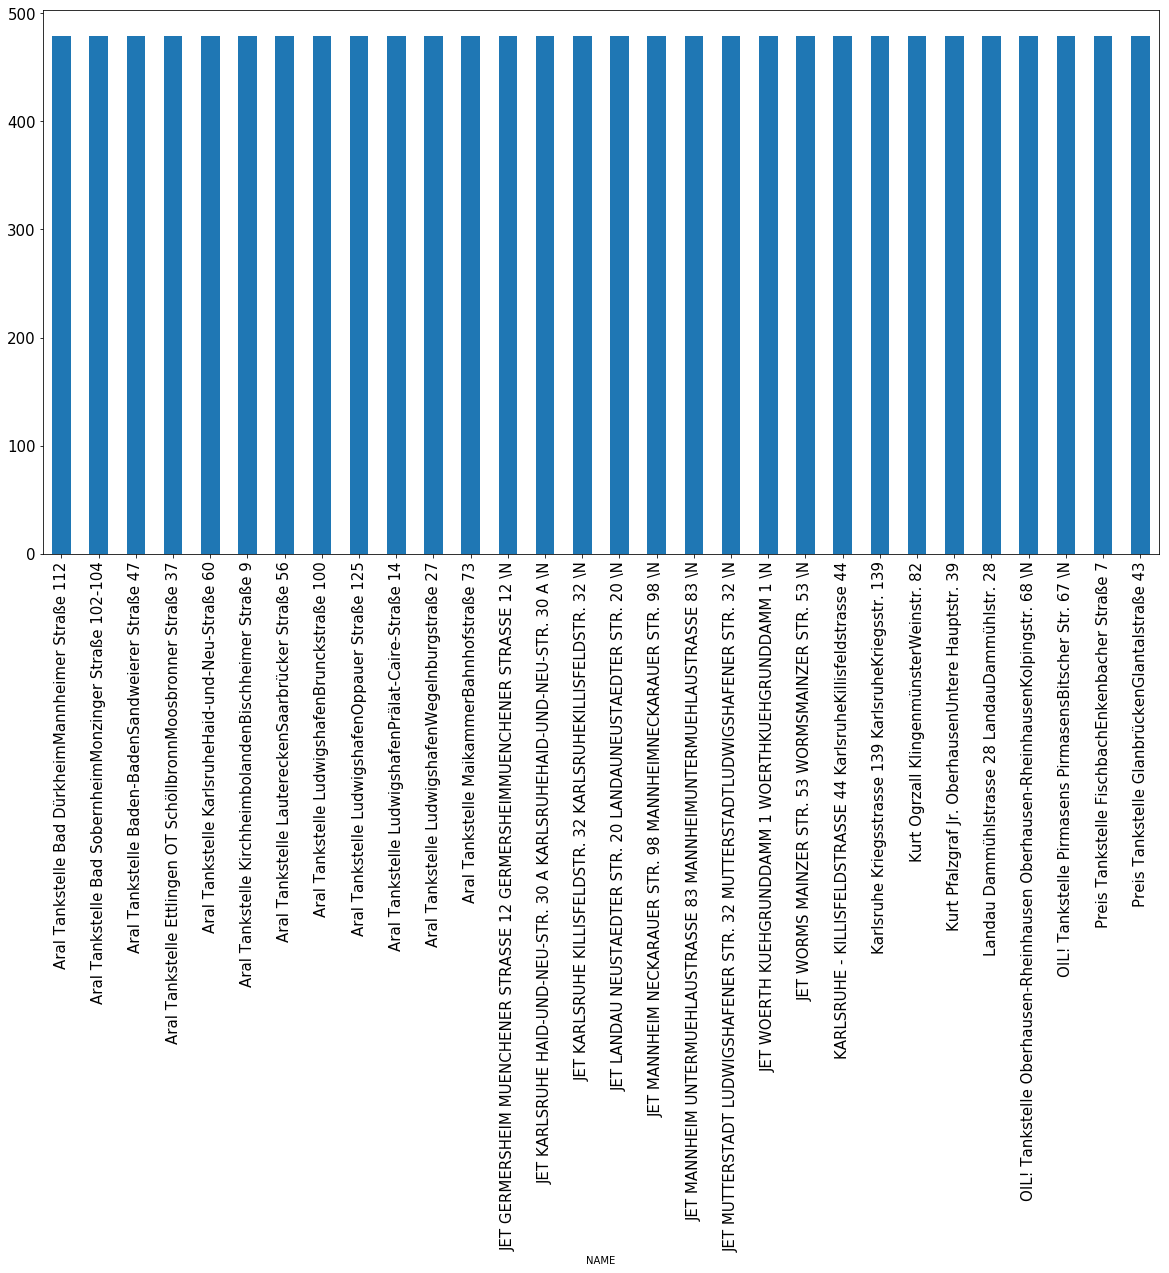

In [38]:
group_best.plot(kind='bar',figsize=(20,10),fontsize=15)
plt.show()

It becomes clear that there are many stations with the maximum number of days of historical data (485) and just some outliers with a small amount of data, which are gonna be filtered before we start working with our data.

### 2. What is the min, mean, max price for each gasoline type and station weekly (time series graph)

In [39]:
passed = select_most_complete_data(grouped,10)# this will be shown for the 10 best datastations 
data_best =data[data['NAME'].isin(passed)]

pivot_prices =pd.pivot_table(data_best[(data_best['YEAR']==2015 )],index=["WEEK","NAME"],values = ['E10'],aggfunc=[np.max,np.mean,np.min])

pivot_prices.swaplevel(0,1)
pivot_prices.swaplevel(1,0)
pivot_prices.columns = ['_'.join(col) for col in pivot_prices.columns]
pivot_prices = pivot_prices.unstack()
pivot_prices.columns = ['_'.join(col) for col in pivot_prices.columns]

In [40]:
def create_graph (database,valuecol,index1,index2):
    
    pivot_prices =pd.pivot_table(data_best[(database.YEAR==2015)],index=[index1,index2],values = [valuecol],aggfunc=[np.max,np.mean,np.min])


    pivot_prices.swaplevel(0,1)
    pivot_prices.swaplevel(1,0)
    pivot_prices.columns = ['_'.join(col) for col in pivot_prices.columns]
    pivot_prices = pivot_prices.unstack()
    pivot_prices.columns = ['_'.join(col) for col in pivot_prices.columns]
    
    
    sns.set_style("whitegrid")
    
    pivot_prices.plot(figsize=(30,15),fontsize=20,linestyle='-', linewidth=2)
    plt.legend(loc='upper right',fontsize = 4)
    plt.title(valuecol+'Prices/Week in 2015',fontsize=30)
    plt.show()

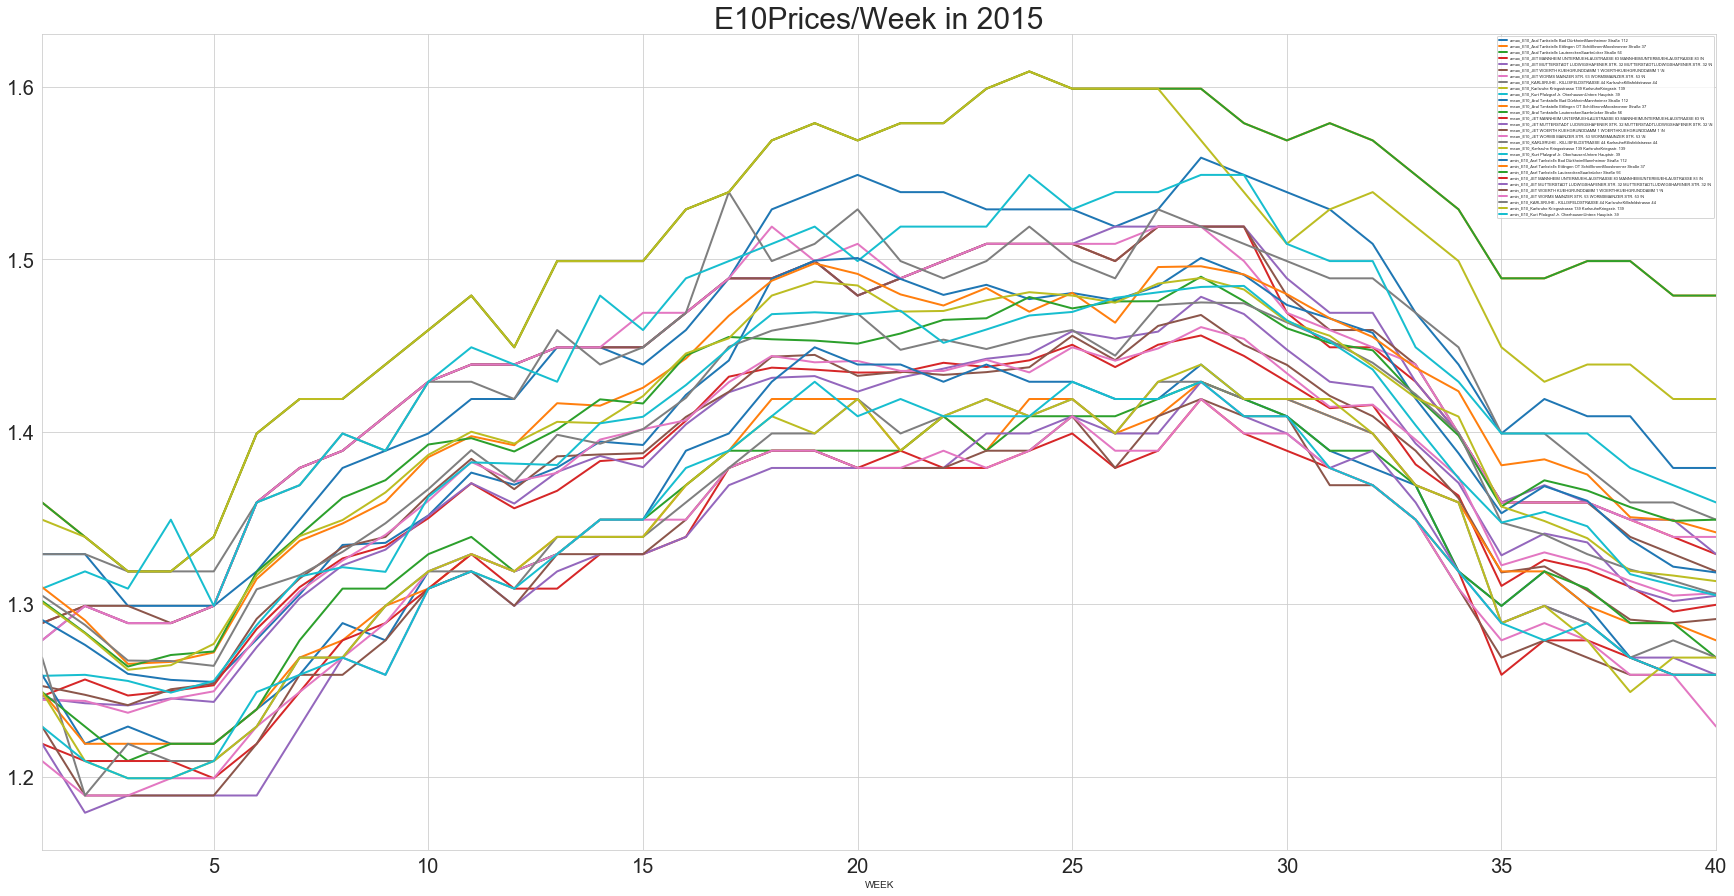

In [41]:
create_graph(data_best,'E10','WEEK','NAME')

A strong seasonality can be observed from months 5 to 35

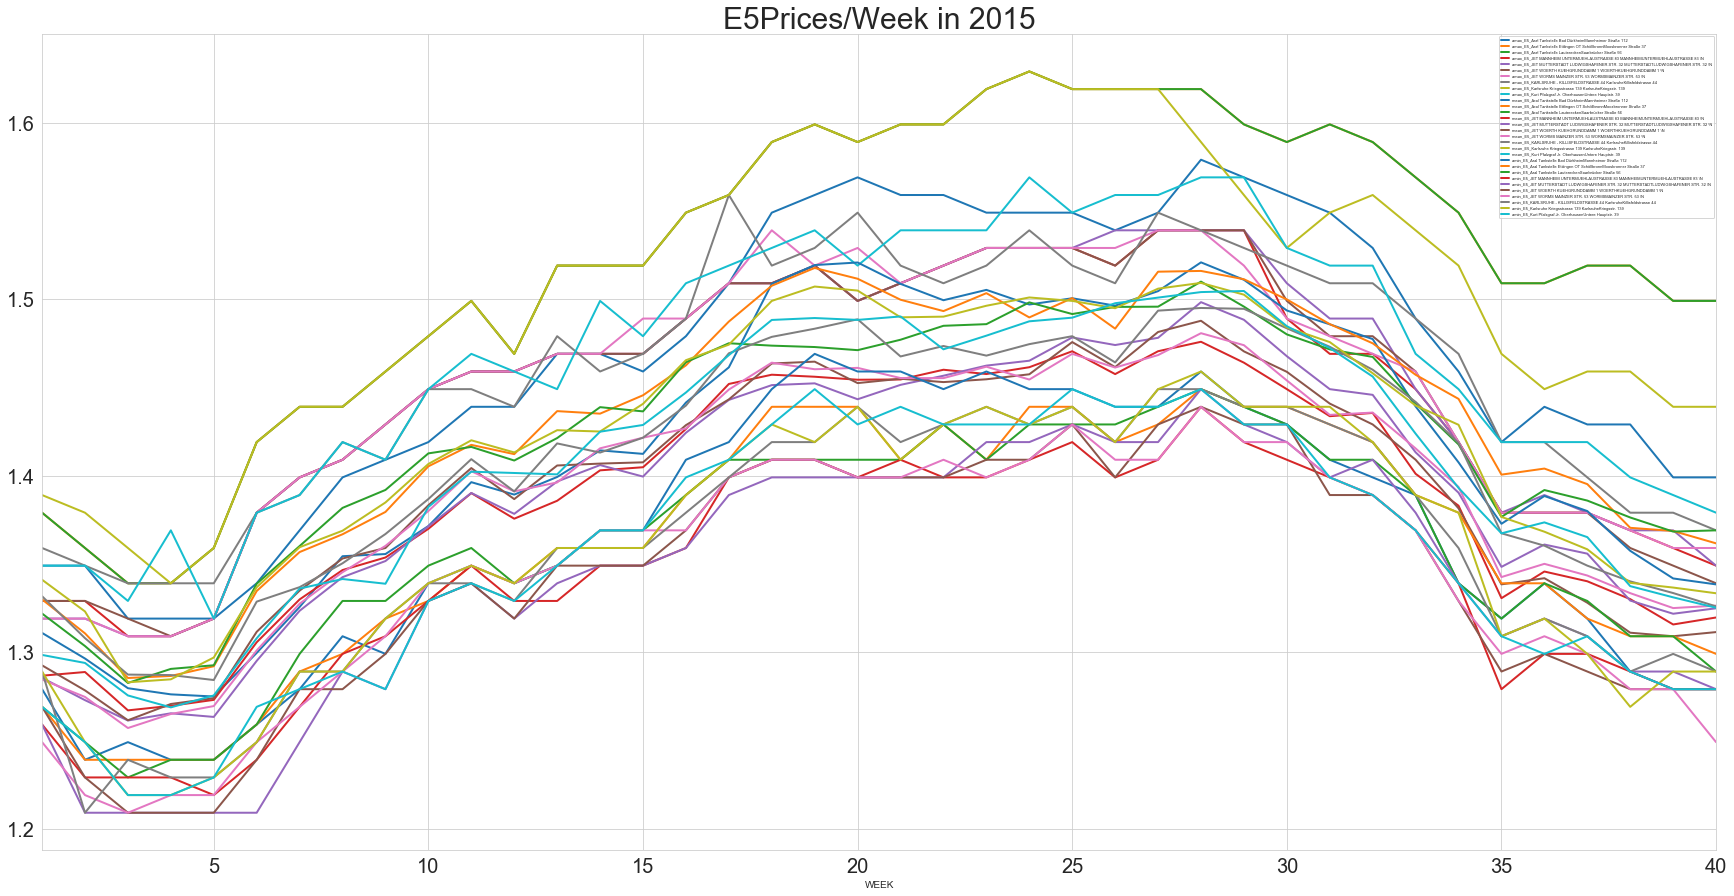

In [42]:
create_graph(data_best,'E5','WEEK','NAME')

The same pattern repeats for the Gasoline E5

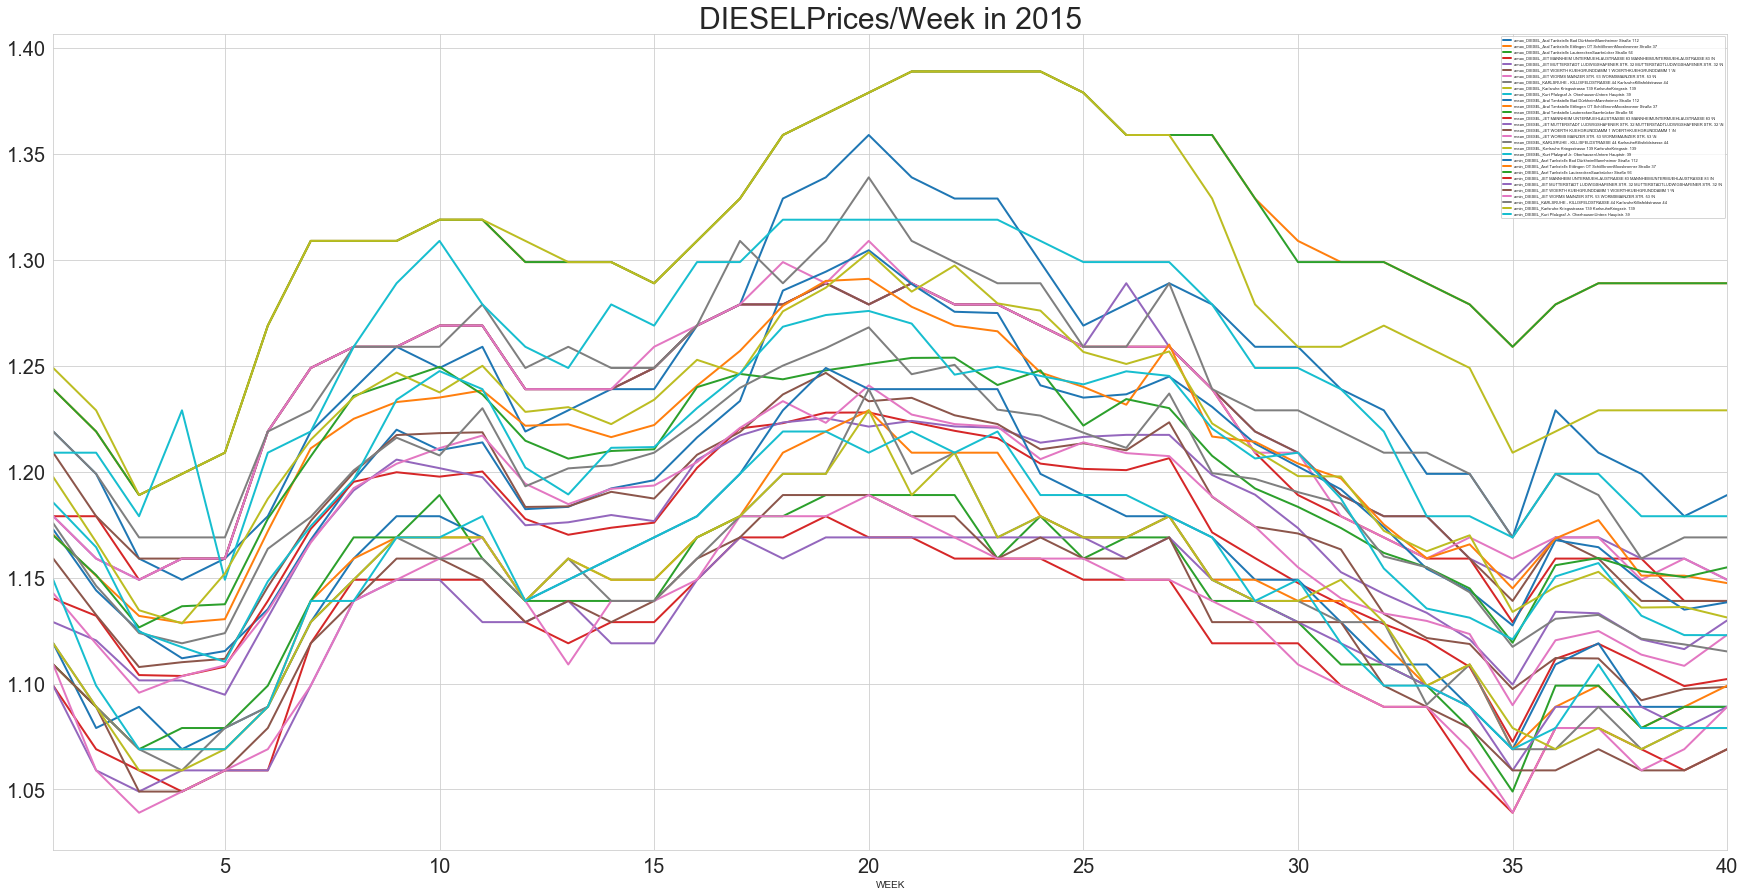

In [43]:
create_graph(data_best,'DIESEL','WEEK','NAME')

For the Diesel graph, it can be observed that the seasonality is not that strong as for the gasoline graphs but there are still some outliers

In [44]:
passed = select_most_complete_data(grouped,450) #450 > total number of stations, just to filter
data_best =data[data['NAME'].isin(passed)]

In [45]:
pivot_prices =pd.pivot_table(data_best,index='WEEKDAY',values = ['E10'],aggfunc=[np.mean])


pivot_prices = pivot_prices.unstack()
    
    


### 3. What is cheapest station (in average) and why?

In [46]:
#Checking the average prices for Each station and ordering
pivot_cheap = pd.pivot_table(data,index=['NAME'],values = ['DIESEL','E10','E5'],aggfunc=[np.mean])

pivot_cheap.columns = ['_'.join(col) for col in pivot_cheap.columns]
pivot_cheap.reset_index(0,inplace= True)

pivot_cheap['General_Mean'] =(pivot_cheap.mean_DIESEL + pivot_cheap.mean_E10 + pivot_cheap.mean_E5)/3

pivot_cheap.sort_values(by = 'General_Mean',ascending = True)

pivot_cheap.head()

NAME  mean_DIESEL  mean_E10   mean_E5  General_Mean
0      AKAY Tankstelle LudwigshafenBudapester Str. 3     1.243585  1.421735  1.450284      1.371868
1            AVIA Au am Rhein Au am RheinLammstr.  1     1.274686  1.451211  1.479057      1.401651
2              AVIA Eppenbrunn EppenbrunnTalstr.  44     1.252143  1.432132  1.460597      1.381624
3  AVIA Karlsruhe-Nordweststadt KarlsruheWilhelm-...     1.259480  1.435018  1.463756      1.386084
4  AVIA Karlsruhe-Waldstadt KarlsruheKönigsberger...     1.281024  1.458525  1.487913      1.409154

In [47]:
print('The cheapest Station, considering the average prices of the 3 types of fuel along the whole database is', pivot_cheap.NAME.loc[0])

The cheapest Station, considering the average prices of the 3 types of fuel along the whole database is AKAY Tankstelle LudwigshafenBudapester Str. 3


In [48]:
def create_bar_graph(database,indexcol,valuecol,ylim1,ylim2):
        pivot_prices =pd.pivot_table(data_best,index=[indexcol],values = [valuecol],aggfunc=[np.mean])
        pivot_prices = pivot_prices.unstack()
        pivot_prices.reset_index()
        sns.set()
        sns.set_style("whitegrid")
        pivot_prices.plot(kind = 'bar',figsize=(30,10),fontsize=20,ylim=(ylim1,ylim2),x=indexcol)
        diff = round(pivot_prices.mean(),3) -round(pivot_prices.min(),3)
        diff = round(diff,3)
        plt.title((valuecol + ' Distribution of '+ valuecol+ " AVG = "\
                   +str(round(pivot_prices.mean(),3)) + ", MIN = "\
                  +str(round(pivot_prices.min(),3))+ ", MAX = "\
                  +str(round(pivot_prices.max(),3))+ ", AVG-MIN = "\
                   +str(diff)),fontsize=30)


        plt.show()
        

### 4. At which day of a weak is the price most likely the cheapest (week profile)

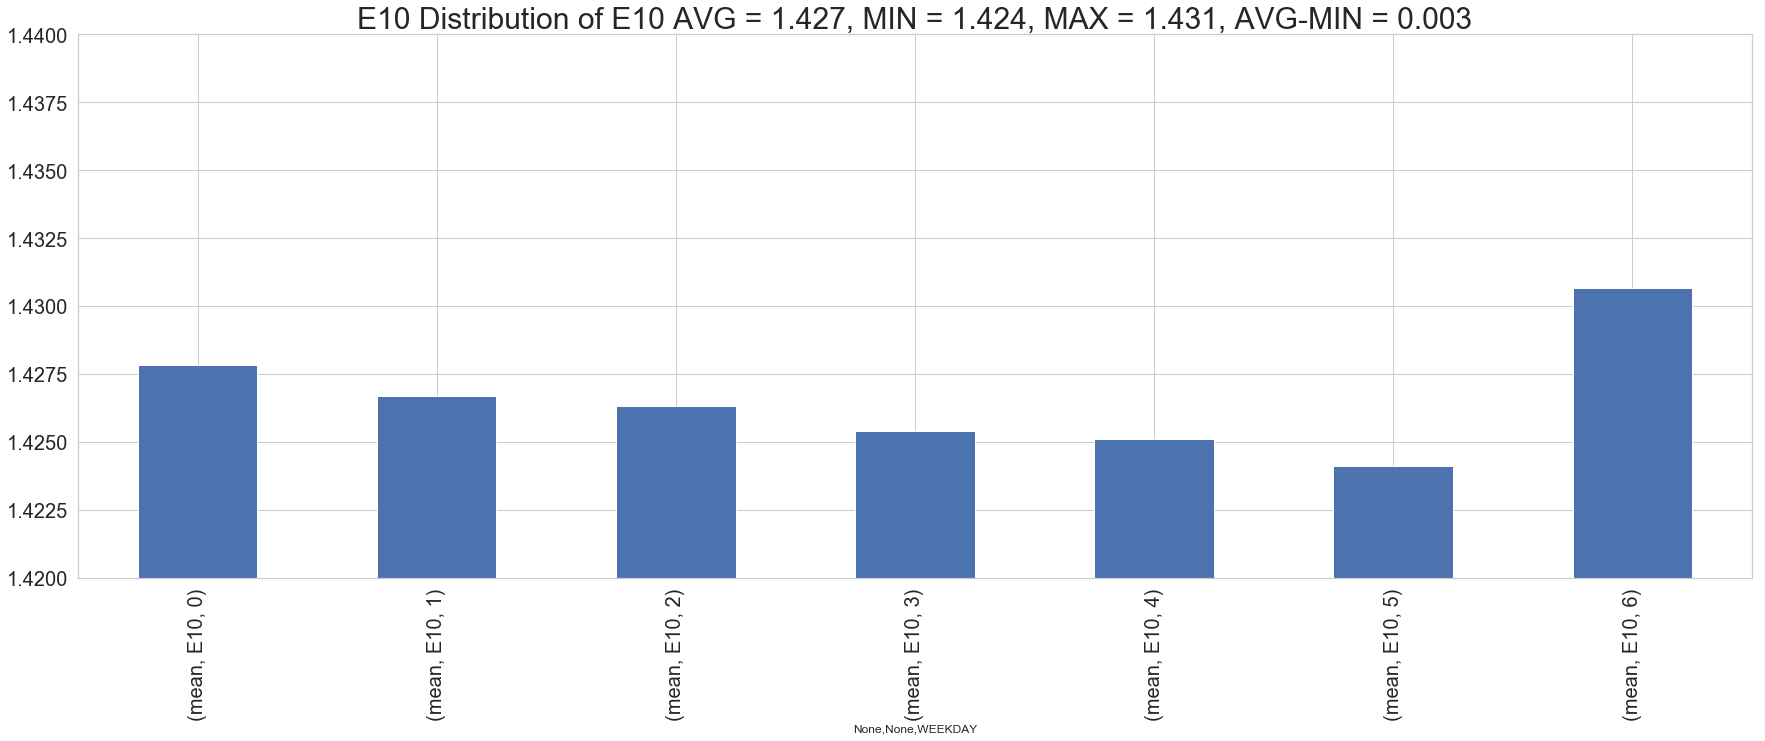

In [49]:
create_bar_graph(data_best,'WEEKDAY','E10',1.420,1.440)


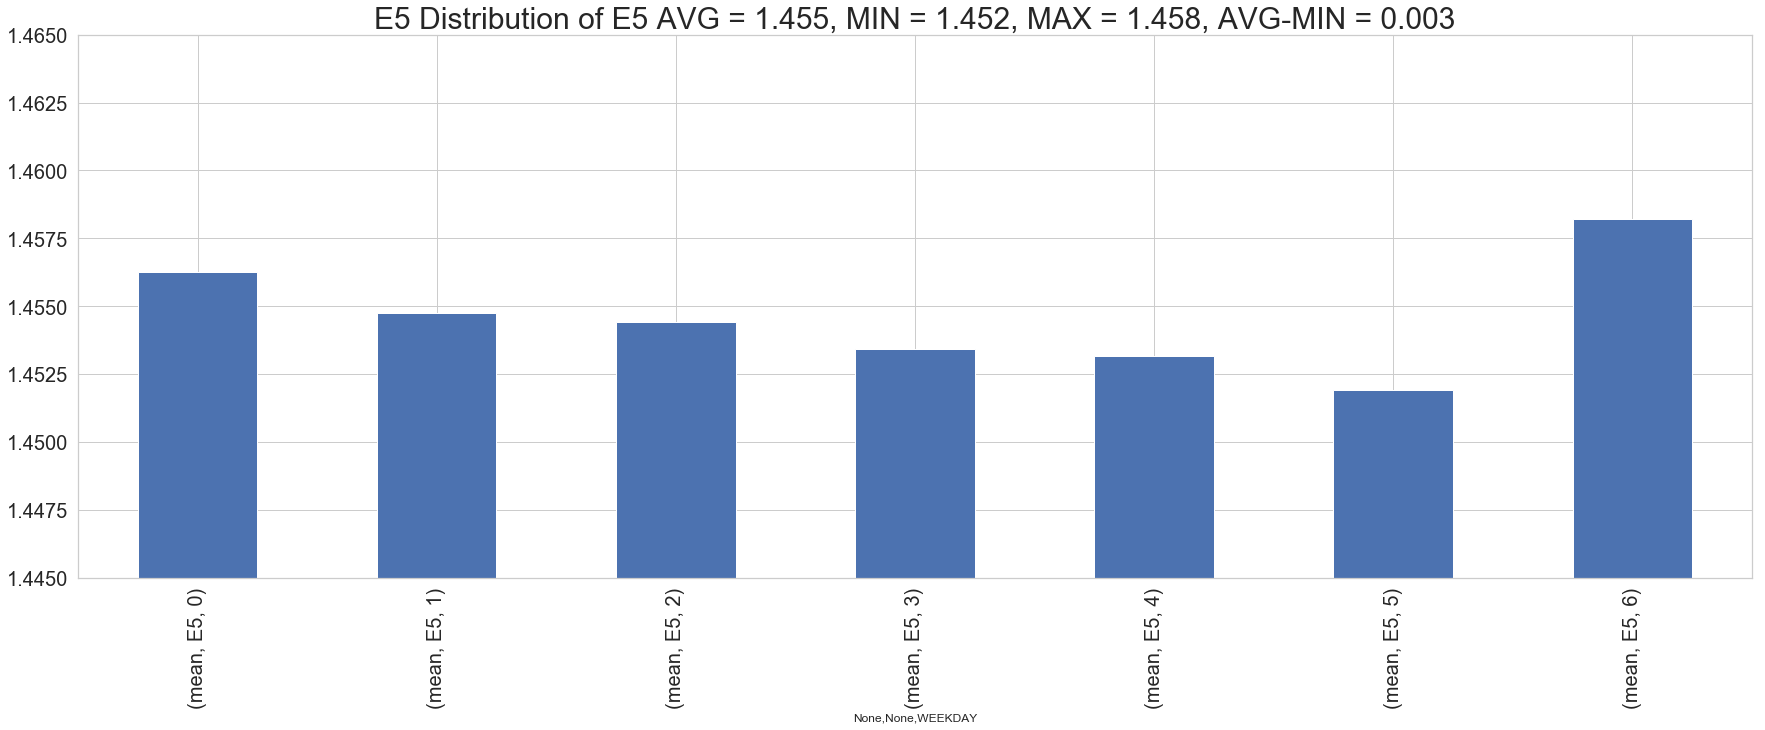

In [50]:
create_bar_graph(data_best,'WEEKDAY','E5',1.445,1.465)

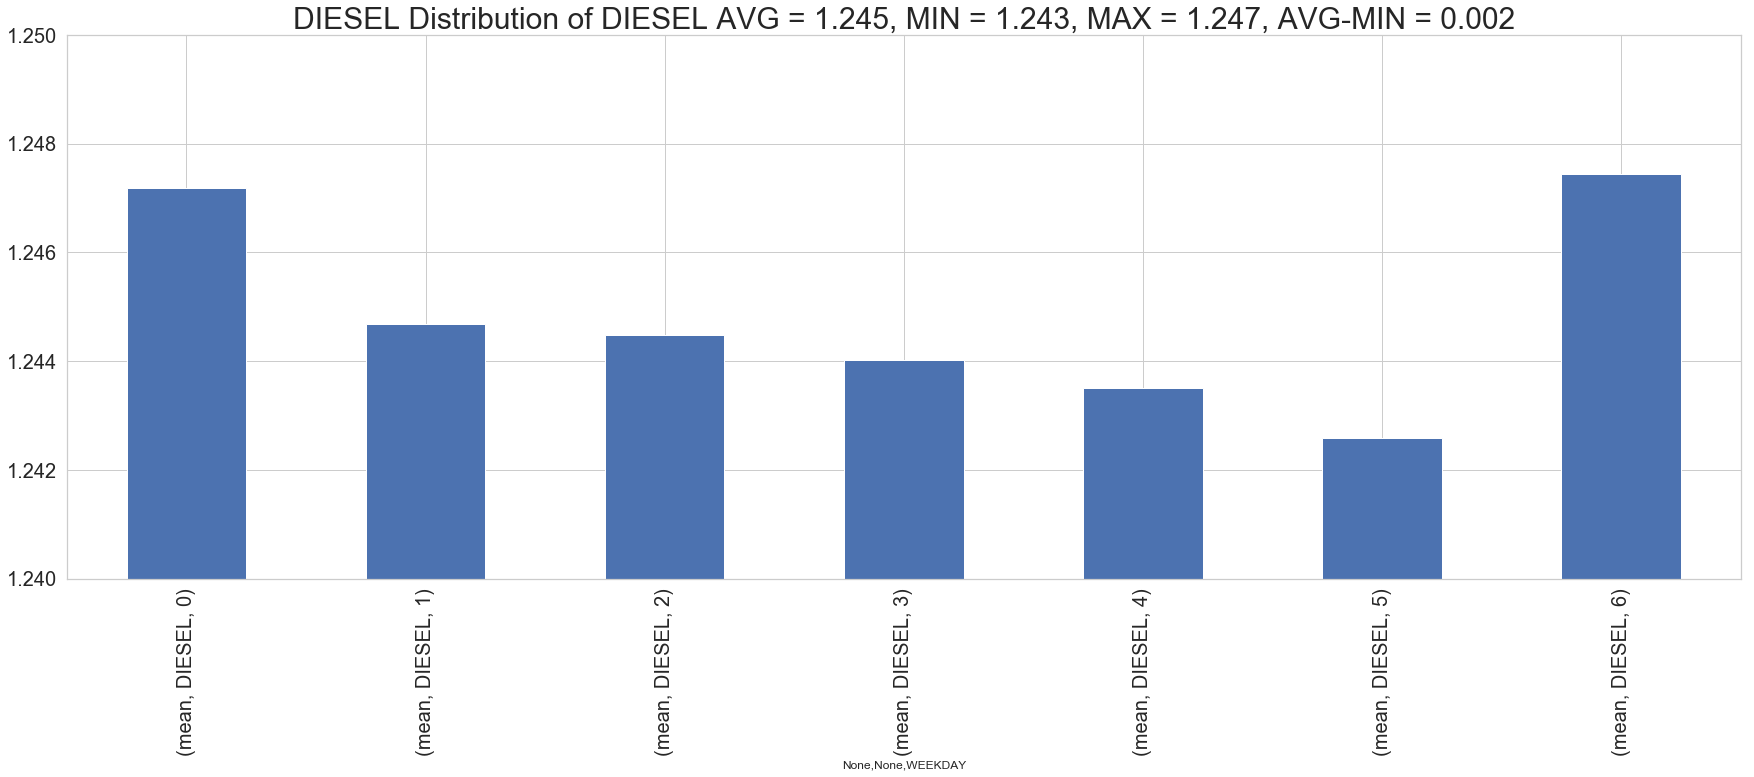

In [51]:
create_bar_graph(data_best,'WEEKDAY','DIESEL',1.240,1.250)

It can be observed that the price floats along the week, being more expensive on weekends than during the weekdays, this is true for all 3 types of fuel. Also The difference between the Average and the minimum is only 0.002 for all three types.

### 5. At which hour during a day is the price the cheapest in average (hour profile)

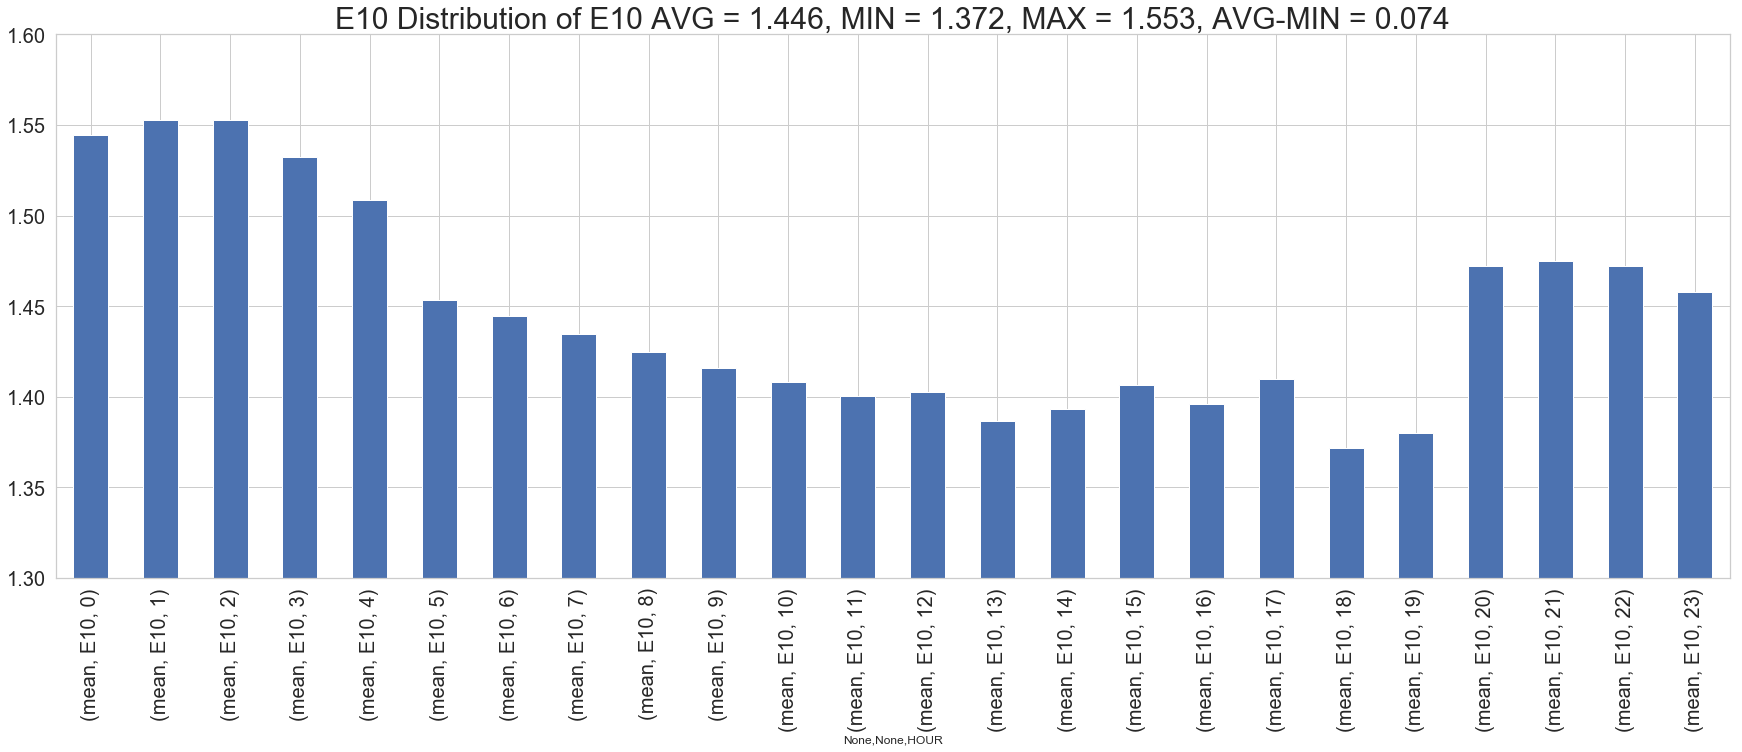

In [52]:
create_bar_graph(data_best,'HOUR','E10',1.300,1.600)

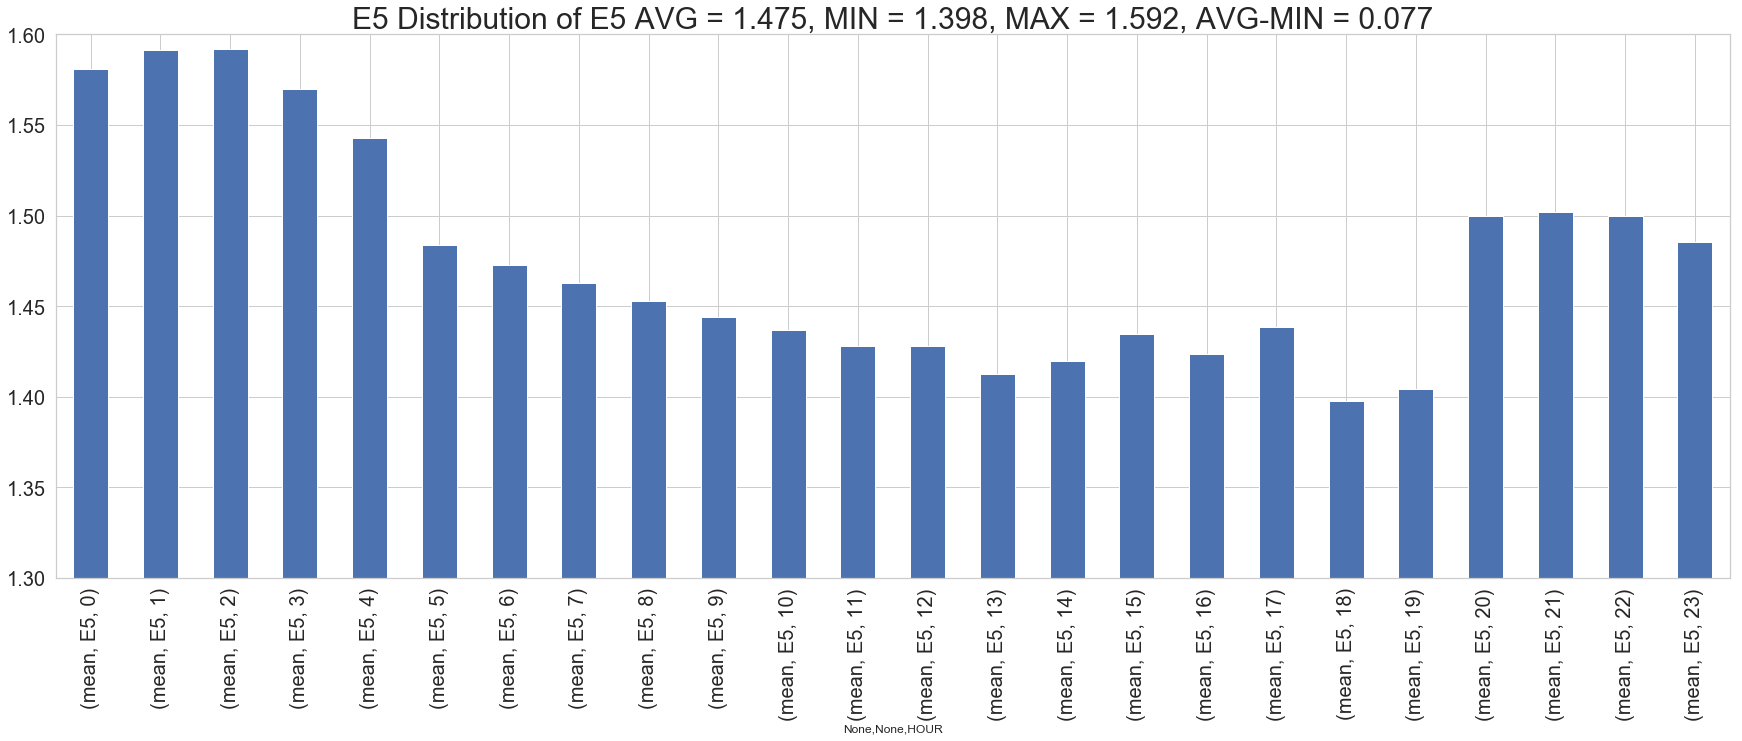

In [53]:
create_bar_graph(data_best,'HOUR','E5',1.300,1.600)

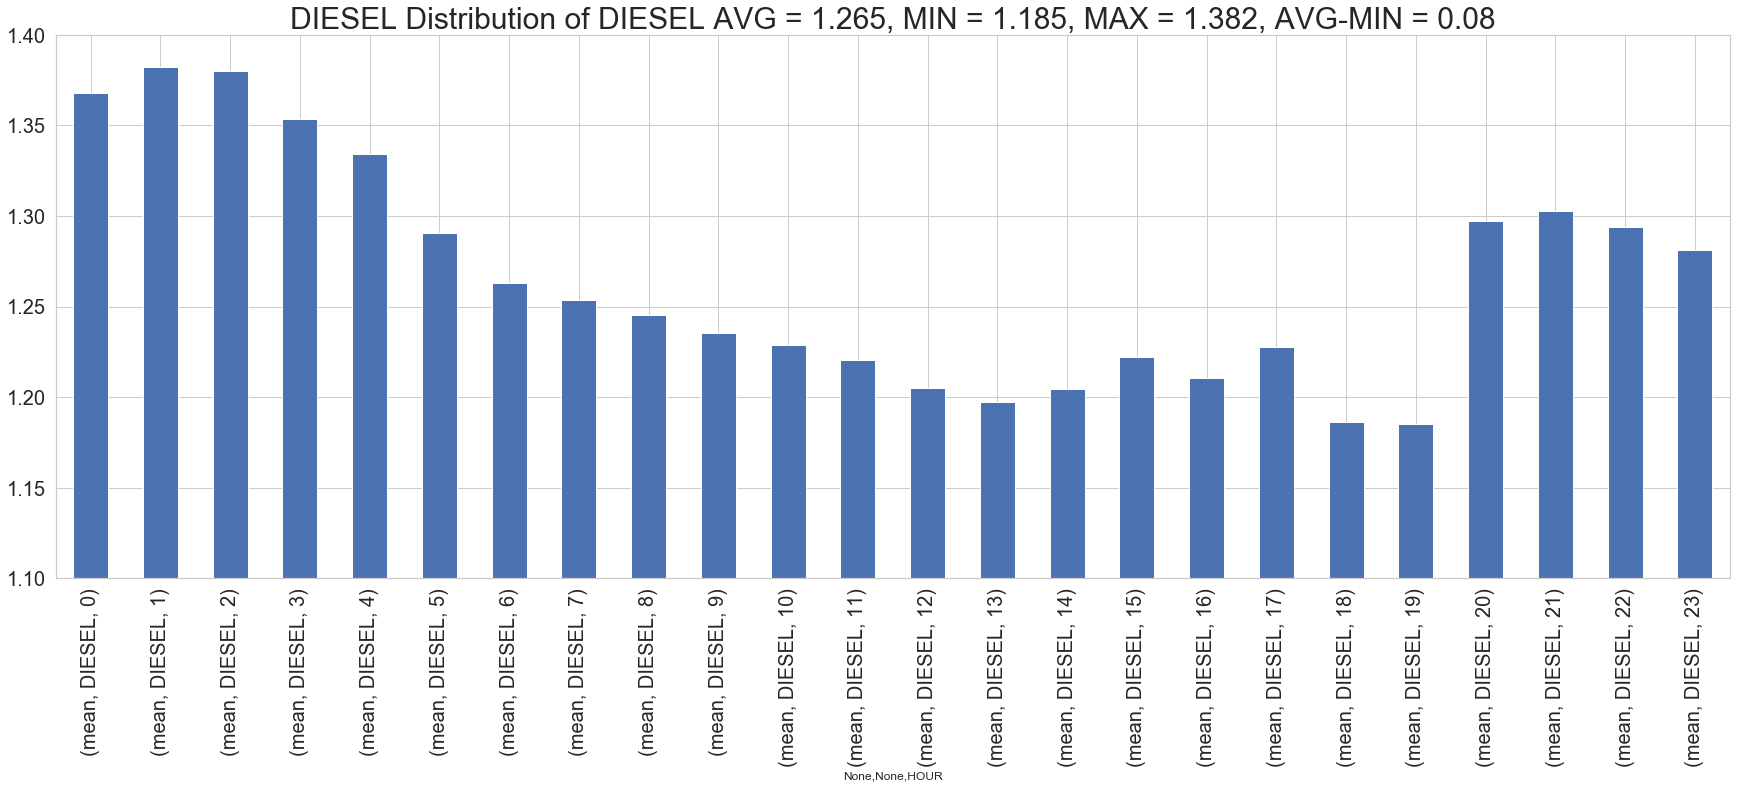

In [54]:
create_bar_graph(data_best,'HOUR','DIESEL',1.100,1.400)

For the Hour profile, it can be observed that in the interval between 20:00 and 05:00, the prices are higher, reaching the lowest prices  between 12:00 and 19:00.
The difference here can reach values between 0.15 and 0.20 Euro per liter.
It's also important to observe that the differente from the Average value and the minimum in 18h is 0,08 0,083 and 0,084 for E10, E5 and diesel respectively.

### 6. How many different station locations are present in the data (visualize via a map)

In [55]:
coord =data[['LAT','LNG']]           
            
coord =pd.DataFrame.drop_duplicates(coord)

lat = tuple(coord['LAT']) 
lon = tuple(coord['LNG'])


In [56]:
#this code may cause the kernel to die 
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(20,10))
map=Basemap(projection="lcc",resolution="l",width=1E6,height=1E6,
                             lon_0=9.9167,lat_0=51.5167,fix_aspect=False)
map.drawcountries(zorder=1,color="black", linewidth=1.0)
map.shadedrelief()
map.drawcoastlines(color="black",linewidth=1.2)
map.drawmapboundary()


map.scatter(lon,lat,3,marker="o",latlon=True)
plt.title("Stations Locations in Germany")
plt.show()

KeyError: 'PROJ_LIB'

It can be observed that the data covers the center-west part of Germany, centered around the Pfalz region.




### 7. What is the gas station which has most price data points, choose one and draw the time series for all 3 gasoline types

In [57]:

data_len = data_best[['NAME','E10','E5','DIESEL']]
pivot_len =pd.pivot_table(data_len,index=["NAME"],values = ['E10','E5','DIESEL'],aggfunc=[len])
pivot_len.columns = ['_'.join(col) for col in pivot_len.columns]
pivot_len = pivot_len.sort_values(by='len_E10', ascending = False)
pivot_len.drop(columns = ['len_E5','len_DIESEL'], inplace = True)
pivot_len.reset_index(level=0, inplace=True)

In [58]:
best_station_data = data_best[data_best.NAME ==   pivot_len['NAME'].loc[0]]


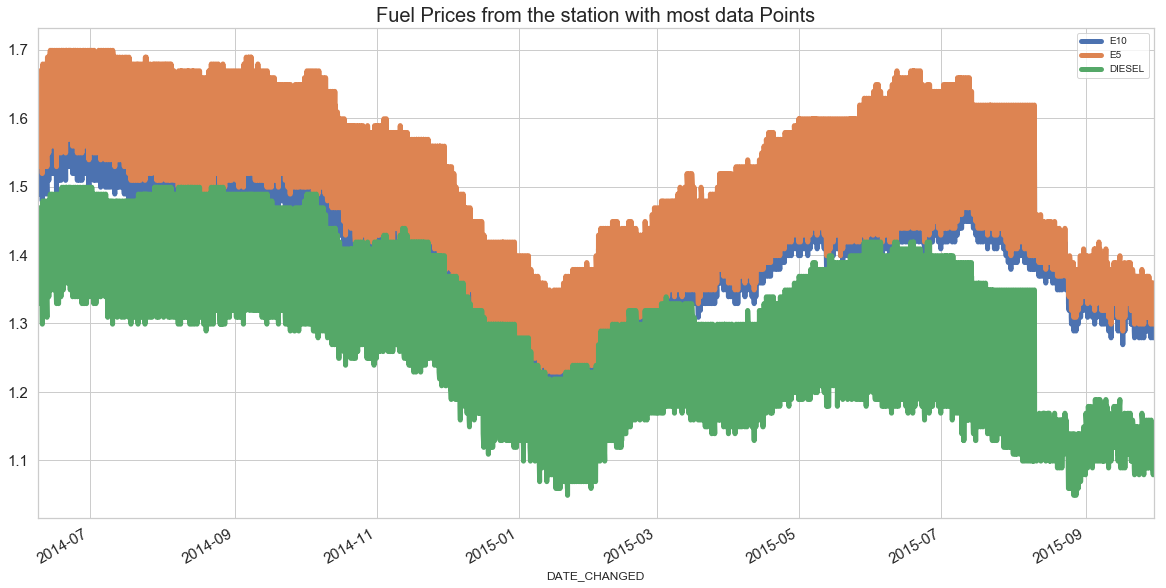

In [59]:
#plot time series of the station with most data points    
sns.set_style("whitegrid")
    
best_station_data.plot(x ='DATE_CHANGED',y = ['E10','E5','DIESEL'],figsize=(20,10),fontsize=15,linestyle='-', linewidth=5)
plt.title('Fuel Prices from the station with most data Points',fontsize=20)
plt.legend(loc='upper right',fontsize = 10)
plt.show()


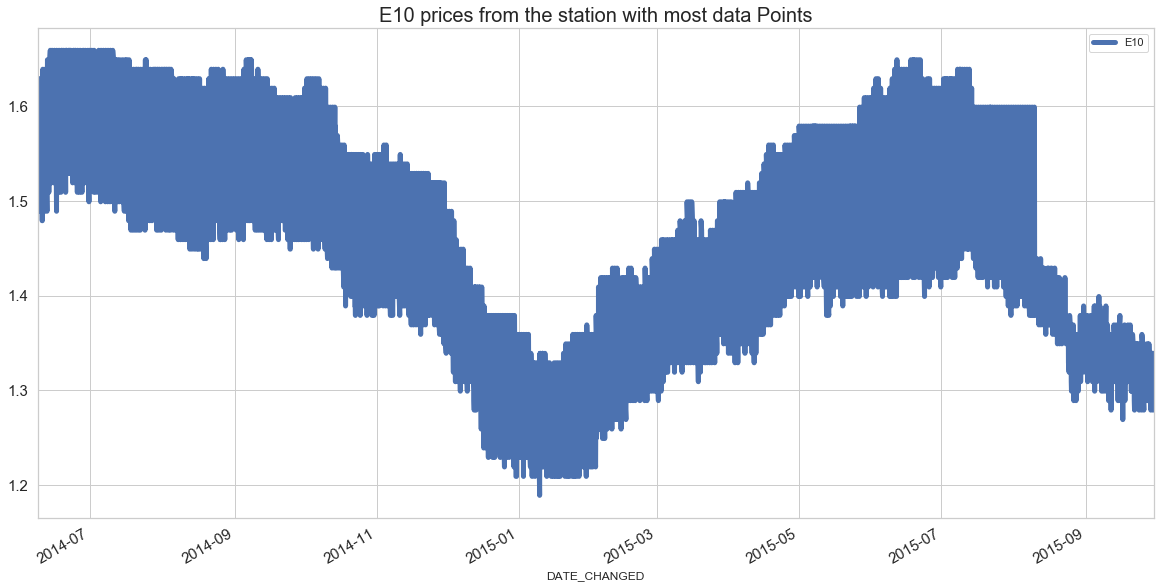

In [60]:
best_station_data.plot(x ='DATE_CHANGED',y = 'E10',figsize=(20,10),fontsize=15,
                       linestyle='-', linewidth=5)
plt.title('E10 prices from the station with most data Points',fontsize=20)
plt.show()

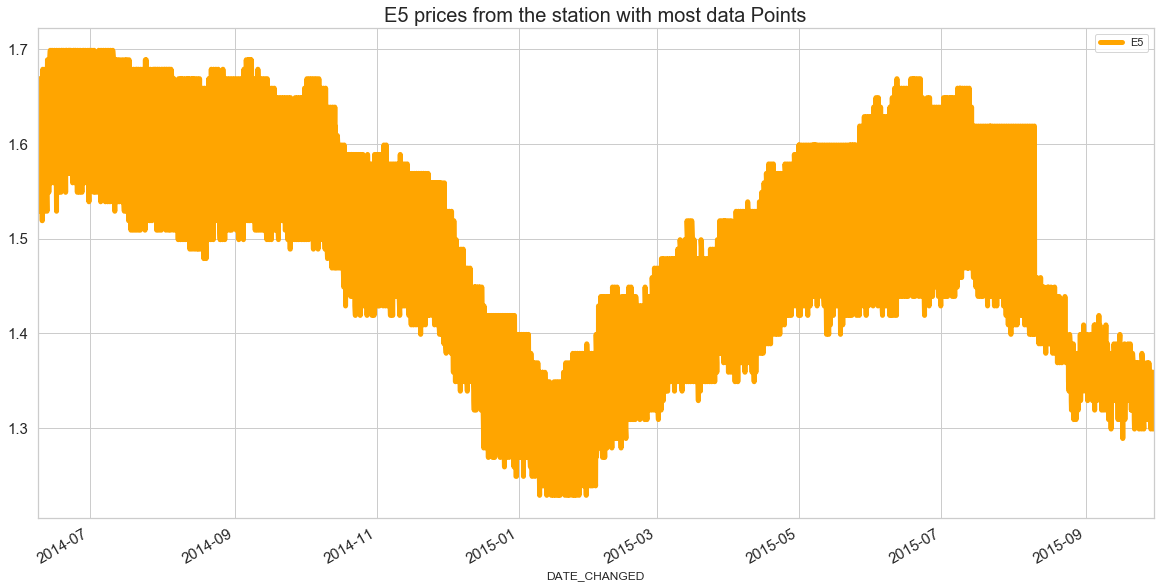

In [61]:
best_station_data.plot(x ='DATE_CHANGED',y = 'E5',figsize=(20,10),fontsize=15,
                       linestyle='-', linewidth=5,color = 'orange')
plt.title('E5 prices from the station with most data Points',fontsize=20)
plt.show()

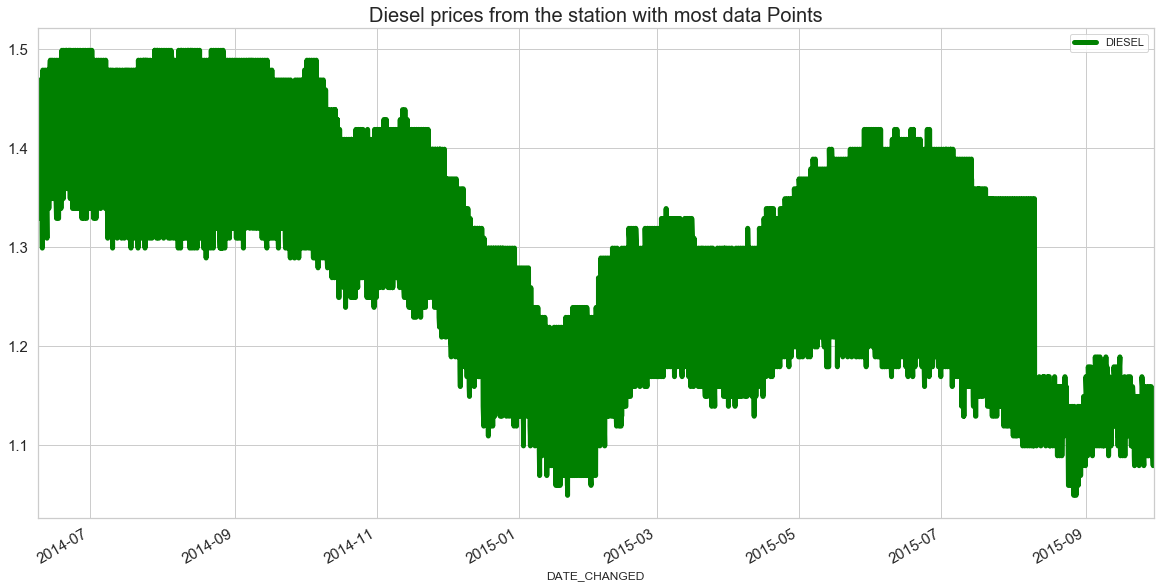

In [62]:
best_station_data.plot(x ='DATE_CHANGED',y = 'DIESEL',figsize=(20,10),fontsize=15,
                       linestyle='-', linewidth=5,color = 'green')
plt.title('Diesel prices from the station with most data Points',fontsize=20)
plt.show()

From the observation of these Time series Graphs, the seasonality can be observed again, having a peak July(Summer), starting to go down in November(2014) or August(2015), until a local minimum in February(Winter). A higher variation can also be noticed between June and July(2015)

### 8. At which hour during a day do we have the most price changes

In [63]:
#creating columns with change information (error of 1 per station change can be ignored)
data_best['E10_CHANGE']=data_best['E10'].diff()!=0
data_best['E5_CHANGE']=data_best['E5'].diff()!=0
data_best['DIESEL_CHANGE']=data_best['DIESEL'].diff()!=0



C:\Users\Nielson\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Nielson\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Nielson\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [64]:
data_best.head()

STID     E5    E10  DIESEL        DATE_CHANGED                                     NAME BRAND                                    PLACE        LAT       LNG  YEAR  DAY        DATE  WEEK  MONTH  HOUR  WEEKDAY WEEKDAYSTR  E10_CHANGE  E5_CHANGE  DIESEL_CHANGE
0  01bf5a06-4248-43a5-9524-56123fa3ab2f  1.589  1.549   1.389 2014-10-02 05:22:01  Esso Tankstelle WORMSZELLERTALSTR. 30    ESSO  Esso Tankstelle WORMSZELLERTALSTR. 30    49.633409  8.273847  2014  275  2014-10-02    40     10     5        3        WED        True       True           True
2  01bf5a06-4248-43a5-9524-56123fa3ab2f  1.569  1.529   1.369 2014-10-02 05:26:01  Esso Tankstelle WORMSZELLERTALSTR. 30    ESSO  Esso Tankstelle WORMSZELLERTALSTR. 30    49.633409  8.273847  2014  275  2014-10-02    40     10     5        3        WED        True       True           True
4  01bf5a06-4248-43a5-9524-56123fa3ab2f  1.569  1.529   1.359 2014-10-02 09:06:01  Esso Tankstelle WORMSZELLERTALSTR. 30    ESSO  Esso Tankstelle WORMSZELLERTALSTR. 30    49.633409  8.273847  2014  275  2014-10-02    40     10     9        3        WED       False      False           True
6  01bf5a06-4248-43a5-9524-56123fa3ab2f  1.539  1.499   1.339 2014-10-03 12:14:01  Esso Tankstelle WORMSZELLERTALSTR. 30    ESSO  Esso Tankstelle WORMSZELLERTALSTR. 30    49.633409  8.273847  2014  276  2014-10-03    40     10    12        4        THU        True       True           True
8  01bf5a06-4248-43a5-9524-56123fa3ab2f  1.529  1.489   1.329 2014-10-03 14:14:01  Esso Tankstelle WORMSZELLERTALSTR. 30    ESSO  Esso Tankstelle WORMSZELLERTALSTR. 30    49.633409  8.273847  2014  276  2014-10-03    40     10    14        4        THU        True       True           True

In [65]:
pivot_change_E10 = pd.pivot_table(data_best[data_best.E10_CHANGE == True],index=['HOUR','E10_CHANGE'],values = ['E10'],aggfunc=[len])
pivot_change_E10 = pivot_change_E10.sort_values(by=('len','E10'), ascending = False)
pivot_change_E10.head()

len
                     E10
HOUR E10_CHANGE         
12   True        57968.0
8    True        48075.0
7    True        45877.0
9    True        45177.0
6    True        43570.0

In [66]:
pivot_change_E5 = pd.pivot_table(data_best[data_best.E5_CHANGE == True],index=['HOUR','E5_CHANGE'],values = ['E5'],aggfunc=[len])
pivot_change_E5 = pivot_change_E5.sort_values(by=('len','E5'), ascending = False)


pivot_change_E5.head()

len
                     E5
HOUR E5_CHANGE         
12   True       58018.0
8    True       48051.0
7    True       45845.0
9    True       45181.0
6    True       43593.0

In [67]:
pivot_change_DIESEL = pd.pivot_table(data_best[data_best.DIESEL_CHANGE == True],index=['HOUR','DIESEL_CHANGE'],values = ['DIESEL'],aggfunc=[len])
pivot_change_DIESEL = pivot_change_DIESEL.sort_values(by=('len','DIESEL'), ascending = False)
pivot_change_DIESEL.head()

len
                     DIESEL
HOUR DIESEL_CHANGE         
12   True           58186.0
8    True           48554.0
7    True           45857.0
9    True           45491.0
6    True           43723.0

The information about price changes in the 3 tables concludes that the time where it's most likely to have price changes is from 12 to 1 PM, followed by the interval between 6 to 10 in the morning.

### 9. Select 20 gas stations having the longest time history and visualize the average price per month. Use heatmap and only the prices between 12:00-13:00 of e10 and diesel.

In [68]:
passed = select_most_complete_data(grouped,20)

data_best = data[data['NAME'].isin(passed)]
data_best = data_best[['NAME','E10','DIESEL','MONTH','HOUR']]
data_hmap=data_best[(data_best.HOUR==12)]
data_hmap.head()


NAME    E10  DIESEL  MONTH  HOUR
433796  JET MUTTERSTADT LUDWIGSHAFENER STR. 32 MUTTERS...  1.429   1.159      8    12
433802  JET MUTTERSTADT LUDWIGSHAFENER STR. 32 MUTTERS...  1.369   1.109      8    12
433804  JET MUTTERSTADT LUDWIGSHAFENER STR. 32 MUTTERS...  1.399   1.139      8    12
433810  JET MUTTERSTADT LUDWIGSHAFENER STR. 32 MUTTERS...  1.369   1.109      8    12
433828  JET MUTTERSTADT LUDWIGSHAFENER STR. 32 MUTTERS...  1.389   1.129      8    12

In [69]:
pivot_E10_mon = pd.pivot_table(data_best,index=["MONTH",'NAME'],values = 'E10',aggfunc=[np.mean])
pivot_E10_mon.swaplevel(0,1)
pivot_E10_mon.swaplevel(1,0)
pivot_E10_mon.columns = ['_'.join(col) for col in pivot_E10_mon.columns]
pivot_E10_mon = pivot_E10_mon.unstack()
pivot_E10_mon.columns = ['_'.join(col) for col in pivot_E10_mon.columns]



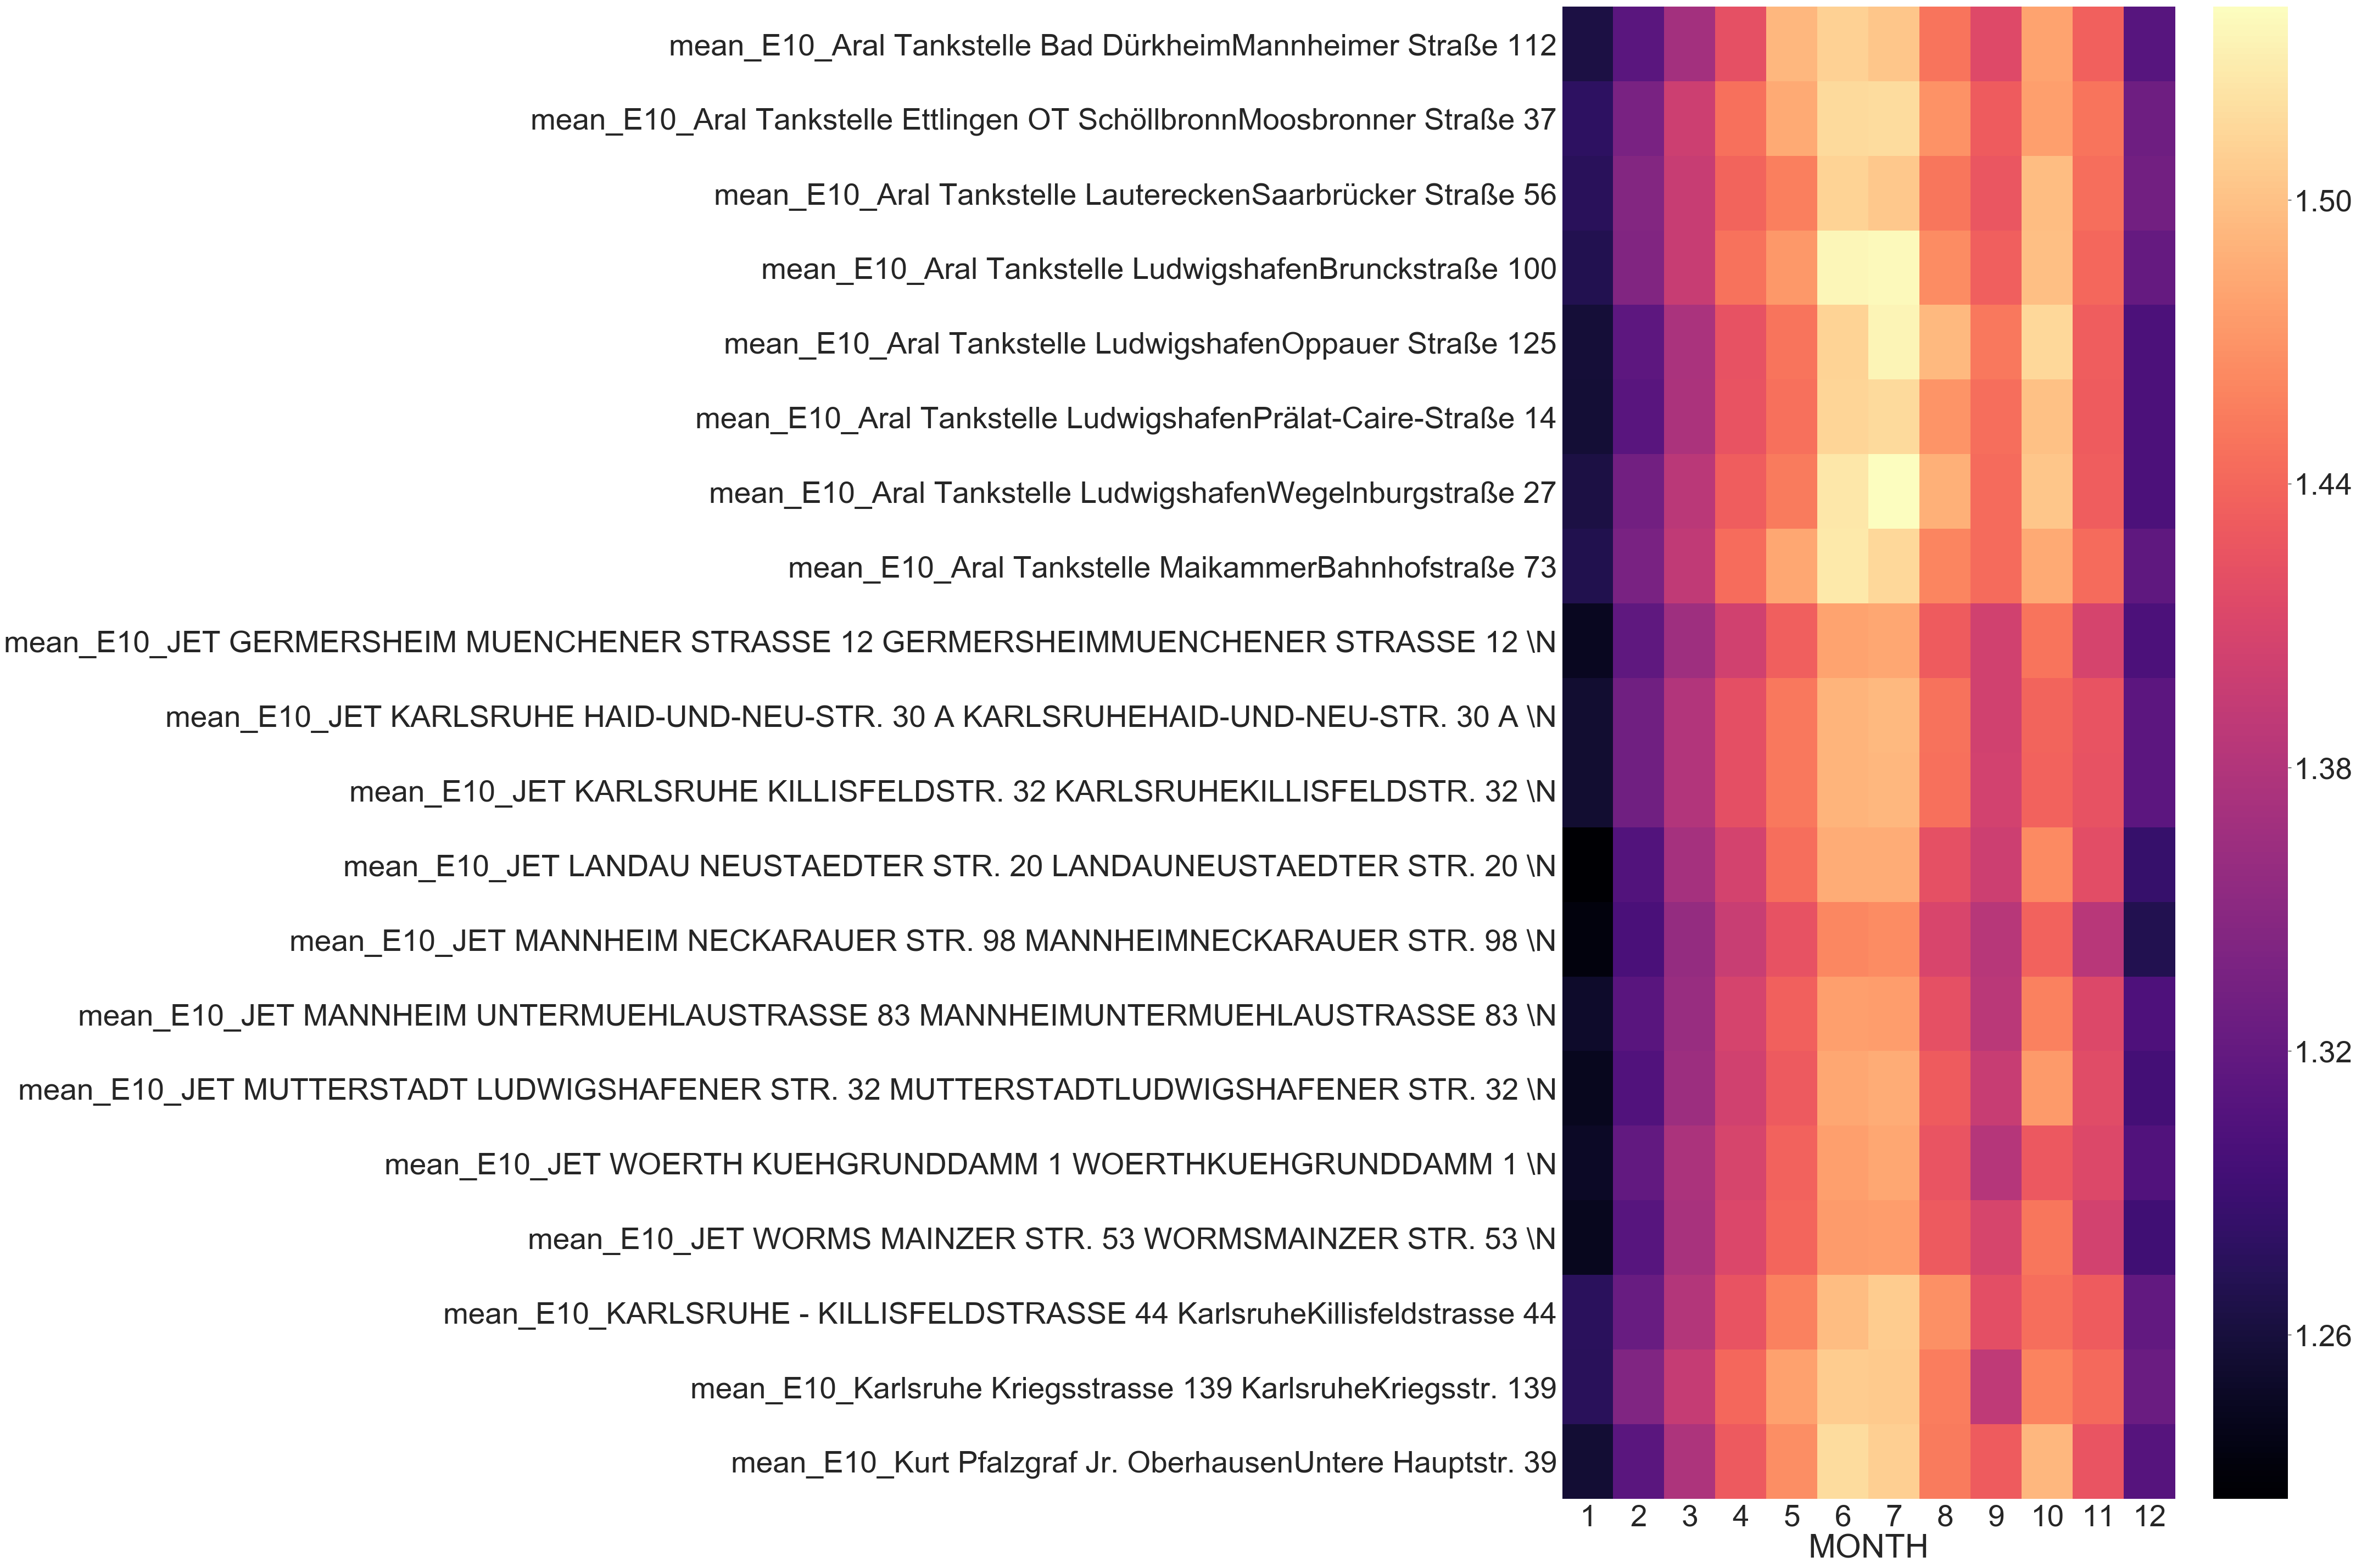

In [70]:
plt.figure(figsize=(25,50))
sns.set(font_scale=5)
heat_map = sns.heatmap(pivot_E10_mon.transpose(),cmap='magma')

By the heatmap, we can notice the seasonality, with the lighter colors in the "Summer" months and the darker color in the "Winter" Months

In [71]:
pivot_DIESEL_mon = pd.pivot_table(data_best,index=["MONTH",'NAME'],values = 'DIESEL',aggfunc=[np.mean])
pivot_DIESEL_mon.swaplevel(0,1)
pivot_DIESEL_mon.swaplevel(1,0)
pivot_DIESEL_mon.columns = ['_'.join(col) for col in pivot_DIESEL_mon.columns]
pivot_DIESEL_mon = pivot_DIESEL_mon.unstack()
pivot_DIESEL_mon.columns = ['_'.join(col) for col in pivot_DIESEL_mon.columns]



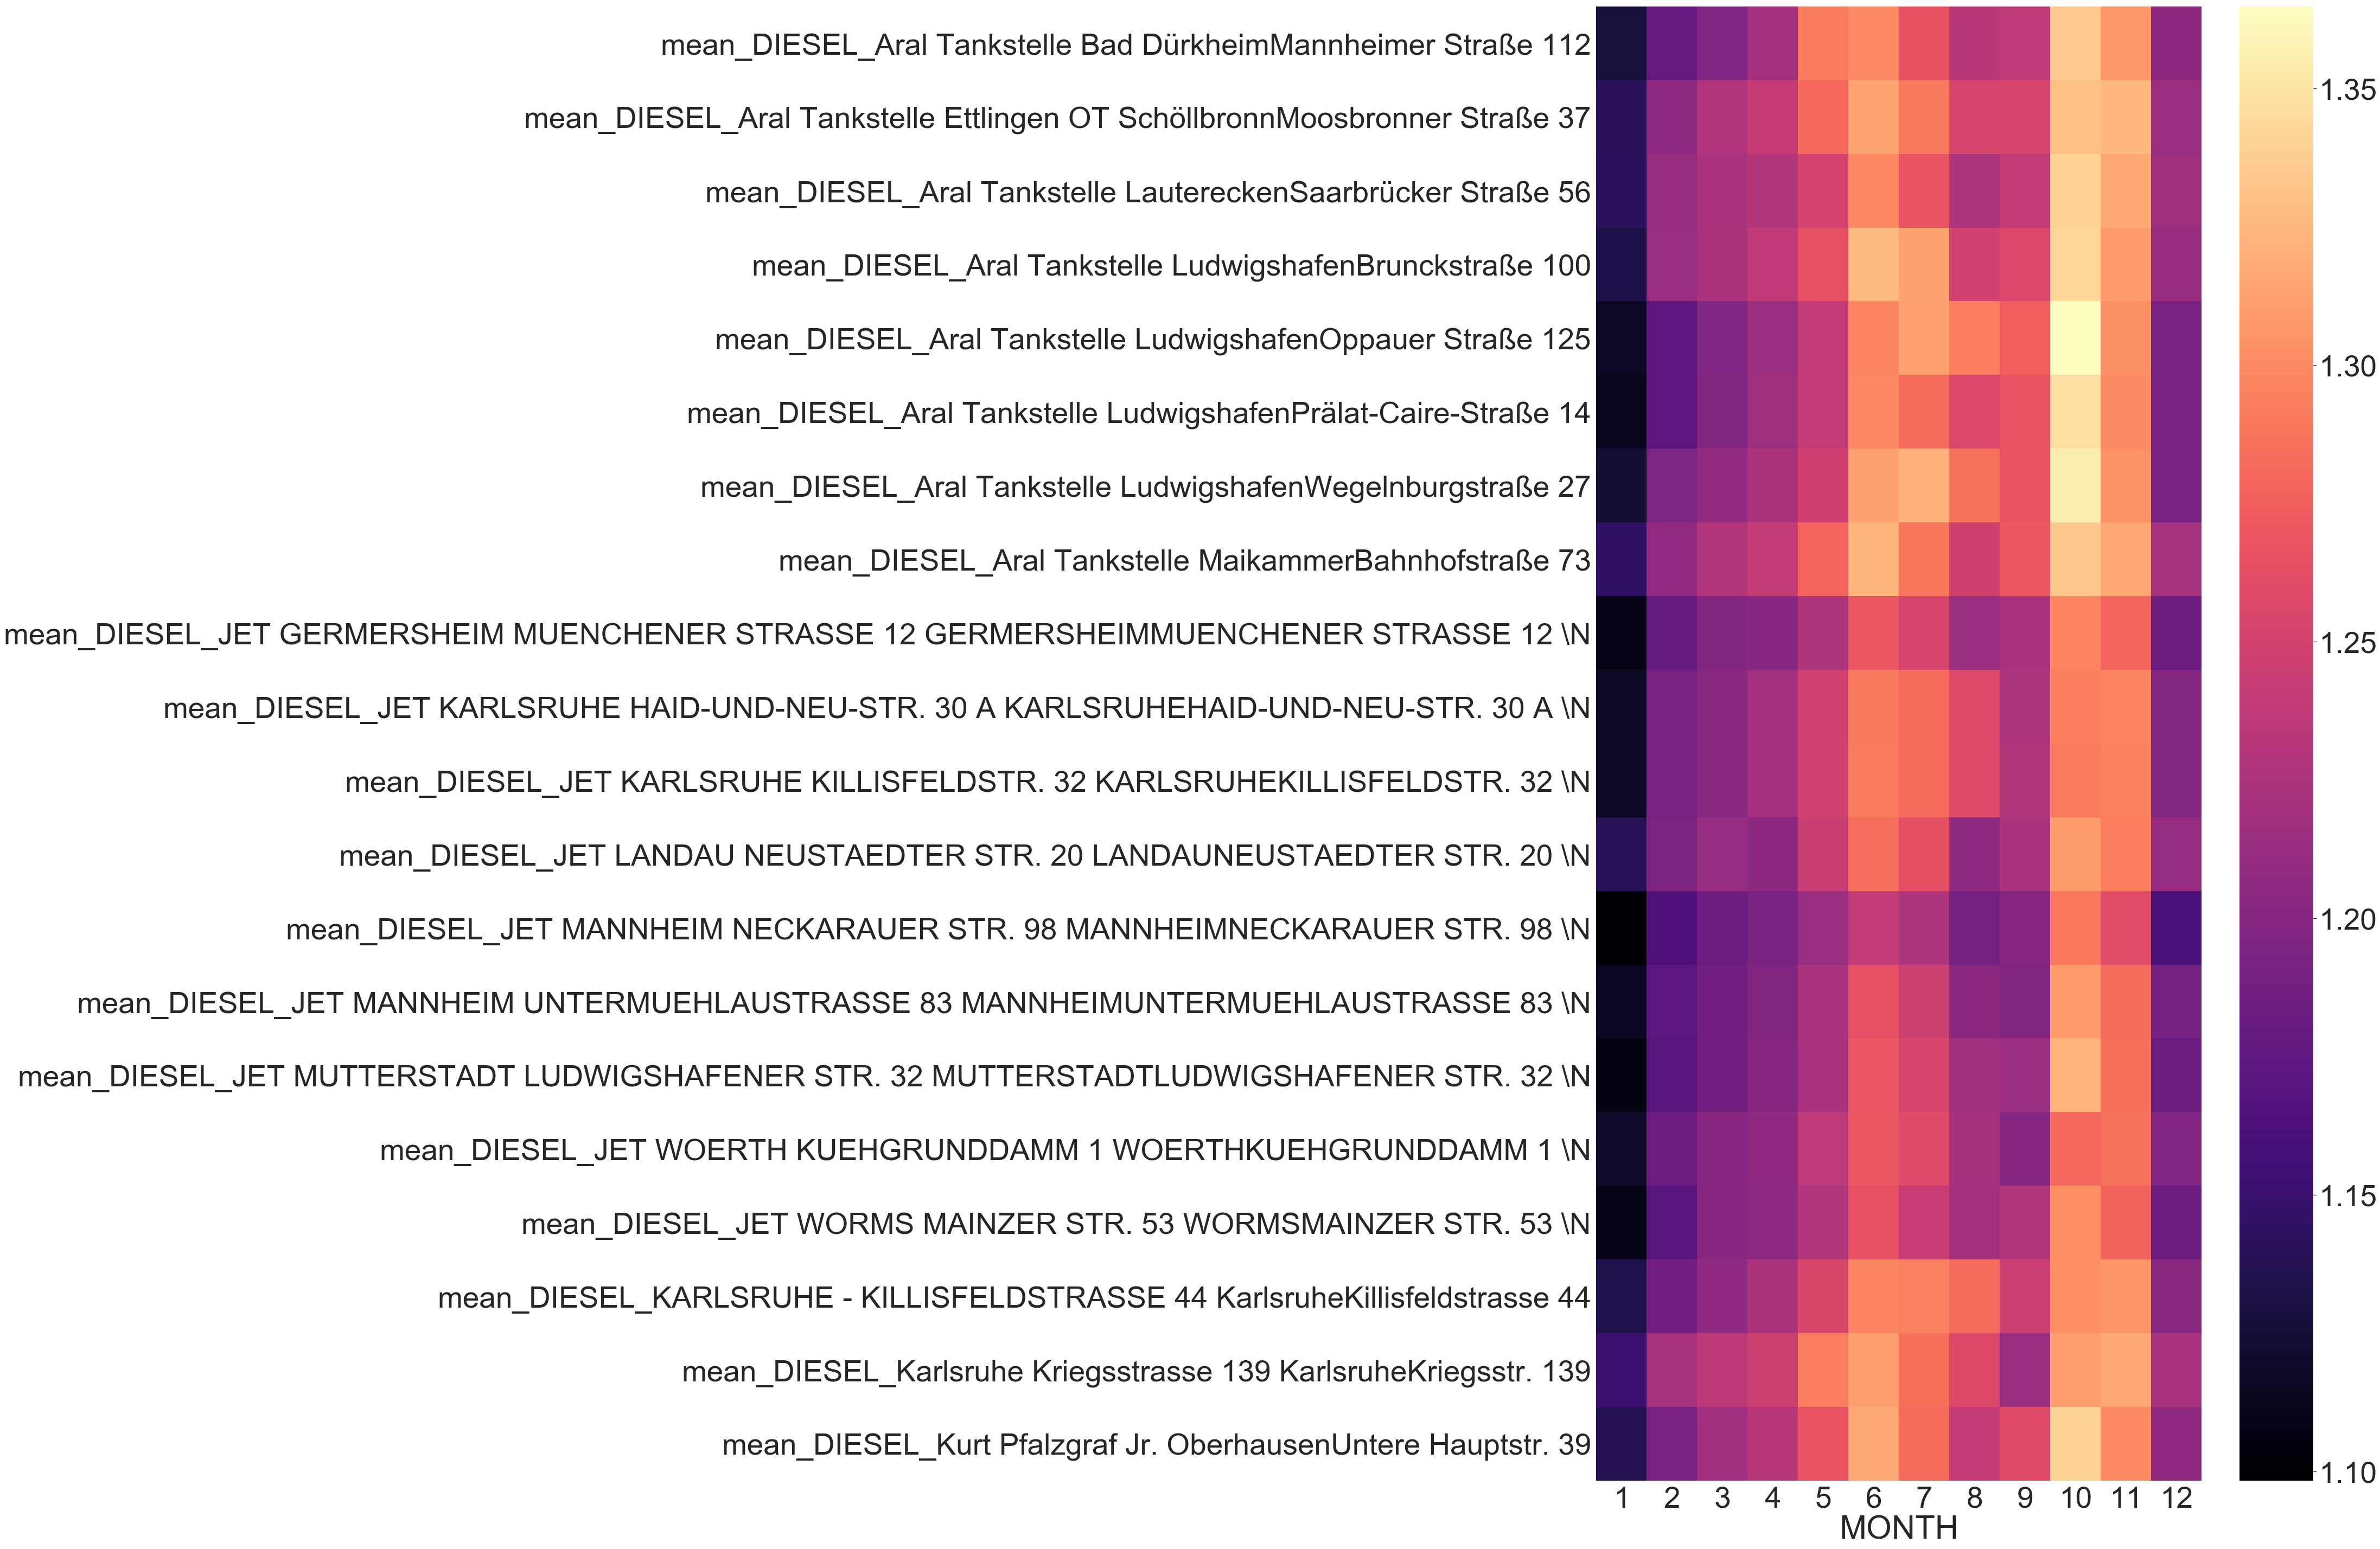

In [72]:
plt.figure(figsize=(25,50))
sns.set(font_scale=5)
heat_map = sns.heatmap(pivot_DIESEL_mon.transpose(),cmap = 'magma')

The same seasonality is observed for the Diesel, but the price for Diesel remains high until november, for the selected stations.

### 10. Describe a possible business potential in € for the customer (textual description in the ipyhton file). Define the constraints of the business case 5 lines, the answer max 15 lines (high level summary)

# Business case development


### Assumptions:

According to all the information extracted from the Data, we will give the following assumptions to be able to develop the business case:

1. The Seasonality of the Work is fixed, therefore, it's not possible to fill tank more or less during the months

2. The Cars can fill the Tanks in any of the stations in the region, since they will probably have been walking in a circular route in order to reduce the waste

3. The cars run from Monday to Friday from 9 to 19 PM

4. The Fleet consists of 1000 Cars that run on Diesel, each of the cars have to fill up their 60L tanks 3 times per week

5. The fuel used by one car doesn't exceed one full tank per day

6. Before, there were no stabilished rules, so we also assume that there were no trends for a definite time, weekday or gas station

From the assumptions and observation of the information graphs, we conclude that the data that relies on monthly data wouldn't be so easily used to generate value. 

The difference based on days of the week has a small difference as well, as long as we forbit the fleet to fill up the tanks in the Weekends, but usually they don't work on weekends, but it could be a further suggestion, for now we decide to work with the hour distribution.

### Hypothesis

The conclusion with the data, would be stabilishing a recommendation that every Fleet Car should fill up the tank every day, between 18 and 19 PM, at the last working hour.


### Calculation of the Benefit


* Total Fuel Consumption per Week = 60Lx3x1000 = 180000 L of Diesel

* Average Price Considering uniform probability distribution over hours: 1,269€

* Expenditure of: <font color=red> __228.240€__   </font> per Week or <font color=red> __11.868.480€__</font> per Year

* Average Price Considering recommendation: 1,185 €

* Expenditure of: 213.300 € per Week

* Weekly Economy: <font color=green> __15.120€__</font>

* Anualized Economy Considering 52 Weeks:<font color=green> __786.240€__</font> 

* Investment required: <font color=green> __000000€__</font> 


### Decision/Recommendation
Determine a rule that every employee should fill up the tank at the end of the working hours. The employee should be encouraged to do so, and the expense management system will also check whether that is happening or not.
    The rule may be attached to some semester bonus the company may have and/or be a personal goal for each employees. 
    



<a id='PART2'></a>

# Exercise 2



### Creating and testing the functions to be used on the Dataset

In [73]:
testdata = [['STA1', 23,1.5,2,0,'2000-01-01'], ['STA2', 23,1.5,2,0,'2000-01-01'],
            ['STA1', 15,1.5,2,0,'2000-01-01'], ['STA3', 15,1.6,3,1,'2000-01-02'],
            ['STA4',16,1.6,3,1,'2000-01-02' ], ['STA1', 8,1.6,3,1,'2000-01-02'], ['STA2', 5,1.7,4,2,'2000-01-03'],
            ['STA3', 2,1.7,4,2,'2000-01-03'], ['STA4', 7,1.7,4,2,'2000-01-03']] 

  
# Create the pandas DataFrame 
test_df = pd.DataFrame(testdata, columns = ['NAME', 'HOUR','E10','DIESEL','E5','DATE']) 
test_df['DATE']= pd.to_datetime(test_df['DATE'])

In [74]:
test_df

NAME  HOUR  E10  DIESEL  E5       DATE
0  STA1    23  1.5       2   0 2000-01-01
1  STA2    23  1.5       2   0 2000-01-01
2  STA1    15  1.5       2   0 2000-01-01
3  STA3    15  1.6       3   1 2000-01-02
4  STA4    16  1.6       3   1 2000-01-02
5  STA1     8  1.6       3   1 2000-01-02
6  STA2     5  1.7       4   2 2000-01-03
7  STA3     2  1.7       4   2 2000-01-03
8  STA4     7  1.7       4   2 2000-01-03

In [75]:
def filter_hours(df,max , min, column):
    data = df[(df[column]<=max) & (df[column] >=min)]
    return data

In [76]:
data_filt =filter_hours(test_df,20,7,'HOUR')
data_filt

NAME  HOUR  E10  DIESEL  E5       DATE
2  STA1    15  1.5       2   0 2000-01-01
3  STA3    15  1.6       3   1 2000-01-02
4  STA4    16  1.6       3   1 2000-01-02
5  STA1     8  1.6       3   1 2000-01-02
8  STA4     7  1.7       4   2 2000-01-03

In [77]:
def normal_data(df,col1,val1,val2,val3):
    pivot_norm = pd.pivot_table(df,index=[col1],values = [val1,val2,val3],aggfunc=[np.mean])
    pivot_norm.columns = ['_'.join(col) for col in pivot_norm.columns]
    return pivot_norm.reset_index()

In [78]:
test_norm = normal_data(test_df,'DATE','E10','DIESEL','E5')



### Exercise requirements


- The entire analysis has to be performed on 100 gas stations
- Choose the 100 gas stations with the longest time history

In [79]:
passed = select_most_complete_data(grouped,100)
data_pred = data[data['NAME'].isin(passed)]

passed = select_most_complete_data(grouped,3)
data_pred_init = data[data['NAME'].isin(passed)]

- Ensure that all stations have all identical time horizon and steps (open and close
     hour identical for all 100 stations, take 7:00 to 20:00). 

In [80]:
data_pred =filter_hours(data_pred,19,7,'HOUR')
data_pred_init =filter_hours(data_pred,19,7,'HOUR')

data_pred_init.head()

STID     E5    E10  DIESEL        DATE_CHANGED                                     NAME BRAND                                    PLACE        LAT       LNG  YEAR  DAY        DATE  WEEK  MONTH  HOUR  WEEKDAY WEEKDAYSTR
4   01bf5a06-4248-43a5-9524-56123fa3ab2f  1.569  1.529   1.359 2014-10-02 09:06:01  Esso Tankstelle WORMSZELLERTALSTR. 30    ESSO  Esso Tankstelle WORMSZELLERTALSTR. 30    49.633409  8.273847  2014  275  2014-10-02    40     10     9        3        WED
6   01bf5a06-4248-43a5-9524-56123fa3ab2f  1.539  1.499   1.339 2014-10-03 12:14:01  Esso Tankstelle WORMSZELLERTALSTR. 30    ESSO  Esso Tankstelle WORMSZELLERTALSTR. 30    49.633409  8.273847  2014  276  2014-10-03    40     10    12        4        THU
8   01bf5a06-4248-43a5-9524-56123fa3ab2f  1.529  1.489   1.329 2014-10-03 14:14:01  Esso Tankstelle WORMSZELLERTALSTR. 30    ESSO  Esso Tankstelle WORMSZELLERTALSTR. 30    49.633409  8.273847  2014  276  2014-10-03    40     10    14        4        THU
14  01bf5a06-4248-43a5-9524-56123fa3ab2f  1.549  1.509   1.379 2014-10-06 07:38:01  Esso Tankstelle WORMSZELLERTALSTR. 30    ESSO  Esso Tankstelle WORMSZELLERTALSTR. 30    49.633409  8.273847  2014  279  2014-10-06    41     10     7        0        SUN
16  01bf5a06-4248-43a5-9524-56123fa3ab2f  1.549  1.509   1.339 2014-10-06 08:26:01  Esso Tankstelle WORMSZELLERTALSTR. 30    ESSO  Esso Tankstelle WORMSZELLERTALSTR. 30    49.633409  8.273847  2014  279  2014-10-06    41     10     8        0        SUN

- Attention for this the data set has to be cleaned and normalized to daily data!

In [81]:
#pivot_norm = pd.pivot_table(data_pred_init,index=['NAME','DATE'],values =['E10','E5','DIESEL'],aggfunc=[np.mean])
#pivot_norm.swaplevel(0,1)
#pivot_norm.swaplevel(1,0)
#pivot_norm.columns = ['_'.join(col) for col in pivot_norm.columns]
#pivot_norm.reset_index()
data_pinorm =normal_data(data_pred_init,'DATE','E10','E5','DIESEL')
data_norm_ini = normal_data(data_pred_init,'DATE','E10','E5','DIESEL')


In [82]:
data_pinorm.set_index('DATE',inplace=True)


In [83]:
data_pinorm

mean_DIESEL  mean_E10   mean_E5
DATE                                       
2014-06-08     1.357630  1.527082  1.567082
2014-06-09     1.395503  1.561025  1.601025
2014-06-10     1.372375  1.538811  1.578874
2014-06-11     1.378215  1.550980  1.590980
2014-06-12     1.381447  1.551628  1.591628
2014-06-13     1.393378  1.566349  1.606349
2014-06-14     1.395784  1.568119  1.608119
2014-06-15     1.421548  1.593968  1.633968
2014-06-16     1.392580  1.564178  1.604237
2014-06-17     1.392325  1.562610  1.602636
2014-06-18     1.393796  1.565348  1.605442
2014-06-19     1.404794  1.574472  1.614476
2014-06-20     1.393907  1.562796  1.602796
2014-06-21     1.393605  1.566349  1.606395
2014-06-22     1.420582  1.587852  1.627852
2014-06-23     1.395773  1.566267  1.606267
2014-06-24     1.389949  1.558919  1.598946
2014-06-25     1.392019  1.561992  1.602102
2014-06-26     1.394325  1.561542  1.601570
2014-06-27     1.388886  1.559202  1.599288
2014-06-28     1.400423  1.573390  1.613390
2014-06-29     1.410600  1.578378  1.618378
2014-06-30     1.388417  1.561331  1.601301
2014-07-01     1.401226  1.572733  1.612733
2014-07-02     1.388713  1.564072  1.604072
2014-07-03     1.381059  1.558029  1.598029
2014-07-04     1.381303  1.558572  1.598638
2014-07-05     1.385908  1.562373  1.602373
2014-07-06     1.400542  1.576761  1.616761
2014-07-07     1.368531  1.551669  1.591815
2014-07-08     1.374928  1.557274  1.597339
2014-07-09     1.369428  1.553465  1.593373
2014-07-10     1.377917  1.562758  1.602822
2014-07-11     1.369635  1.550409  1.590215
2014-07-12     1.374000  1.556614  1.596614
2014-07-13     1.389604  1.569268  1.609268
2014-07-14     1.376575  1.556687  1.596687
2014-07-15     1.366492  1.543241  1.583303
2014-07-16     1.384983  1.560965  1.600965
2014-07-17     1.364484  1.540202  1.580202
2014-07-18     1.366522  1.536227  1.576227
2014-07-19     1.372679  1.540212  1.580212
2014-07-20     1.403773  1.569455  1.609455
2014-07-21     1.364645  1.534097  1.574097
2014-07-22     1.375774  1.544032  1.583935
2014-07-23     1.355154  1.519035  1.559070
2014-07-24     1.370561  1.538734  1.579033
2014-07-25     1.381508  1.548016  1.587984
2014-07-26     1.382033  1.548180  1.588139
2014-07-27     1.407878  1.574918  1.614918
2014-07-28     1.388683  1.554333  1.594492
2014-07-29     1.380637  1.543386  1.583444
2014-07-30     1.378581  1.537563  1.577593
2014-07-31     1.379230  1.537362  1.577420
2014-08-01     1.381077  1.538288  1.578050
2014-08-02     1.396435  1.549783  1.589783
2014-08-03     1.412889  1.567657  1.607657
2014-08-04     1.383428  1.537012  1.577012
2014-08-05     1.349948  1.505398  1.545374
2014-08-06     1.351766  1.504910  1.544887
2014-08-07     1.345850  1.497590  1.538185
2014-08-08     1.343174  1.495761  1.535783
2014-08-09     1.351694  1.503194  1.543194
2014-08-10     1.363286  1.514022  1.553983
2014-08-11     1.363342  1.509069  1.548630
2014-08-12     1.353586  1.501411  1.541506
2014-08-13     1.348322  1.494214  1.534516
2014-08-14     1.349341  1.499463  1.539512
2014-08-15     1.346088  1.496041  1.536041
2014-08-16     1.349409  1.497392  1.537610
2014-08-17     1.360265  1.500429  1.540551
2014-08-18     1.345417  1.485253  1.525230
2014-08-19     1.344011  1.494711  1.534711
2014-08-20     1.338089  1.487018  1.526927
2014-08-21     1.341403  1.493057  1.533031
2014-08-22     1.346388  1.501232  1.541321
2014-08-23     1.344556  1.501028  1.540944
2014-08-24     1.357305  1.515229  1.555229
2014-08-25     1.345332  1.502362  1.542428
2014-08-26     1.344553  1.502210  1.542297
2014-08-27     1.347780  1.509218  1.549327
2014-08-28     1.351864  1.510383  1.550383
2014-08-29     1.348234  1.506342  1.546342
2014-08-30     1.351197  1.508967  1.549033
2014-08-31     1.353862  1.516862  1.556862
2014-09-01     1.352793  1.508264  1.547483
2014-09-02     1.345502  1.503120  1.542069
2014-09-03     1.344496  1.503773  1.542740
2014-09-04     1.345826  1.501580  1.540553
2014-09-

## Step 1: start with small (3 stations) data set and develop a simple reference model
- Extract a small good data set you can start with
-  Start with a trivial model (reference model), use a simple moving averagr

In [84]:
def rolling_fcast(weeks):
    data_pinorm['E10 Fcast']=data_pinorm.mean_E10.rolling(weeks*7).mean()
    data_pinorm['E5 Fcast']=data_pinorm.mean_E5.rolling(weeks*7).mean()
    data_pinorm['DIESEL Fcast']=data_pinorm.mean_DIESEL.rolling(weeks*7).mean()

In [85]:
forecast_time =1
rolling_fcast(forecast_time)

In [86]:
def time_serie_plot(data,col1,col2):
    df=data[[col1,col2]]
    df.plot(figsize=(20,10),fontsize=20,linestyle='-', linewidth=2)
    plt.legend(loc='upper right',fontsize = 20)
    plt.title(col2+'From 2014-07 to 2015-09 ,'+str(forecast_time)+' week(s) forecast',fontsize =30)
    plt.xlabel('Time',fontsize=30)
    plt.show()

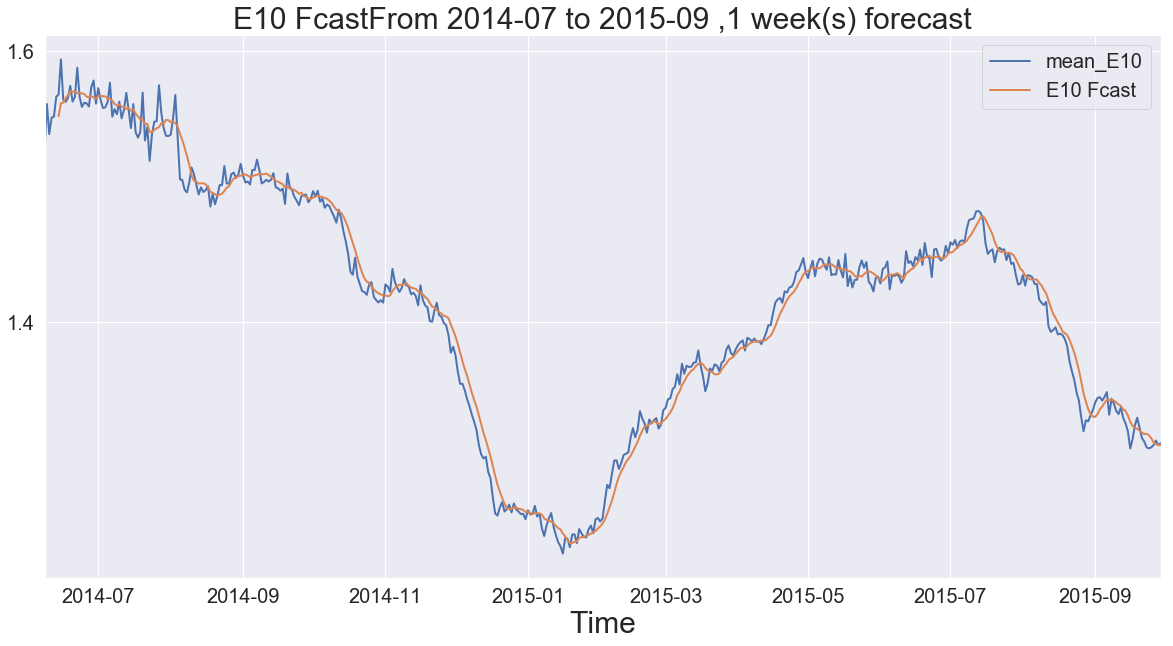

In [87]:
time_serie_plot(data_pinorm,'mean_E10','E10 Fcast')

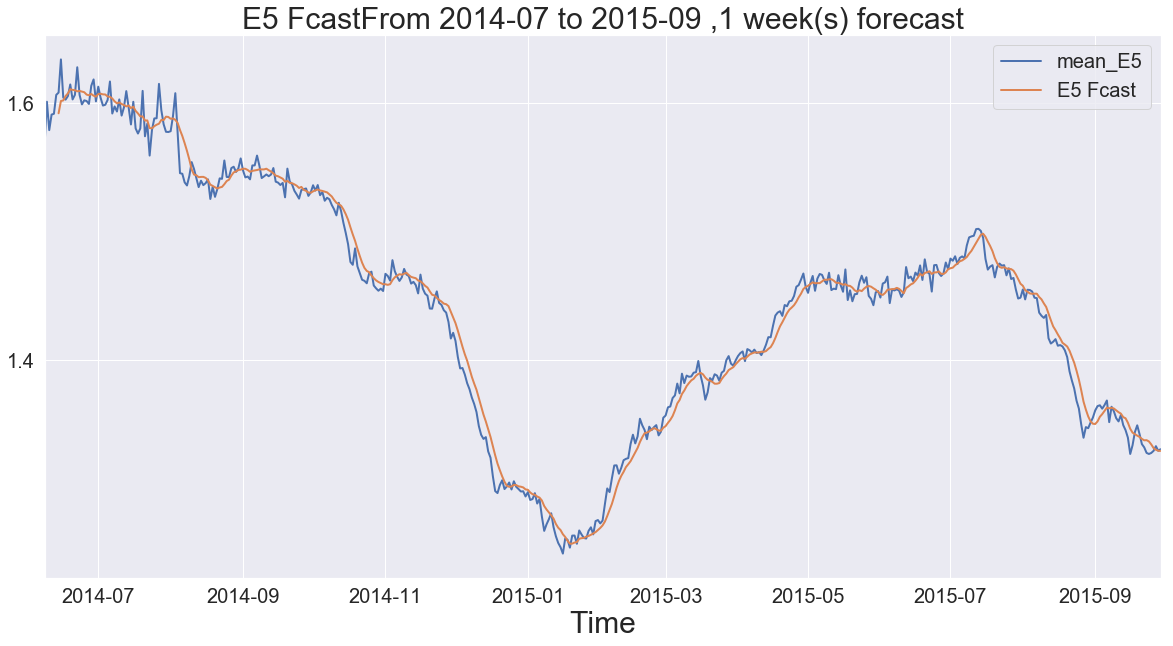

In [88]:
time_serie_plot(data_pinorm,'mean_E5','E5 Fcast')

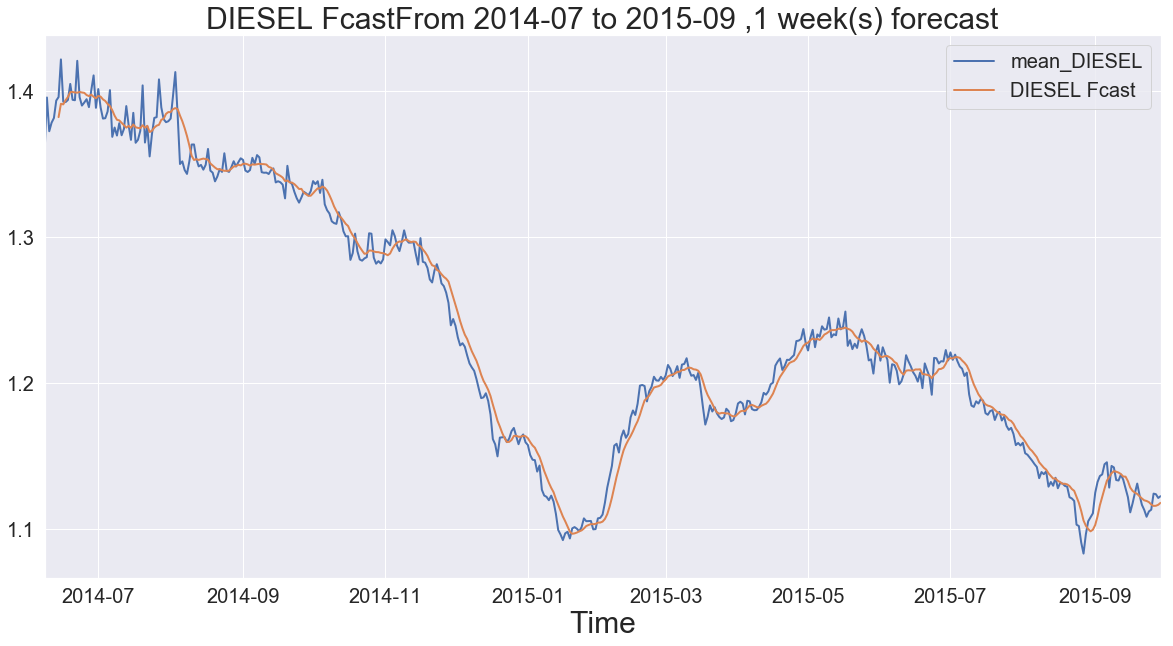

In [89]:
time_serie_plot(data_pinorm,'mean_DIESEL','DIESEL Fcast')

For a short horizon, moving average may perform for prediction with a not so high error.

In [90]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARMA


In [91]:
X=data_norm_ini['DATE']
y=data_norm_ini['mean_E10']


In [92]:
def extrapolate_MA(data, window, fc, col): 
    predictions = []
    colum =data[col].iloc[range(window,lendata[col]+fc)]
    
   
    

In [176]:
#in this section i've changed some of the prophet plot functions in order to adjust figure, font sizes and other plot details
def plot_components(
    m, fcst, uncertainty=True, plot_cap=True, weekly_start=0, yearly_start=0,
    figsize=None
):

    # Identify components to be plotted
    components = ['trend']
    if m.train_holiday_names is not None and 'holidays' in fcst:
        components.append('holidays')
    # Plot weekly seasonality, if present
    if 'weekly' in m.seasonalities and 'weekly' in fcst:
        components.append('weekly')
    # Yearly if present
    if 'yearly' in m.seasonalities and 'yearly' in fcst:
        components.append('yearly')
    # Other seasonalities
    components.extend([
        name for name in sorted(m.seasonalities)
        if name in fcst and name not in ['weekly', 'yearly']
    ])
    regressors = {'additive': False, 'multiplicative': False}
    for name, props in m.extra_regressors.items():
        regressors[props['mode']] = True
    for mode in ['additive', 'multiplicative']:
        if regressors[mode] and 'extra_regressors_{}'.format(mode) in fcst:
            components.append('extra_regressors_{}'.format(mode))
    npanel = len(components)

    figsize = figsize if figsize else (9, 18)
    fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
    for ax in axes:
        ax.tick_params(axis='both', which='major', labelsize=10)
  
    if npanel == 1:
        axes = [axes]

    multiplicative_axes = []
    for ax, plot_name in zip(axes, components):
        plt.xticks(fontsize=14, rotation=90)
        if plot_name == 'trend':
            plot_forecast_component(
                m=m, fcst=fcst, name='trend', ax=ax, uncertainty=uncertainty,
                plot_cap=plot_cap,
            )
        elif plot_name in m.seasonalities:
            if plot_name == 'weekly' or m.seasonalities[plot_name]['period'] == 7:
                    plot_weekly(
                    m=m, name=plot_name, ax=ax, uncertainty=uncertainty, weekly_start=weekly_start
                )
            elif plot_name == 'yearly' or m.seasonalities[plot_name]['period'] == 365.25:
                plot_yearly(
                    m=m, name=plot_name, ax=ax, uncertainty=uncertainty, yearly_start=yearly_start
                )
            else:
                plot_seasonality(
                    m=m, name=plot_name, ax=ax, uncertainty=uncertainty,
                )
        elif plot_name in [
            'holidays',
            'extra_regressors_additive',
            'extra_regressors_multiplicative',
        ]:
            plot_forecast_component(
                m=m, fcst=fcst, name=plot_name, ax=ax, uncertainty=uncertainty,
                plot_cap=False,
            )
        if plot_name in m.component_modes['multiplicative']:
            multiplicative_axes.append(ax)

    fig.tight_layout()
    # Reset multiplicative axes labels after tight_layout adjustment
    for ax in multiplicative_axes:
        ax = set_y_as_percent(ax)
    return fig


def plot_cross_validation_metric(
    df_cv, metric, rolling_window=0.1, ax=None, figsize=(10, 6)
):
  
    
    if ax is None:
        fig = plt.figure(facecolor='w', figsize=figsize)
        ax = fig.add_subplot(111)
        ax.tick_params(axis='both', which='major', labelsize=10)
    else:
        fig = ax.get_figure()
    # Get the metric at the level of individual predictions, and with the rolling window.
    df_none = performance_metrics(df_cv, metrics=[metric], rolling_window=-1)
    df_h = performance_metrics(df_cv, metrics=[metric], rolling_window=rolling_window)

    # Some work because matplotlib does not handle timedelta
    # Target ~10 ticks.
    tick_w = max(df_none['horizon'].astype('timedelta64[ns]')) / 10.
    # Find the largest time resolution that has <1 unit per bin.
    dts = ['D', 'h', 'm', 's', 'ms', 'us', 'ns']
    dt_names = [
        'days', 'hours', 'minutes', 'seconds', 'milliseconds', 'microseconds',
        'nanoseconds'
    ]
    dt_conversions = [
        24 * 60 * 60 * 10 ** 9,
        60 * 60 * 10 ** 9,
        60 * 10 ** 9,
        10 ** 9,
        10 ** 6,
        10 ** 3,
        1.,
    ]
    for i, dt in enumerate(dts):
        if np.timedelta64(1, dt) < np.timedelta64(tick_w, 'ns'):
            break

    x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
    x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])

    ax.plot(x_plt, df_none[metric], '.', alpha=0.5, c='gray')
    ax.plot(x_plt_h, df_h[metric], '-', c='b')
    ax.grid(True)

    ax.set_xlabel('Horizon ({})'.format(dt_names[i]))
    ax.set_ylabel(metric)
    return fig

In [95]:
#defining function to predict using Moving average
def MA_prediction(data_t,col,window,forecast):
    sizel=len(data_t[col])
    col = data_t[col]
    for i in range(sizel-window,sizel-window+forecast):
        sum_value=0
        for j in range(0,window):
    
            sum_value += col.iloc[(i+j)]
        
        next_value=sum_value/window
        next_v = pd.Series(next_value)
        soma =1
        next_v.index =[(col.index[i+j] + soma)]
        col = col.append(next_v,verify_integrity=True)
     
    return col    



In [96]:
#function for MAPE calculation
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Use	the	Time	Series	Cross	Validation	(TimeSeriesSplitt)	of	scikit-learn
### Check	and	visualize	the	results
### Use	an	appropriate	metric	for	the	forecast	error: mean	absolute	deviation (MAD)	and	mean	absolute	percentage	error (MAPE)
### Do	a	visualization	of	the	predicted	output (time	series)

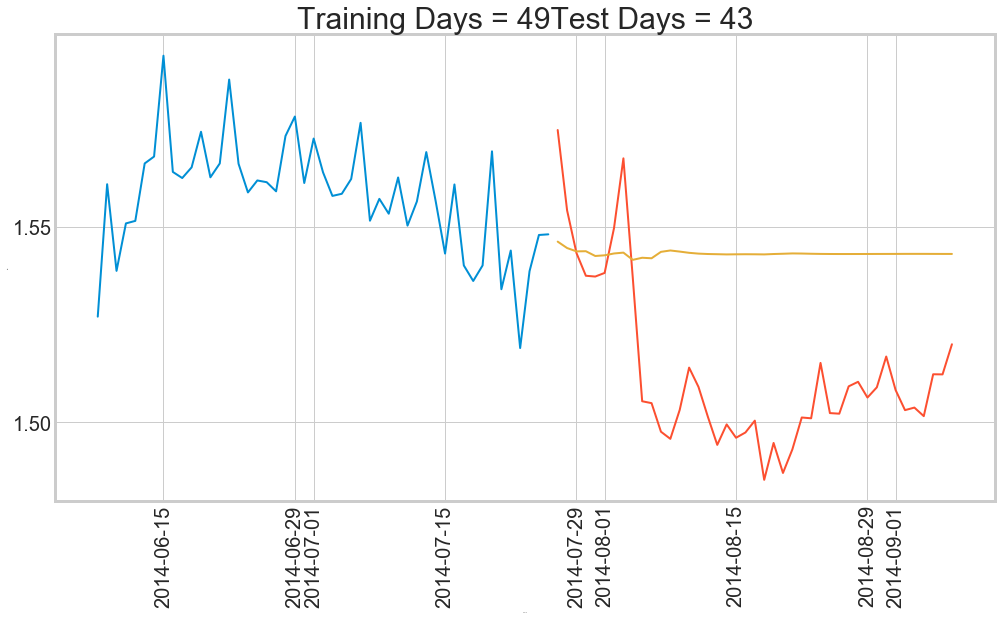

Number of Splits =  10 Train time =  436  Time Prediction =  43 days MAPE: 5.184605750520985
Time Prediction=  43 days. Average MAPE: 3.206335130150768


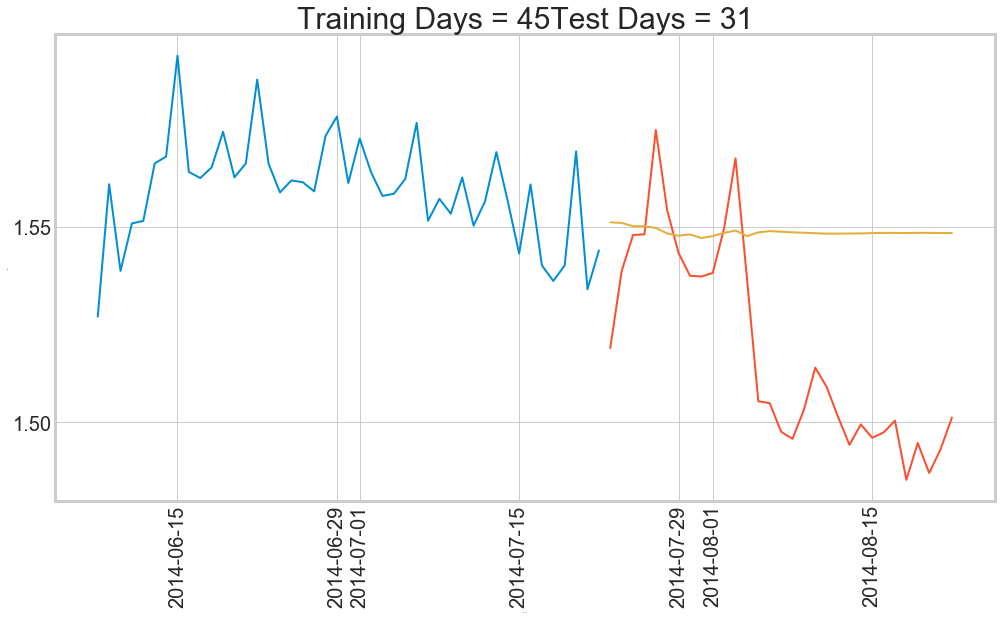

Number of Splits =  14 Train time =  448  Time Prediction =  31 days MAPE: 1.5998578387855753
Time Prediction=  31 days. Average MAPE: 2.2359400886436127


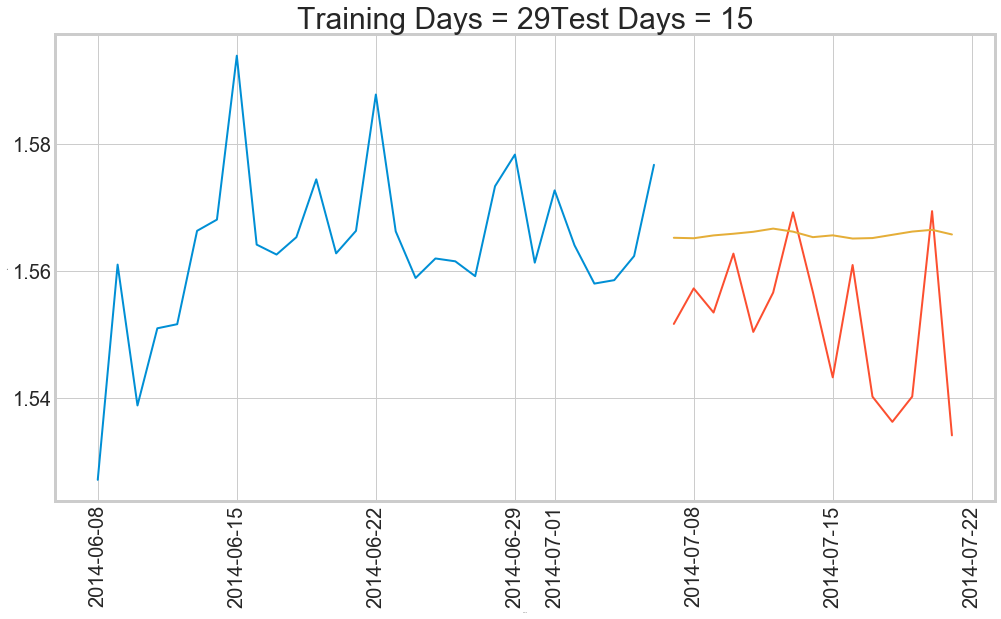

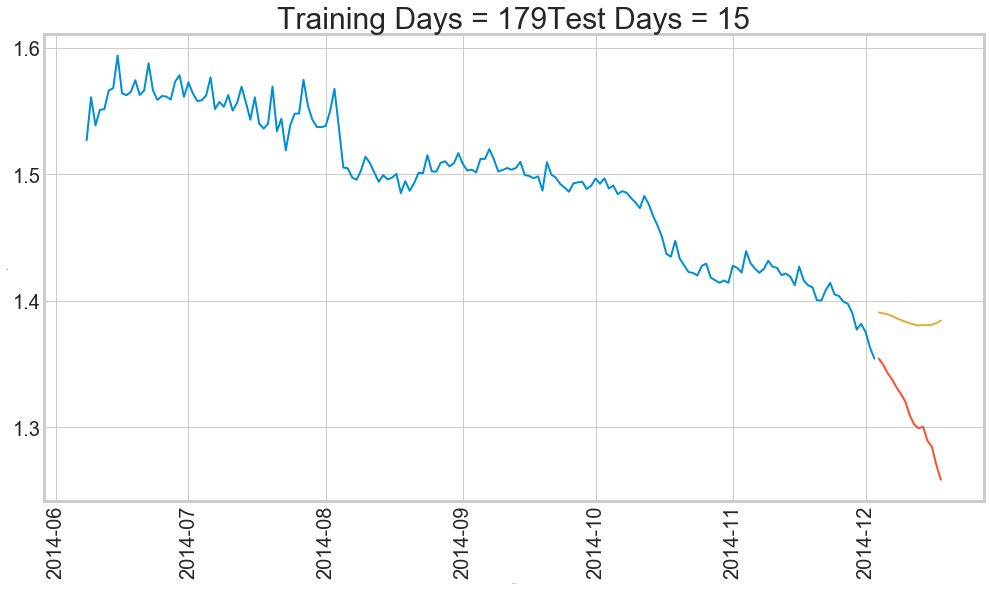

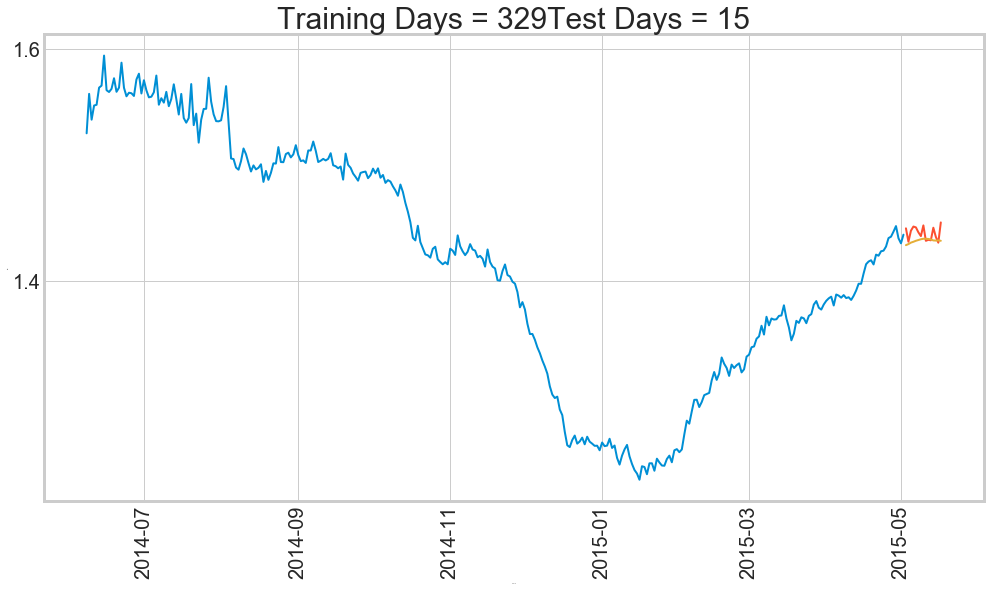

Number of Splits =  30 Train time =  464  Time Prediction =  15 days MAPE: 1.7287579895726983
Time Prediction=  15 days. Average MAPE: 1.6161083102632836


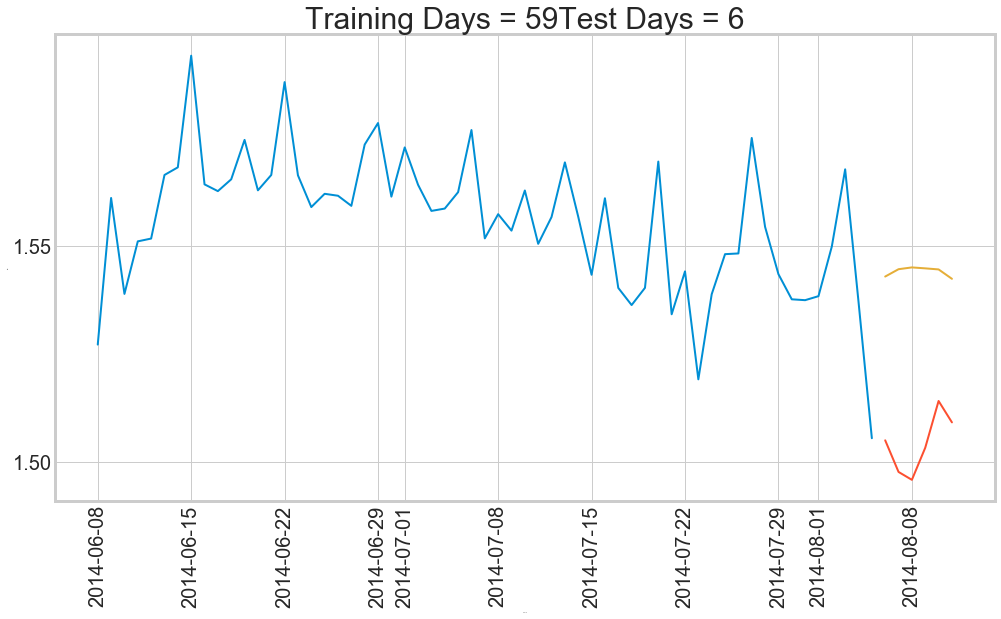

Number of Splits =  70 Train time =  473  Time Prediction =  6 days MAPE: 0.7984664844556779
Time Prediction=  6 days. Average MAPE: 1.2208042926486118


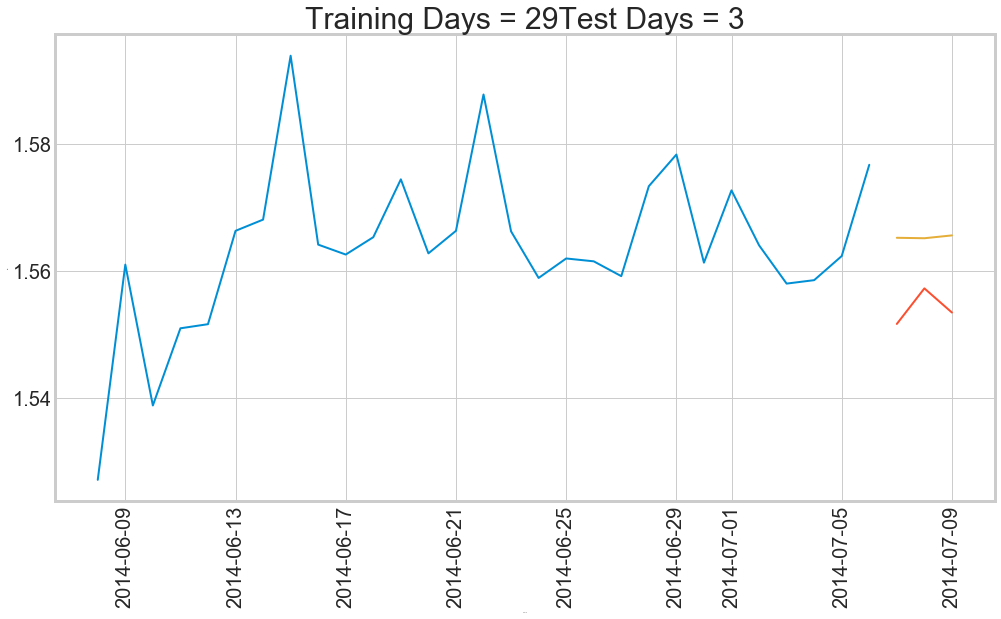

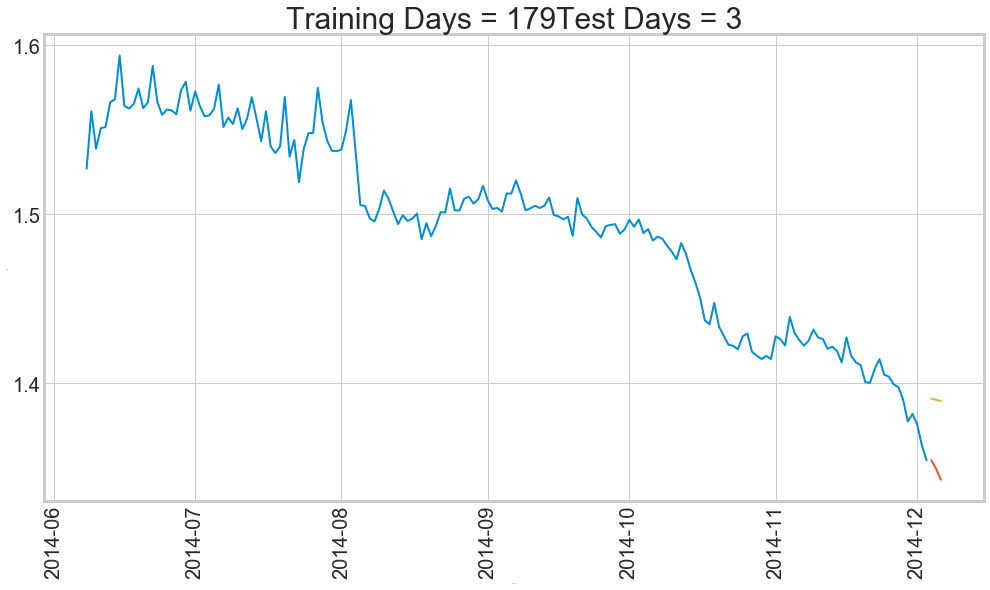

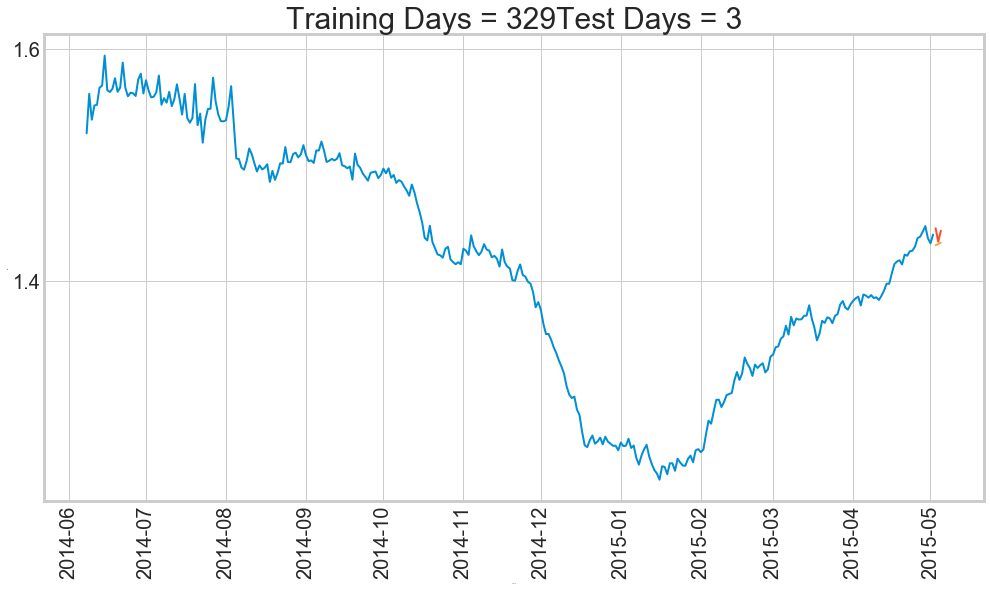

Number of Splits =  150 Train time =  476  Time Prediction =  3 days MAPE: 0.35050804190941226
Time Prediction=  3 days. Average MAPE: 1.0896650379961756


In [186]:
#TEST MOVING AVERAGE WINDOW = 14
sns.set_style("whitegrid")
window=14
graph_data = []
splits = [10,14,30,70,150]
for i in splits:
    tss = TimeSeriesSplit(n_splits = i)
    mape = []
    j =0
    #time prediction, MAX MAPE, Average MAPE and min, MAPE


    for train_index, test_index in tss.split(data_norm_ini):
        
        X_train, X_test = data_norm_ini.DATE[train_index], data_norm_ini.DATE[test_index]
    
        y_train, y_test = data_norm_ini.mean_E10[train_index], data_norm_ini.mean_E10[test_index]
        #ARMA MODEL ORDER 0, MOVING AVERAGE WINDOW =2
       # arma = ARMA(y_train, order = (0,0,10)).fit() 
       # predictions = arma.predict(y_test.index.values[0], y_test.index.values[-1])
        
        pred=MA_prediction(data_norm_ini.iloc[train_index],'mean_E10',window,len(y_test))
        
        predictions = pred.iloc[test_index]
    
        true_values = y_test.values
        mape.append(mean_absolute_percentage_error(true_values, predictions))
        predictions.reindex(X_test)
       
    
        
        if (j%(i/3)==0):
            fig = plt.figure(figsize=(15,8))
            ax = fig.add_subplot(1, 1, 1)
            ax.plot(X_train, y_train,linewidth=2)
            ax.plot(X_test, y_test,linewidth=2)
            ax.plot(X_test, predictions,linewidth=2)
            ax.set_xlabel('Time (s)')
            ax.set_ylabel('Date')
            ax.yaxis.label.set_size(1)
            ax.xaxis.label.set_size(1)
            plt.xticks(rotation='vertical',fontsize=20)
            plt.yticks(fontsize=20)
            plt.title("Training Days = "+ str(len(y_train))+"Test Days = "+ str(len(y_test)),fontsize=30)
            plt.show()
        j=j+1   
    print("Number of Splits = ",i,"Train time = ",len(y_train),
              " Time Prediction = ",len(y_test),"days",
              "MAPE: {}".format(mape[len(mape)-1]))
    print("Time Prediction= ",len(y_test),"days. Average MAPE: {}".format(np.mean(mape)))
   
    
  


    
    graph_data.append([len(y_test),np.mean(mape),np.std(mape)])

    predictions

In [187]:
datagraph= pd.DataFrame(graph_data)

In [188]:
datagraph.columns = ['Forecast Days','Mean MAPE','MAPE Std.']

In [189]:
datagraph.set_index('Forecast Days',inplace=True)


In [190]:
datagraph

Mean MAPE  MAPE Std.
Forecast Days                      
43              3.206335   2.154381
31              2.235940   1.597573
15              1.616108   1.230225
6               1.220804   0.974860
3               1.089665   0.881765

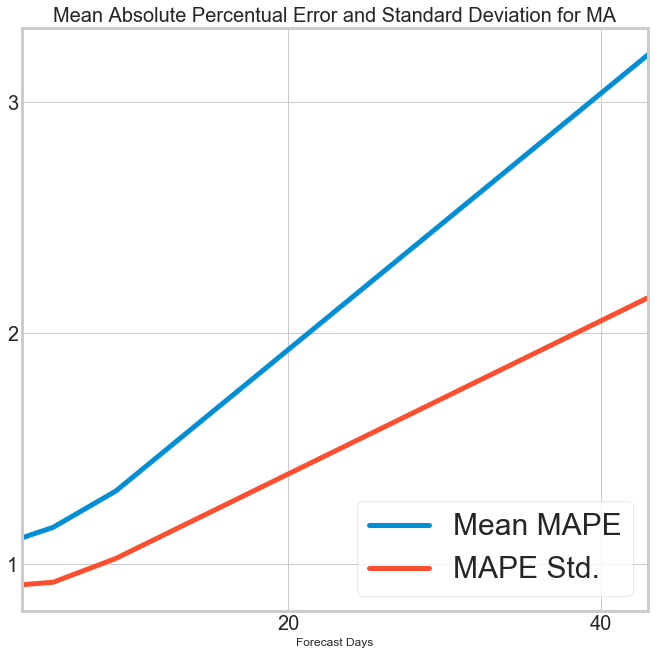

In [185]:
sns.set_style("whitegrid")
datagraph.plot(figsize=(10,10),fontsize=20,linestyle='-', linewidth=5)   
plt.legend(loc='lower right',fontsize = 30)
plt.title("Mean Absolute Percentual Error and Standard Deviation for MA",fontsize=20)
plt.show()

It can be observed that, for the horizons between 3 to 31, as shown in the graph, we have a MAPE that goes from 1.08% to 2.23% in a simple moving average prediction. 

# Step	2:	go	with	a	more	complicated	model	
### Use	a	more	elaborated	time	series	modeling.
### Use	the	Facebook	Prophet	package

In [150]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [104]:
data_norm = normal_data(data_pred_init,'DATE','E10','E5','DIESEL')
data_norm = data_norm.rename(columns={'DATE': 'ds',
                        'mean_E10': 'E10','mean_E5':'E5','mean_DIESEL':'DIESEL'})
data_norm.head()



ds    DIESEL       E10        E5
0  2014-06-08  1.357630  1.527082  1.567082
1  2014-06-09  1.395503  1.561025  1.601025
2  2014-06-10  1.372375  1.538811  1.578874
3  2014-06-11  1.378215  1.550980  1.590980
4  2014-06-12  1.381447  1.551628  1.591628

C:\Users\Nielson\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


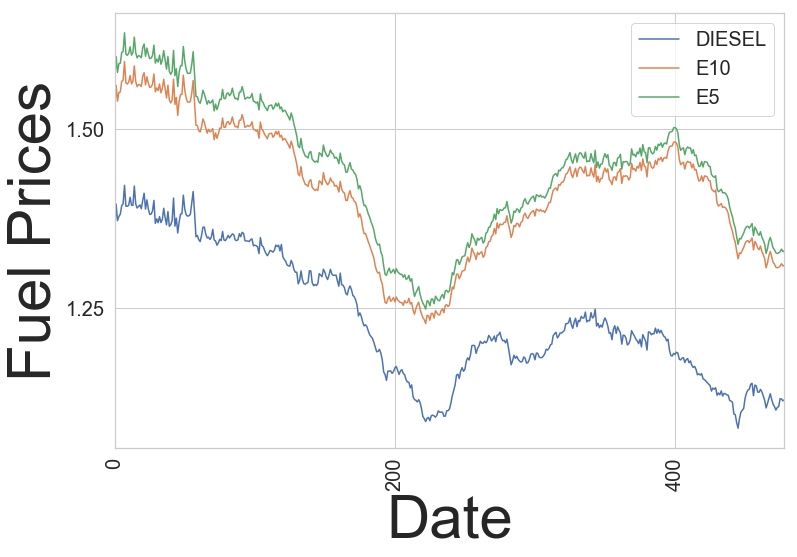

In [105]:
ax = data_norm.plot(figsize=(12, 8))
ax.set_ylabel('Fuel Prices')
ax.set_xlabel('Date')
ax.legend(fontsize=20)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Date')
ax.yaxis.label.set_size(1)
ax.xaxis.label.set_size(1)
plt.xticks(rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [106]:
#First: prediction of E10 pries
data_normE5 = data_norm.rename(columns={'E5':'y'})
data_normD = data_norm.rename(columns={'DIESEL':'y'})
data_normE10 = data_norm.rename(columns={'E10':'y'})

data_normE10.drop(columns = ['E5','DIESEL'], inplace = True)
data_normE5.drop(columns = ['E10','DIESEL'], inplace = True)
data_normD.drop(columns = ['E5','E10'], inplace = True)


In [130]:
data_normE10.head()

ds         y
0  2014-06-08  1.527082
1  2014-06-09  1.561025
2  2014-06-10  1.538811
3  2014-06-11  1.550980
4  2014-06-12  1.551628

In [108]:
data_normE5.head()

ds         y
0  2014-06-08  1.567082
1  2014-06-09  1.601025
2  2014-06-10  1.578874
3  2014-06-11  1.590980
4  2014-06-12  1.591628

In [131]:
data_normD.head()

ds         y
0  2014-06-08  1.357630
1  2014-06-09  1.395503
2  2014-06-10  1.372375
3  2014-06-11  1.378215
4  2014-06-12  1.381447

In [110]:
my_modelE10 = Prophet(yearly_seasonality=20,interval_width=0.95).fit(data_normE10)
#creation of model for E10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Nielson\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [111]:
future_datesE10 = my_modelE10.make_future_dataframe(periods=365)

future_datesE10.tail()

ds
839 2016-09-24
840 2016-09-25
841 2016-09-26
842 2016-09-27
843 2016-09-28

In [112]:
forecastE10 = my_modelE10.predict(future_datesE10)


forecastE10[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds      yhat  yhat_lower  yhat_upper
0 2014-06-08  1.558386    1.543769    1.573312
1 2014-06-09  1.552688    1.538802    1.568332
2 2014-06-10  1.554099    1.540207    1.567422
3 2014-06-11  1.554586    1.540641    1.568525
4 2014-06-12  1.555703    1.542122    1.568545

In [114]:
forecastE10[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
839 2016-09-24  1.110181    0.560497    1.683635
840 2016-09-25  1.114656    0.562477    1.691286
841 2016-09-26  1.107667    0.554109    1.685134
842 2016-09-27  1.107333    0.550405    1.696380
843 2016-09-28  1.105682    0.546259    1.696076

(array([0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8]),
 <a list of 8 Text yticklabel objects>)

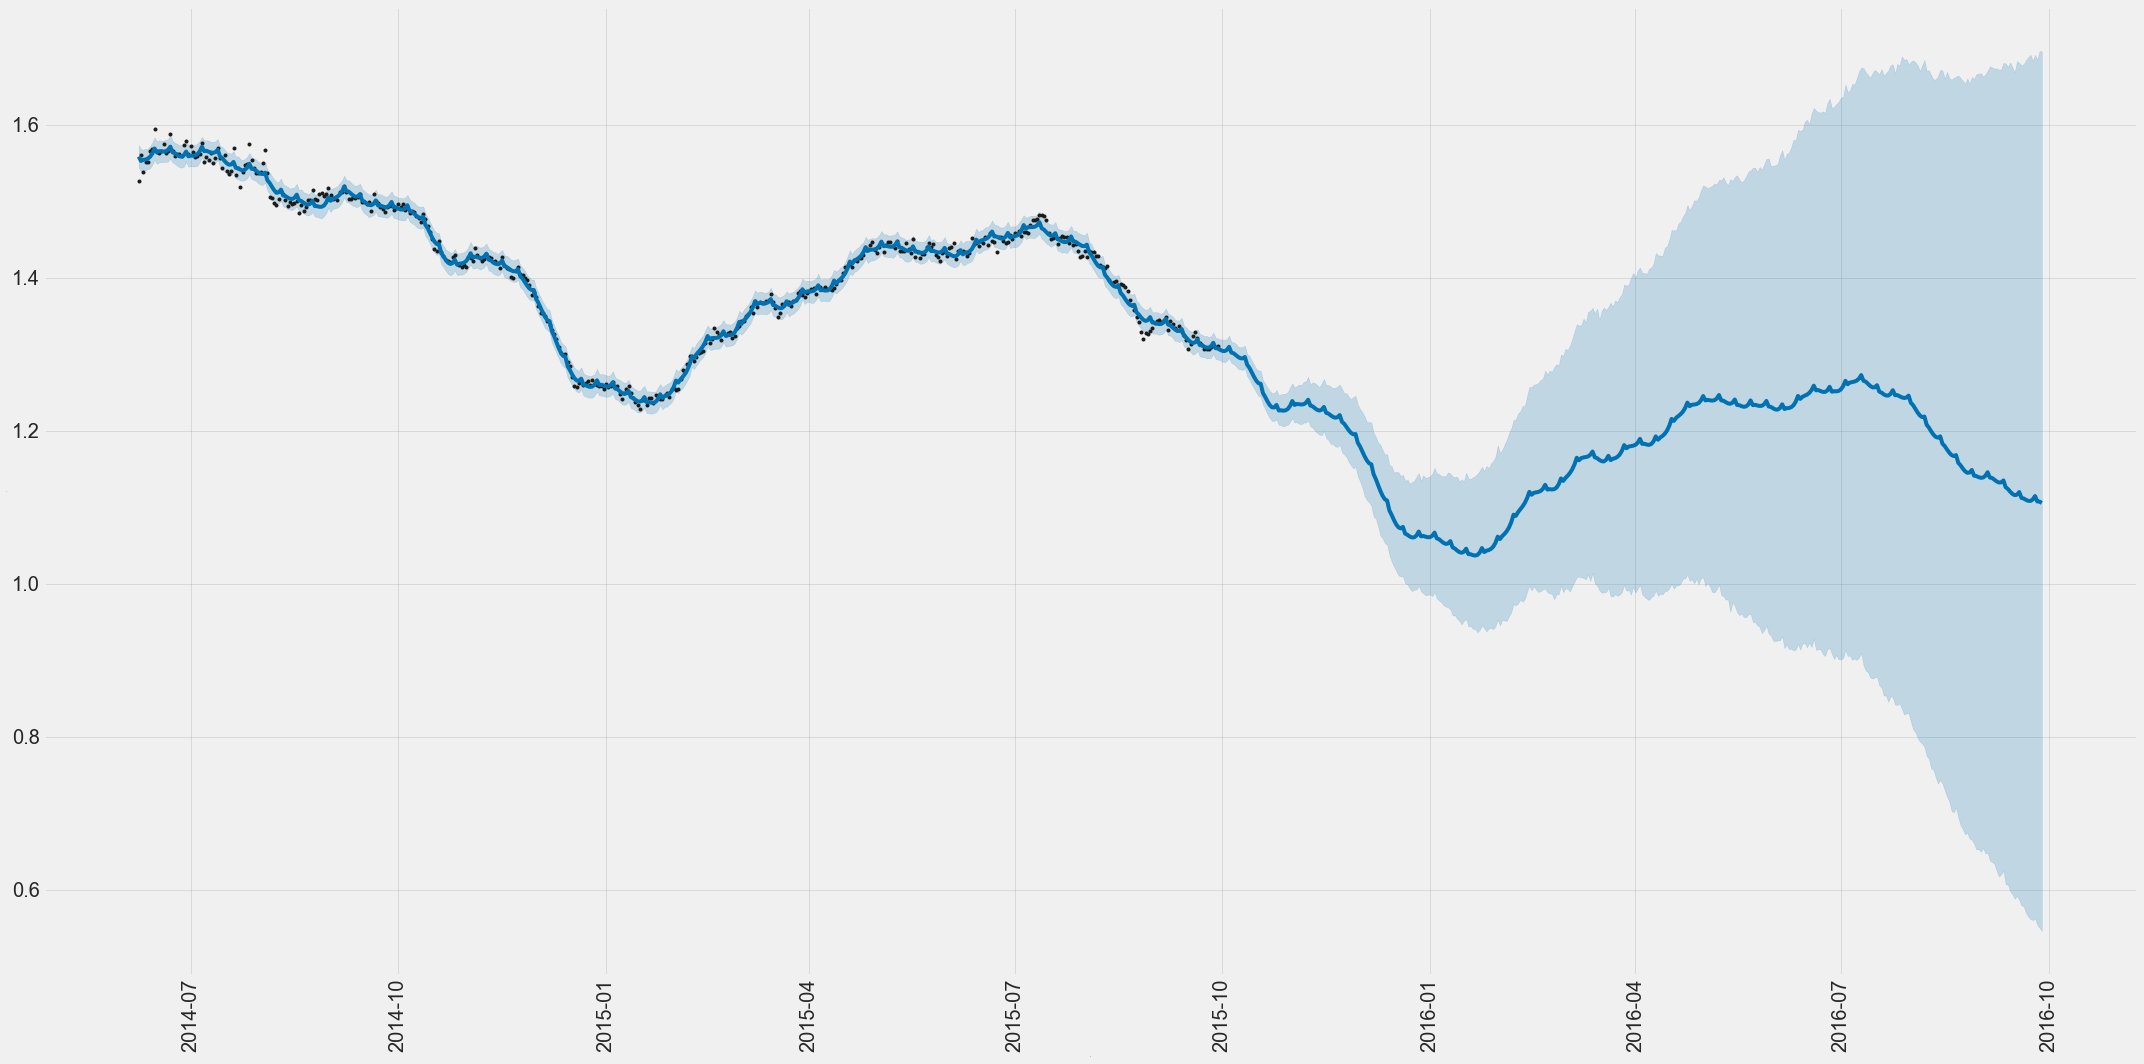

In [115]:
fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.yaxis.label.set_size(1)
ax.xaxis.label.set_size(1)
plt.xticks(rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
my_modelE10.plot(forecastE10,ax=ax,uncertainty=True)
plt.xticks(rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
#visualization of model for E10


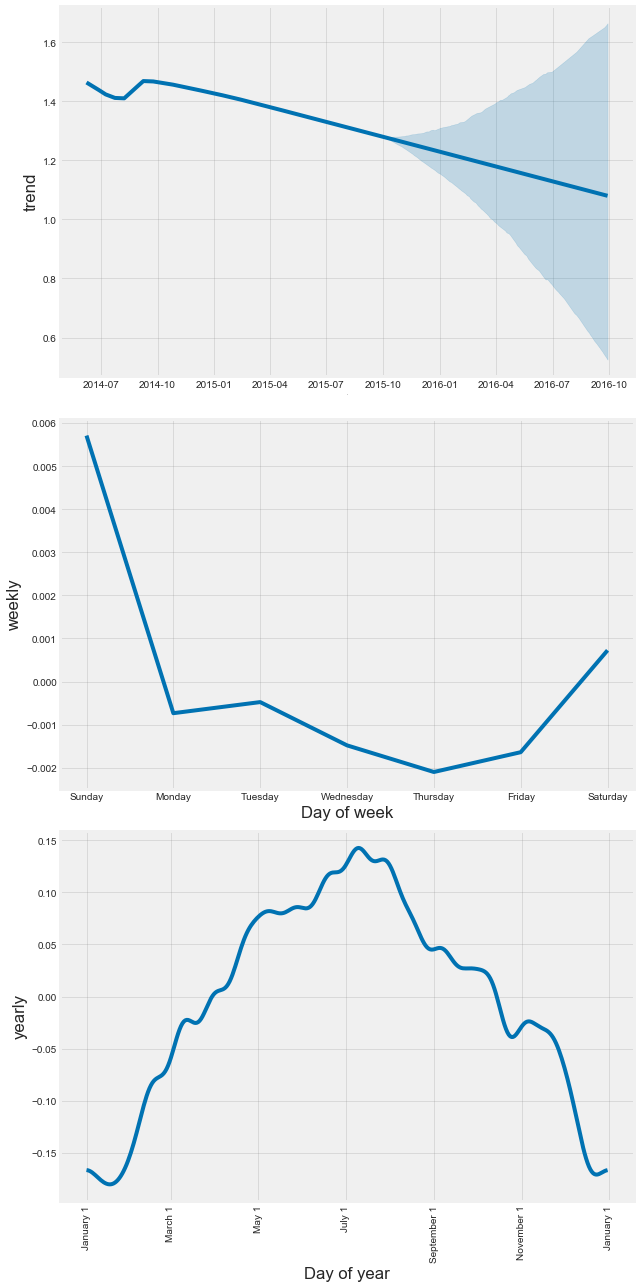

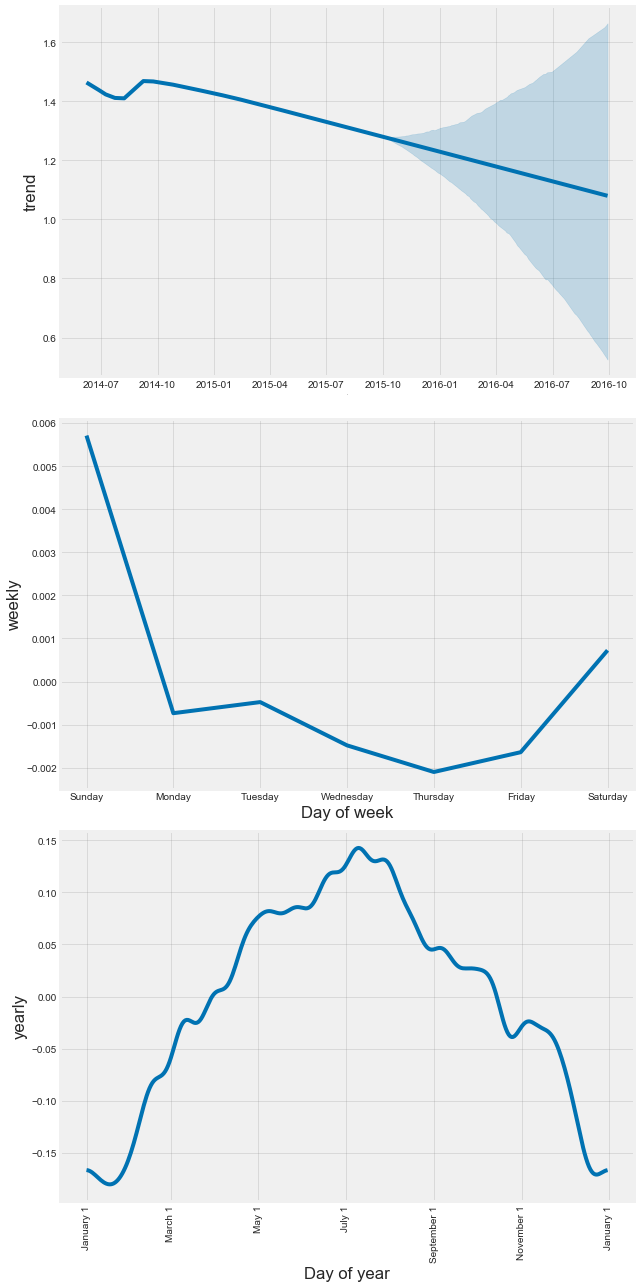

In [118]:
plot_components(my_modelE10,forecastE10)

It can be observed a strong Yearly seasonality, a Mild weekly seasonality and a decreasing trend. Also, it is clear how the model show it's captured all of these features in its prediction.

Below the procedure will be repeated for E5 and Diesel price values.

In [141]:
my_modelE5 = Prophet(yearly_seasonality=20,interval_width=0.95).fit(data_normE5)
future_datesE5 = my_modelE5.make_future_dataframe(periods=365)
forecastE5 = my_modelE5.predict(future_datesE5)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Nielson\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


(array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8]),
 <a list of 9 Text yticklabel objects>)

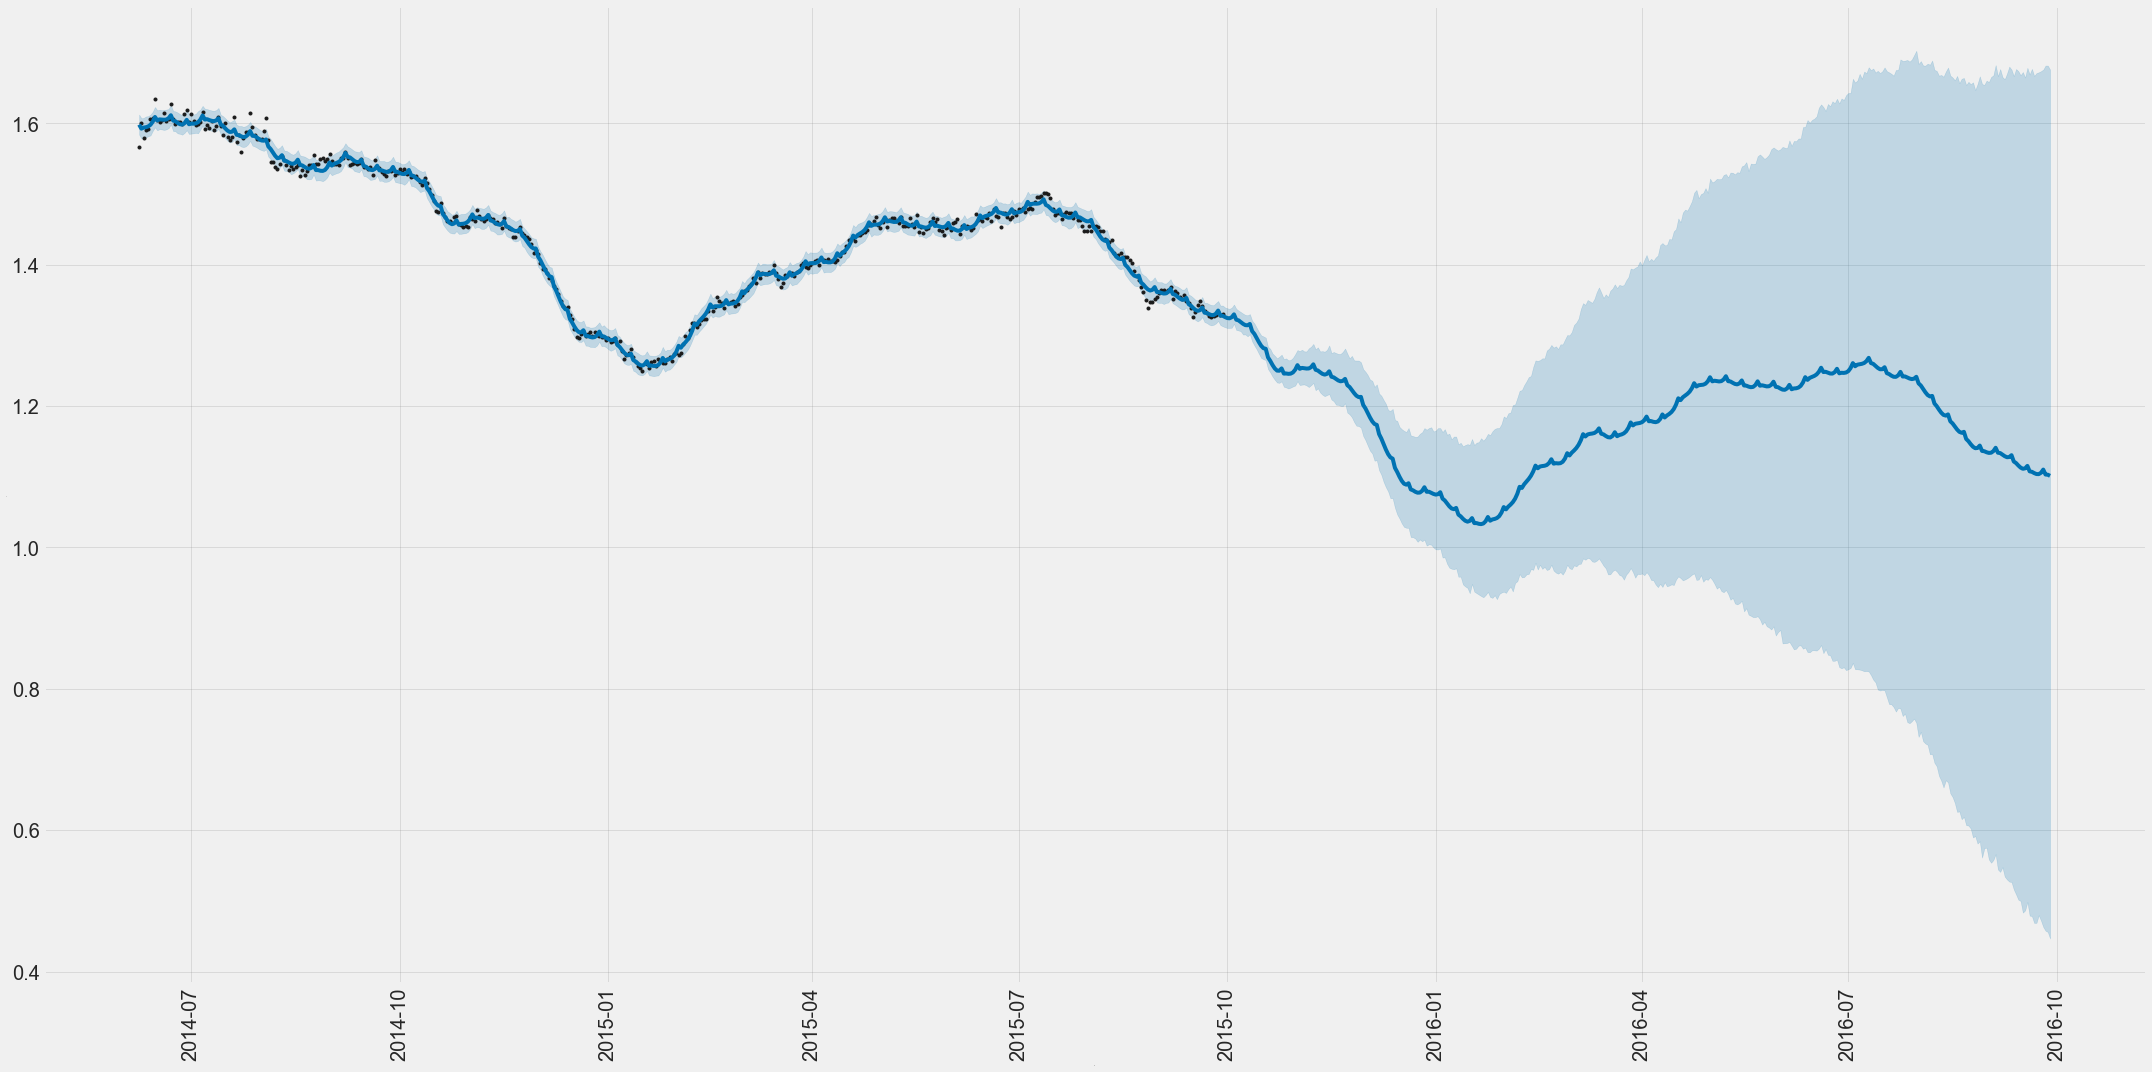

In [142]:
fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.yaxis.label.set_size(1)
ax.xaxis.label.set_size(1)
plt.xticks(rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
my_modelE5.plot(forecastE5,ax=ax,uncertainty=True)
plt.xticks(rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)


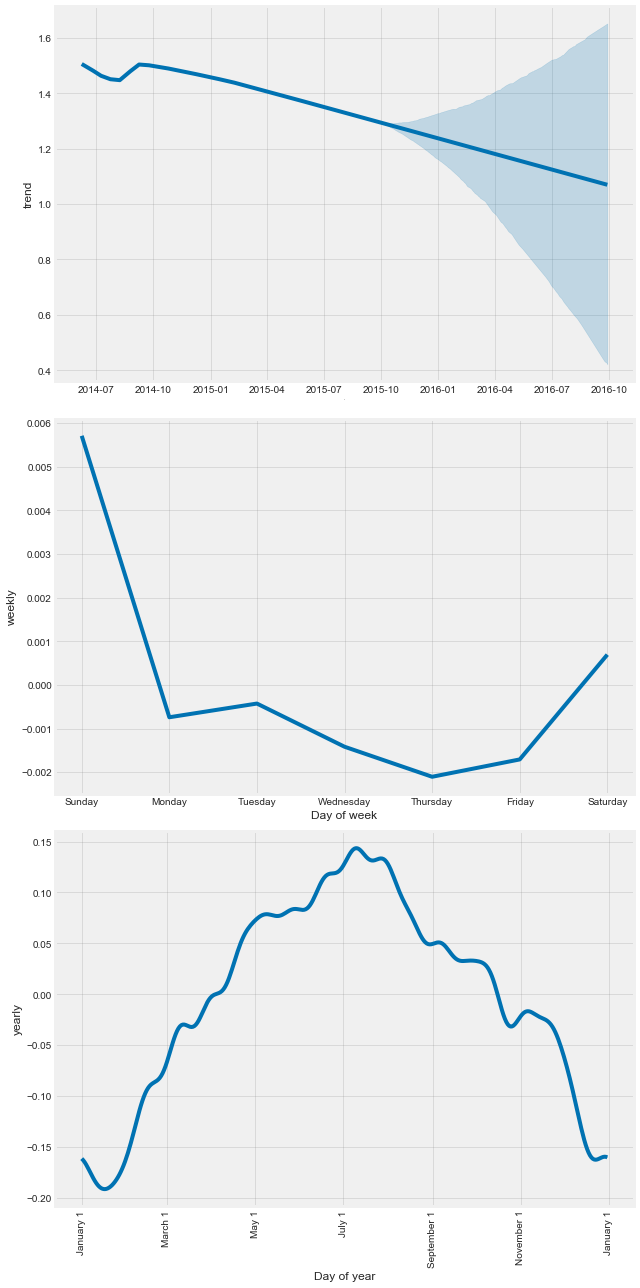

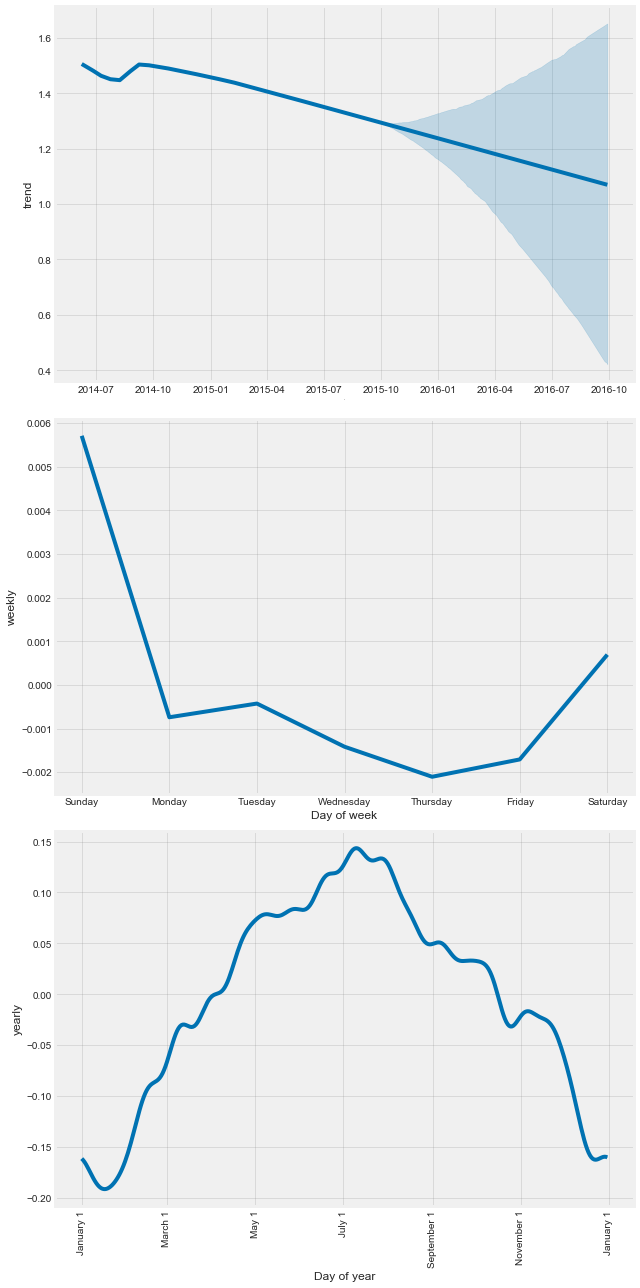

In [143]:
plot_components(my_modelE5,forecastE5)

The prediction and behaviour of E5 prices are very similar to E10 prices. The observations are the same.

In [144]:
my_modelD = Prophet(yearly_seasonality=20,interval_width=0.95).fit(data_normD)
future_datesD = my_modelD.make_future_dataframe(periods=365)
forecastD = my_modelD.predict(future_datesD)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Nielson\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


(array([0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 9 Text yticklabel objects>)

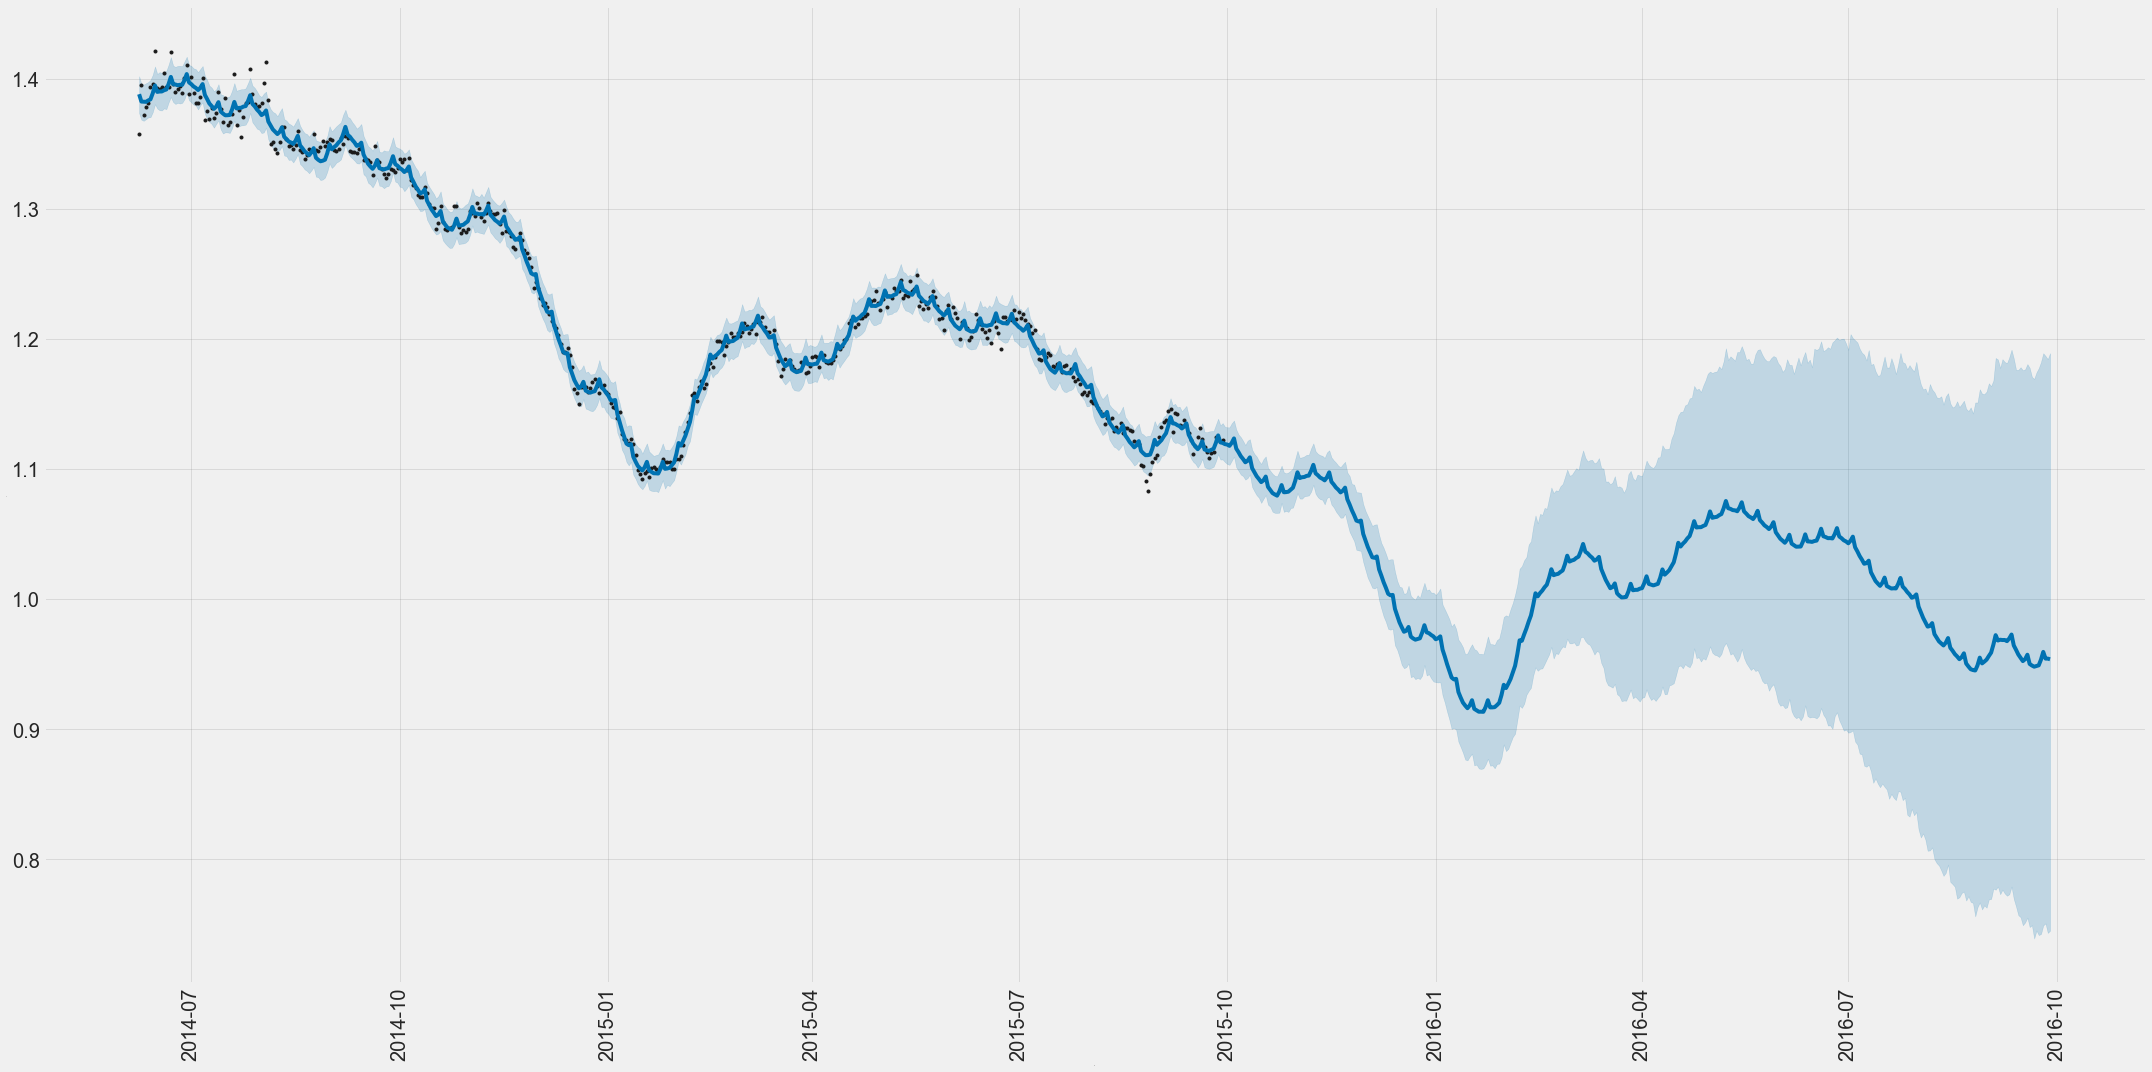

In [145]:
fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.yaxis.label.set_size(1)
ax.xaxis.label.set_size(1)
plt.xticks(rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
my_modelD.plot(forecastD,ax=ax,uncertainty=True)
plt.xticks(rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)

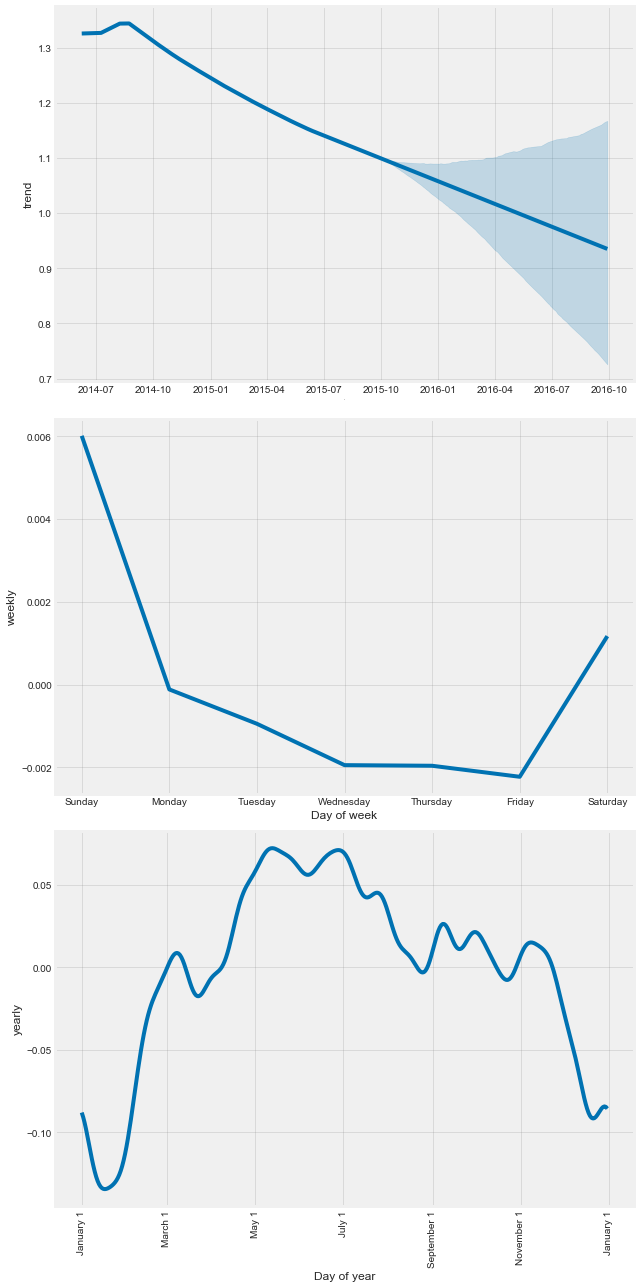

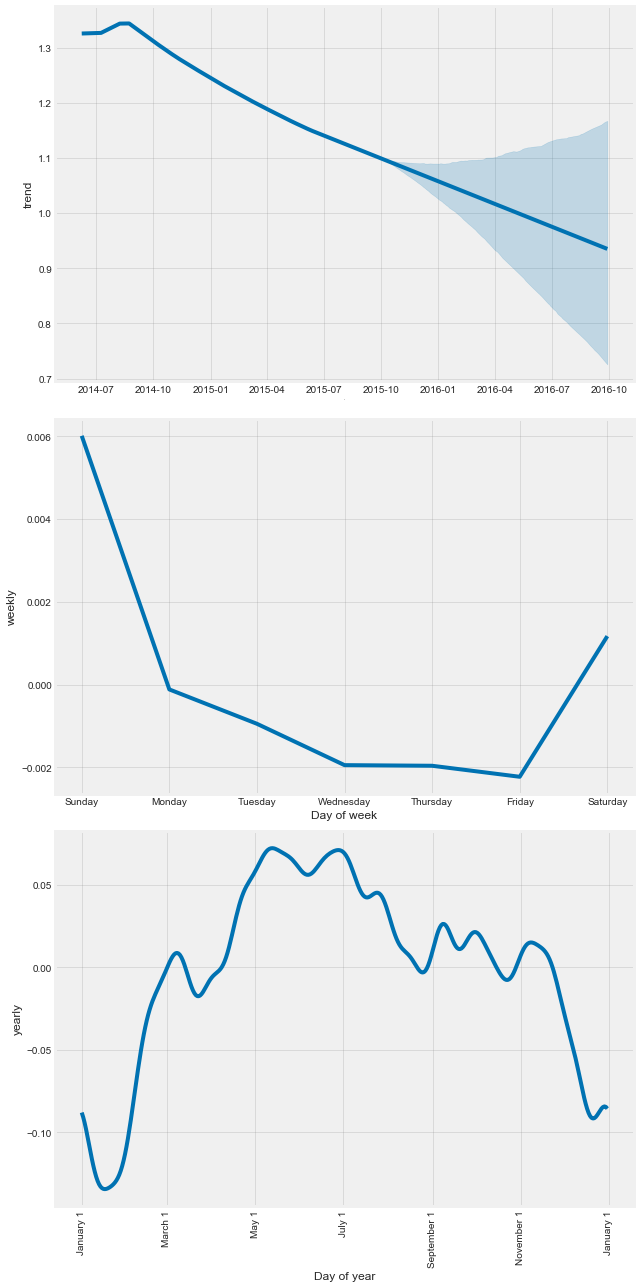

In [146]:
plot_components(my_modelD,forecastD)

The Yearly seasonality in Diesel prices is not so strong as for E5 and E10 but it's still the strongest component.

## Compare	the	prediction	result	against	the	trivial	reference	model,	visually		on	 MAD	/MAPE
# Step 3: Do the comparison with 100 Stations and a full Data Set

In [156]:
cv_E10 = cross_validation(my_modelE10, 
                         initial='365 days', # we take the first year for training
                         period='30 days',  # every 30 days a new prediction run
                         horizon = '90 days') #we predict until 3 months into the future

INFO:fbprophet:Making 1 forecasts with cutoffs between 2015-07-01 00:00:00 and 2015-07-01 00:00:00
C:\Users\Nielson\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


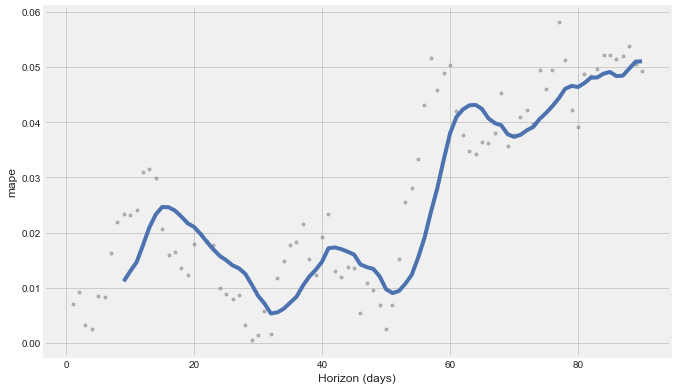

In [165]:
fig = plot_cross_validation_metric(cv_E10, metric='mape')

In [158]:
df_p = performance_metrics(cv_E10)

horizon       mse      rmse       mae      mape  coverage
0  9 days  0.000381  0.019508  0.016378  0.011156  0.333333
1 10 days  0.000500  0.022359  0.019055  0.012958  0.222222
2 11 days  0.000621  0.024920  0.021518  0.014606  0.222222
3 12 days  0.000852  0.029181  0.026083  0.017679  0.111111
4 13 days  0.001093  0.033060  0.030871  0.020909  0.000000

In [166]:
cv_E5 = cross_validation(my_modelE5, 
                         initial='365 days', # we take the first year for training
                         period='30 days',  # every 30 days a new prediction run
                         horizon = '90 days') #we predict until 3 months into the future


INFO:fbprophet:Making 1 forecasts with cutoffs between 2015-07-01 00:00:00 and 2015-07-01 00:00:00
C:\Users\Nielson\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


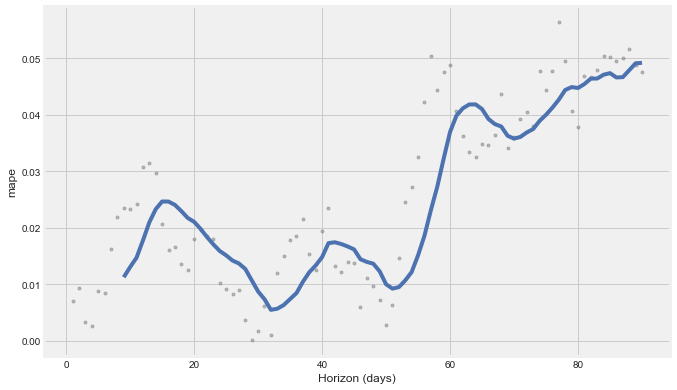

In [167]:
fig = plot_cross_validation_metric(cv_E5, metric='mape')

In [168]:
df_p = performance_metrics(cv_E5)

In [169]:
cv_D = cross_validation(my_modelD, 
                         initial='365 days', # we take the first year for training
                         period='30 days',  # every 30 days a new prediction run
                         horizon = '90 days') #we predict until 3 months into the future


INFO:fbprophet:Making 1 forecasts with cutoffs between 2015-07-01 00:00:00 and 2015-07-01 00:00:00
C:\Users\Nielson\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


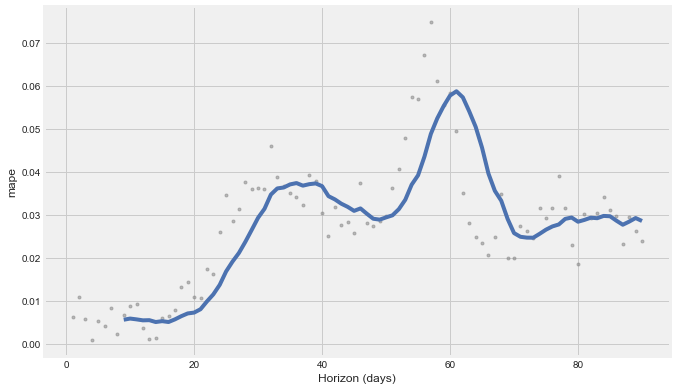

In [170]:
fig = plot_cross_validation_metric(cv_D, metric='mape')

In [171]:
df_p = performance_metrics(cv_D)

It's observable that even in a further Horizon, the MAPE error is still between 0.01% and 0.06%.

When compared to the values obtained with the simple model (1.11 % to 2.23%) in a 3 to 30 days horizon, it's clear the superiority of the Prophet model.